# XGB


Loading and performing initial preprocessing...

Analyzing missing values...


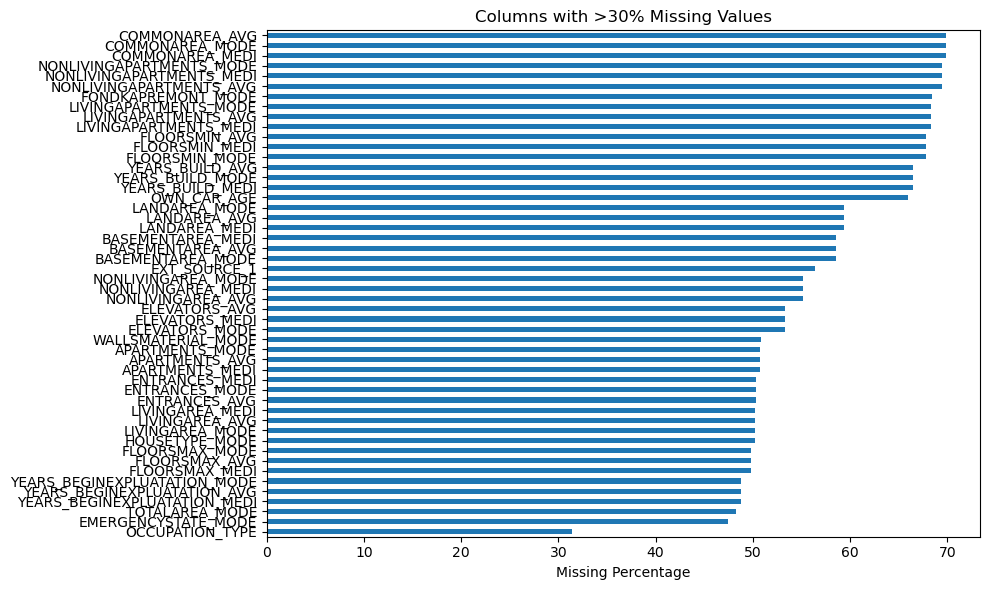


Plotting target distribution...


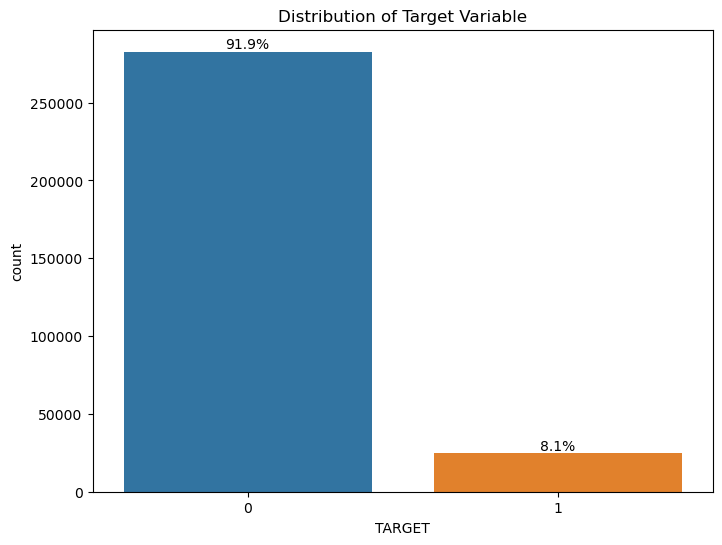


Analyzing categorical features...


<Figure size 1000x600 with 0 Axes>

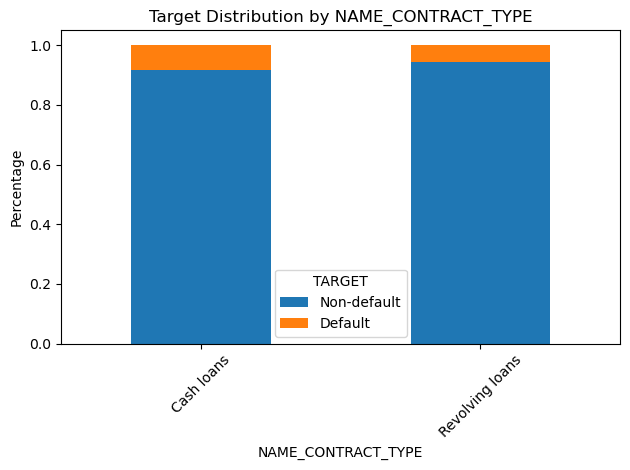

<Figure size 1000x600 with 0 Axes>

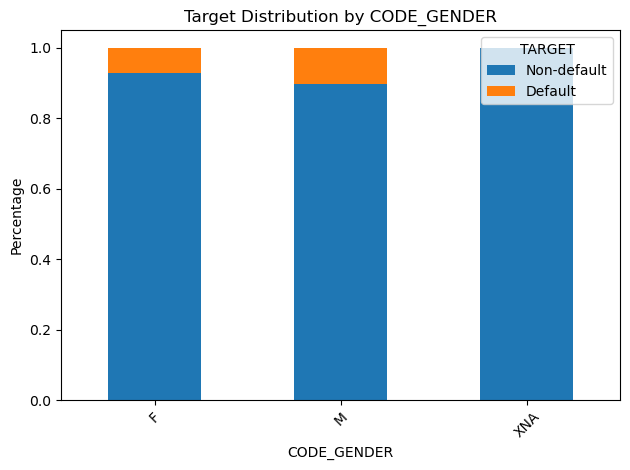

<Figure size 1000x600 with 0 Axes>

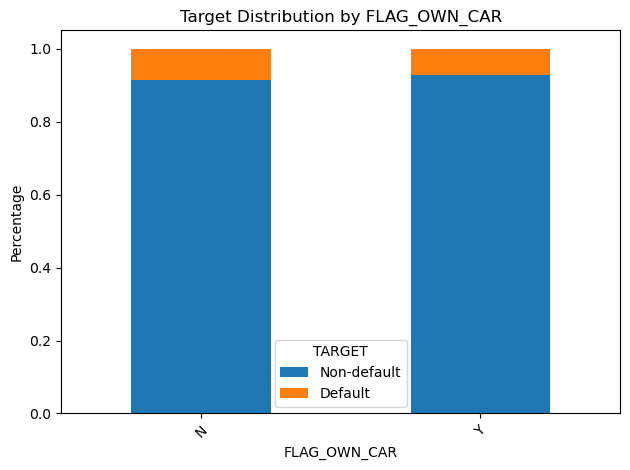

<Figure size 1000x600 with 0 Axes>

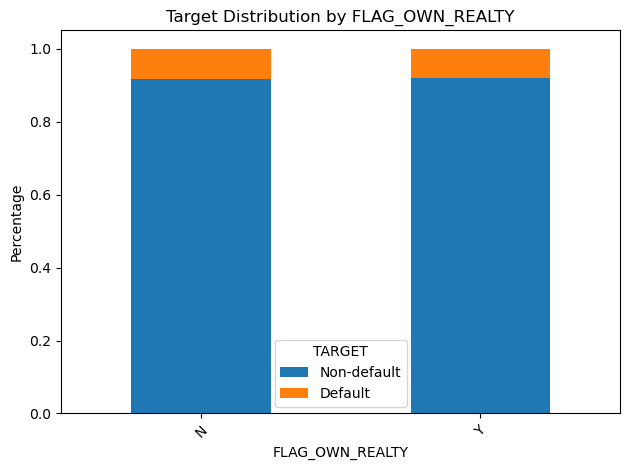

<Figure size 1000x600 with 0 Axes>

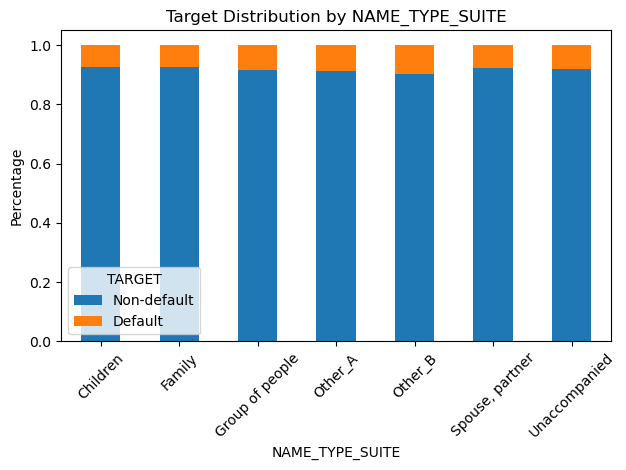

<Figure size 1000x600 with 0 Axes>

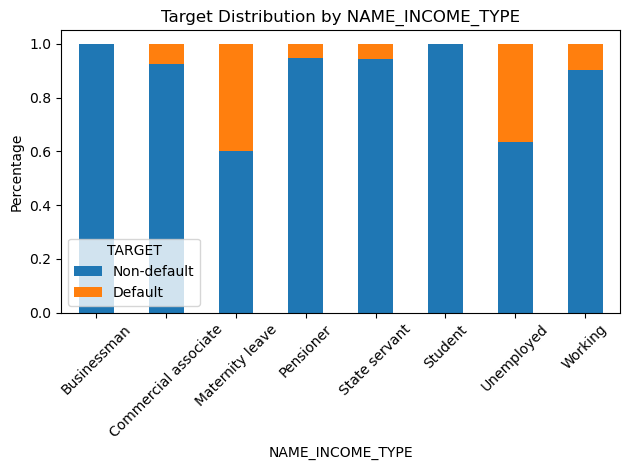

<Figure size 1000x600 with 0 Axes>

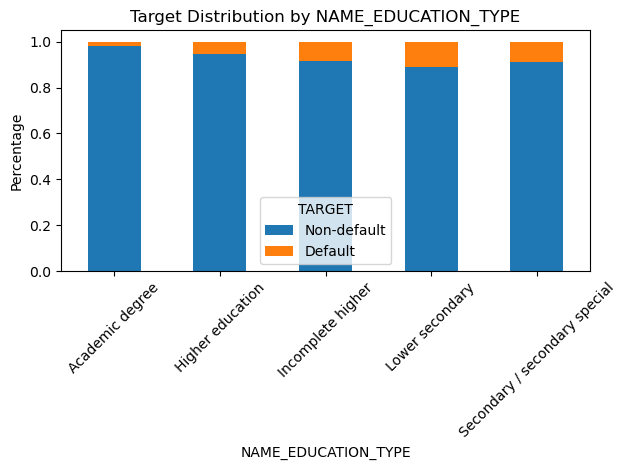

<Figure size 1000x600 with 0 Axes>

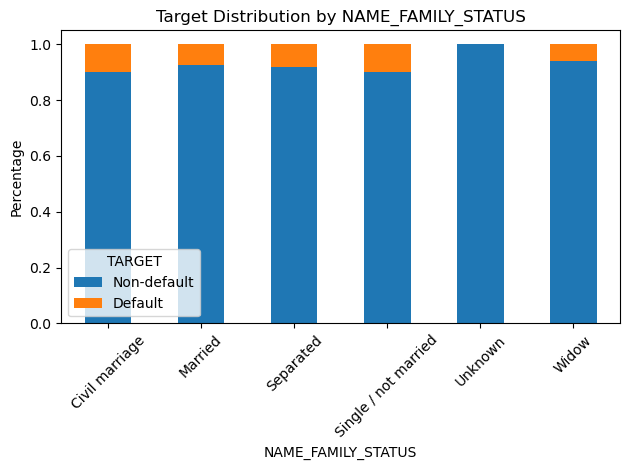

<Figure size 1000x600 with 0 Axes>

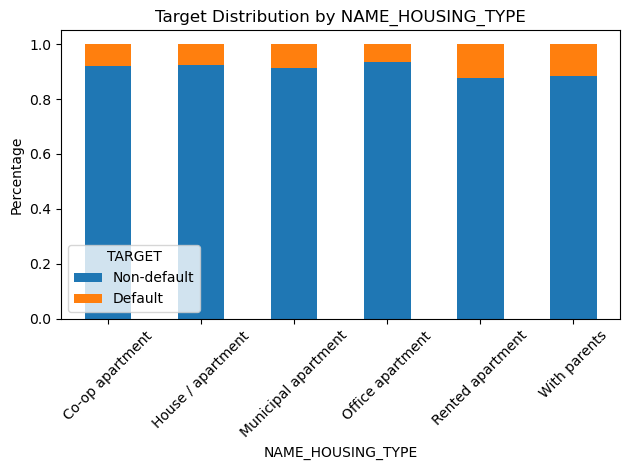

<Figure size 1000x600 with 0 Axes>

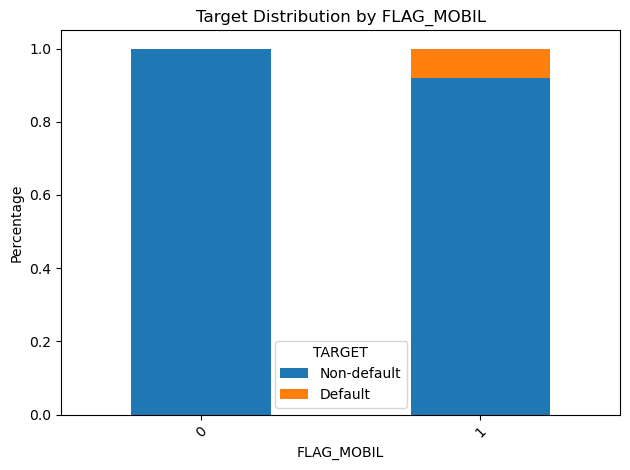

<Figure size 1000x600 with 0 Axes>

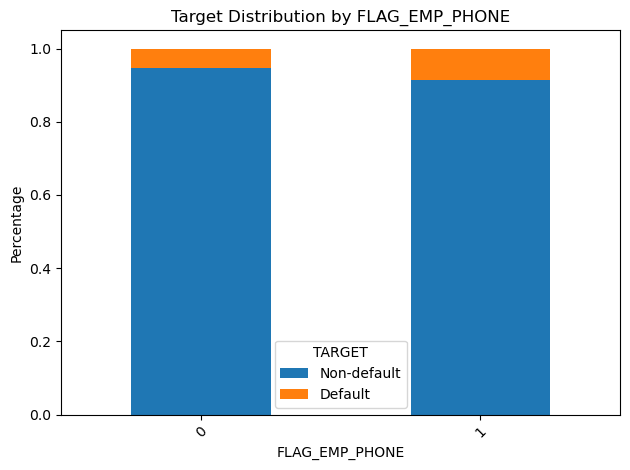

<Figure size 1000x600 with 0 Axes>

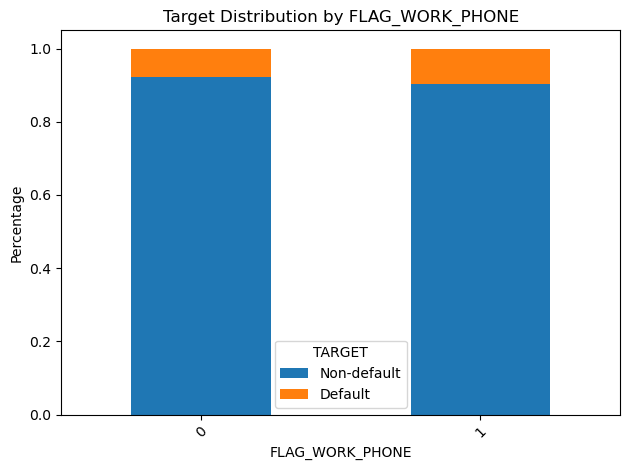

<Figure size 1000x600 with 0 Axes>

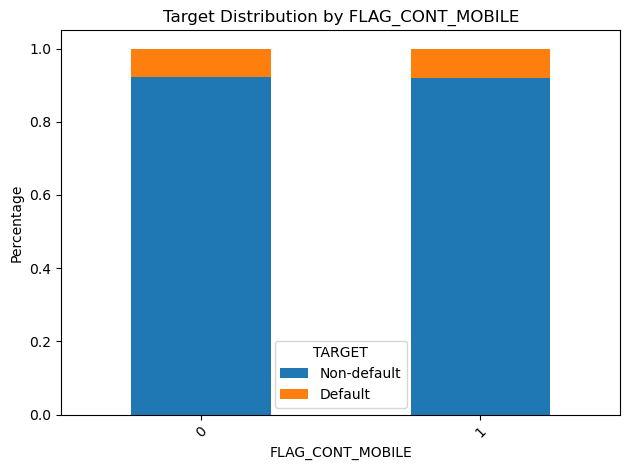

<Figure size 1000x600 with 0 Axes>

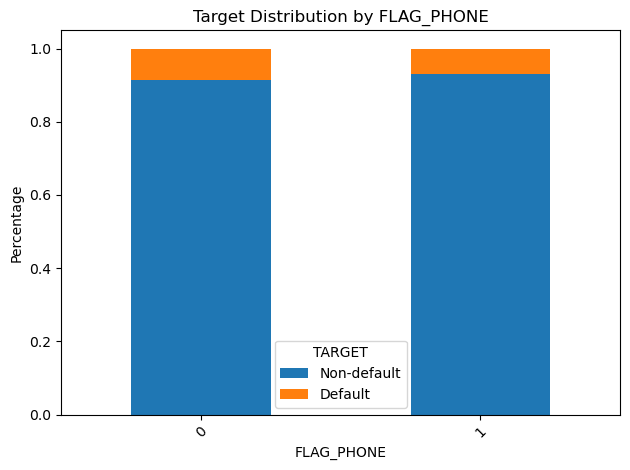

<Figure size 1000x600 with 0 Axes>

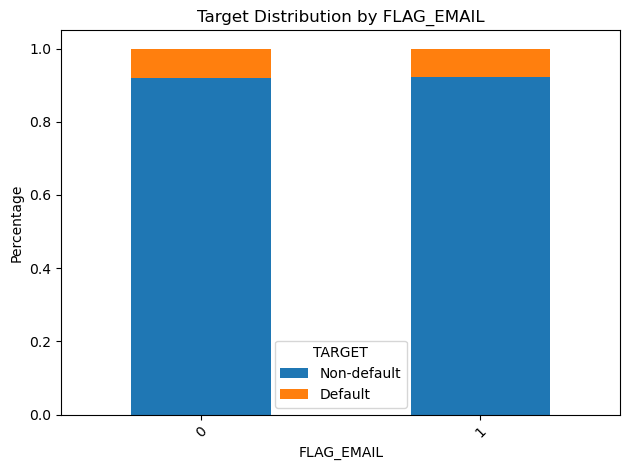

<Figure size 1000x600 with 0 Axes>

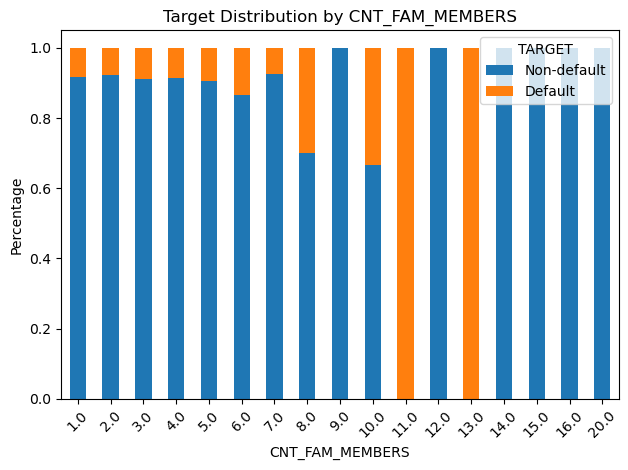

<Figure size 1000x600 with 0 Axes>

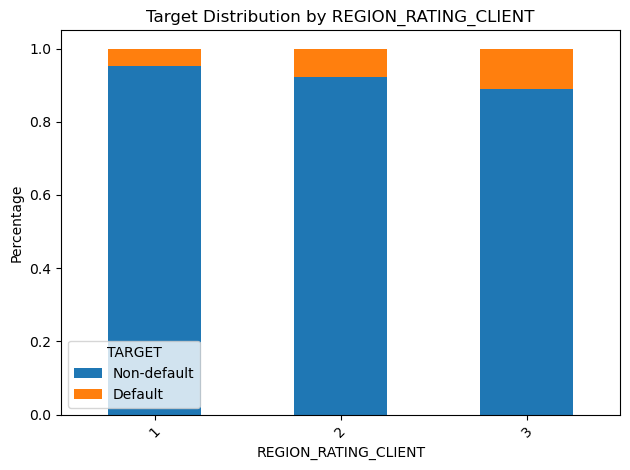

<Figure size 1000x600 with 0 Axes>

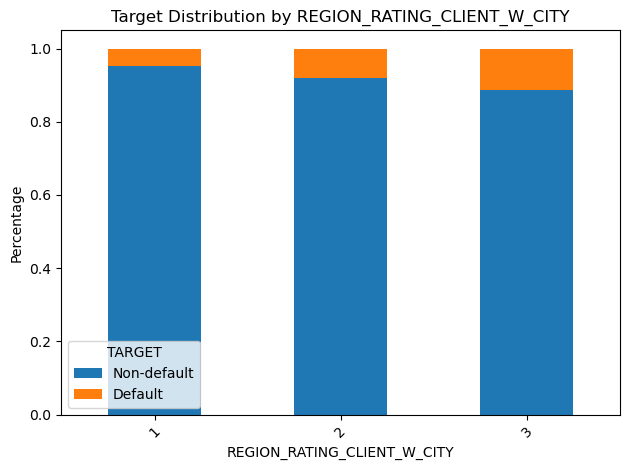

<Figure size 1000x600 with 0 Axes>

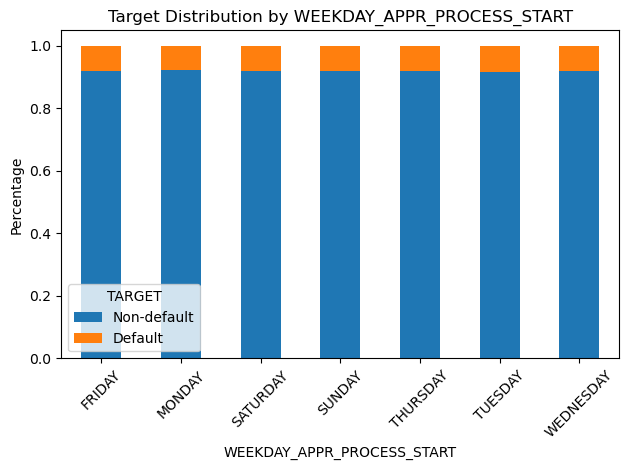

<Figure size 1000x600 with 0 Axes>

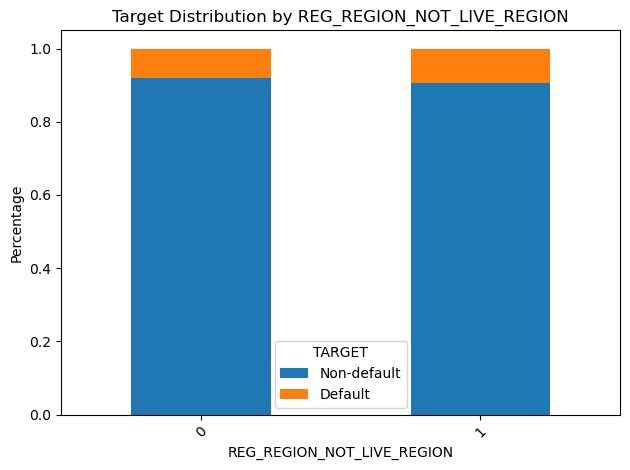

<Figure size 1000x600 with 0 Axes>

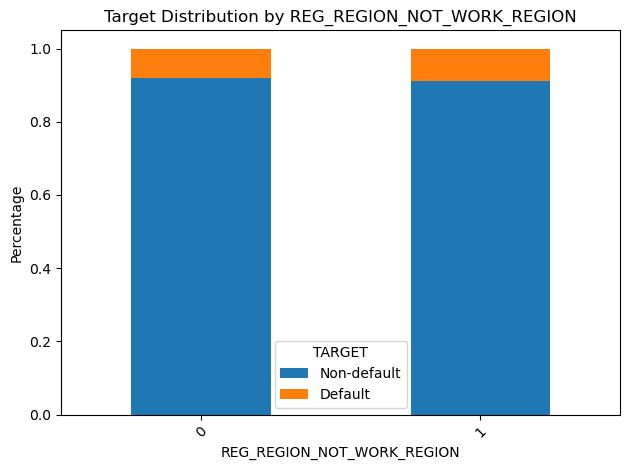

<Figure size 1000x600 with 0 Axes>

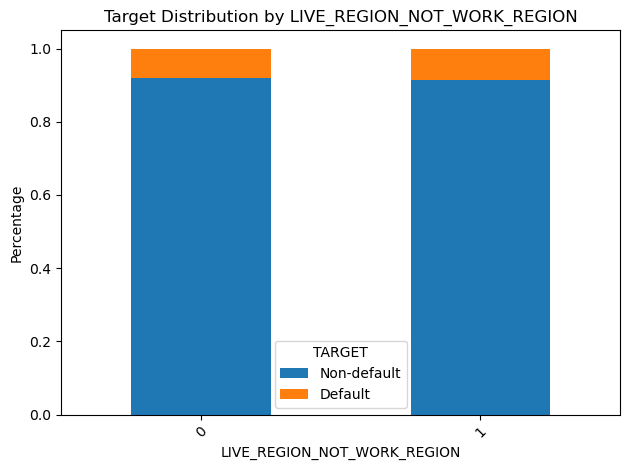

<Figure size 1000x600 with 0 Axes>

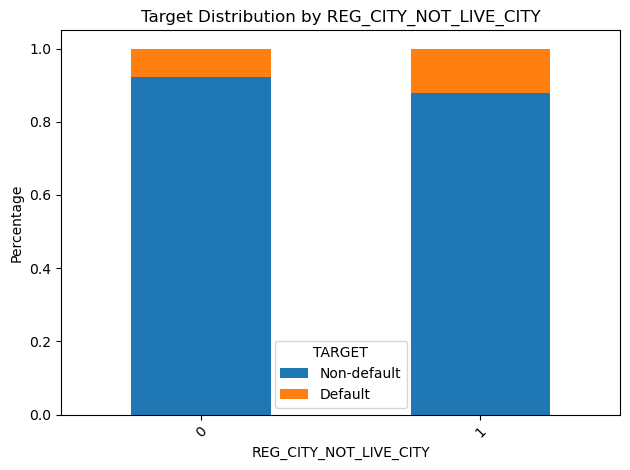

<Figure size 1000x600 with 0 Axes>

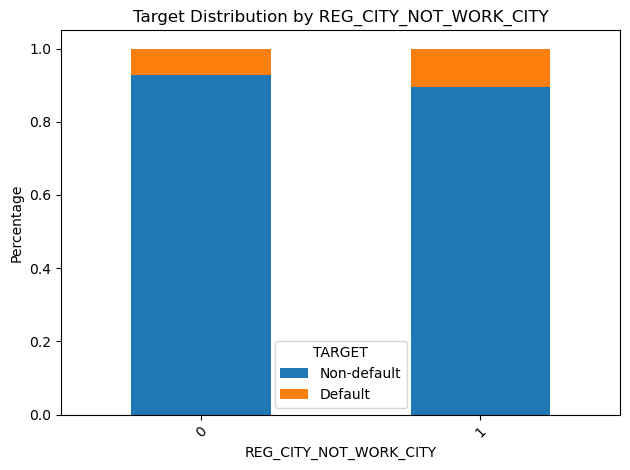

<Figure size 1000x600 with 0 Axes>

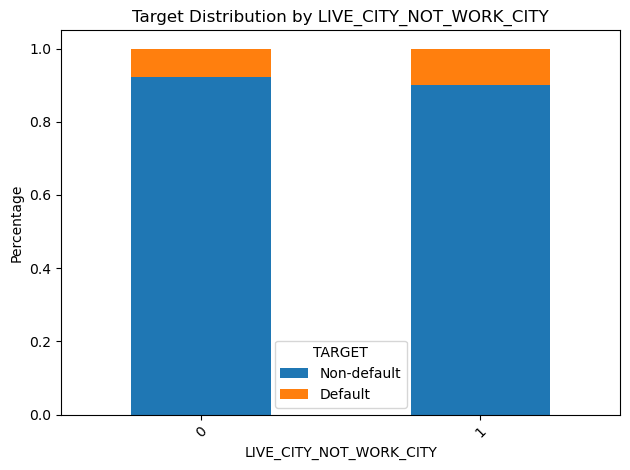

<Figure size 1000x600 with 0 Axes>

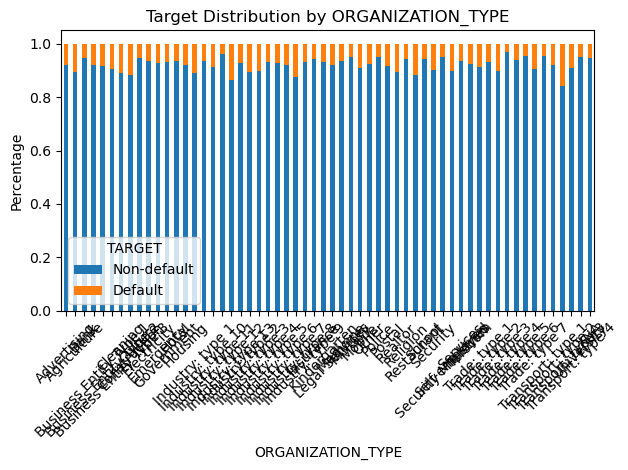

<Figure size 1000x600 with 0 Axes>

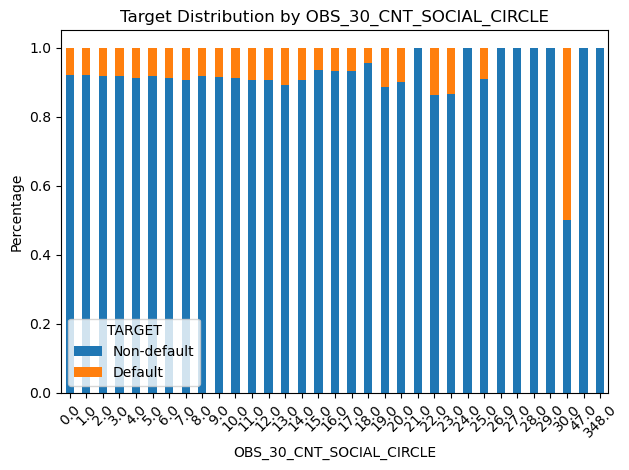

<Figure size 1000x600 with 0 Axes>

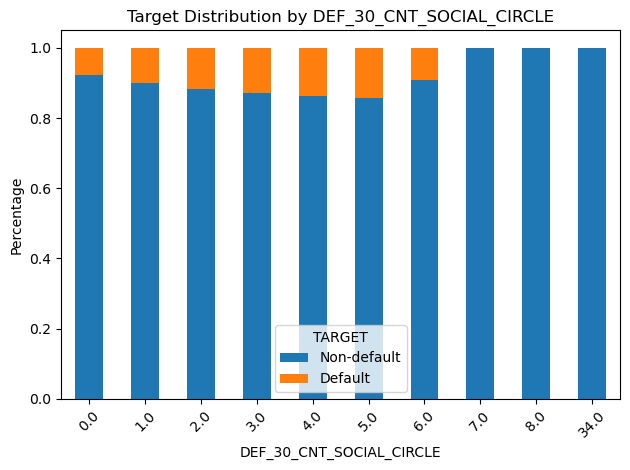

<Figure size 1000x600 with 0 Axes>

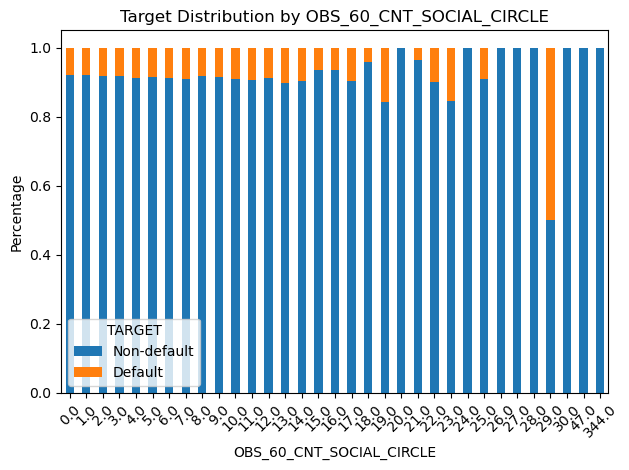

<Figure size 1000x600 with 0 Axes>

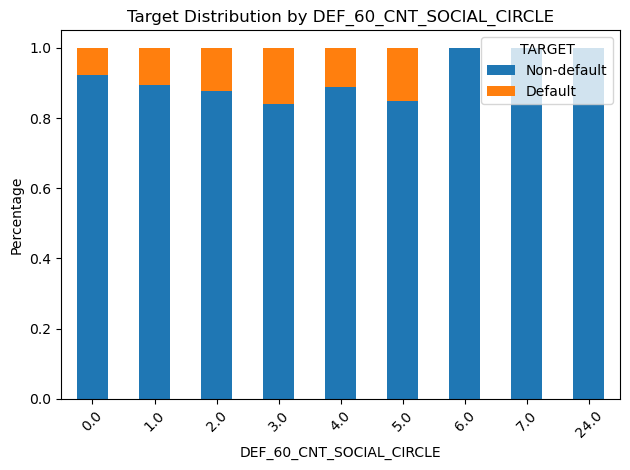

<Figure size 1000x600 with 0 Axes>

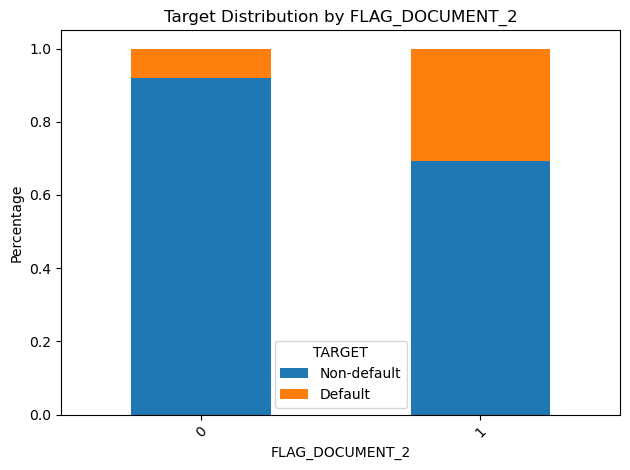

<Figure size 1000x600 with 0 Axes>

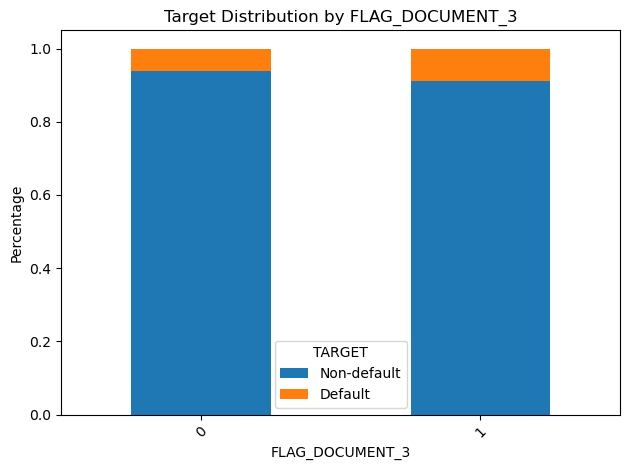

<Figure size 1000x600 with 0 Axes>

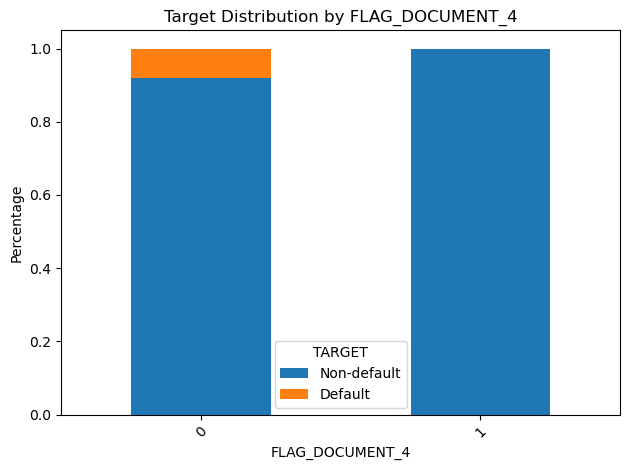

<Figure size 1000x600 with 0 Axes>

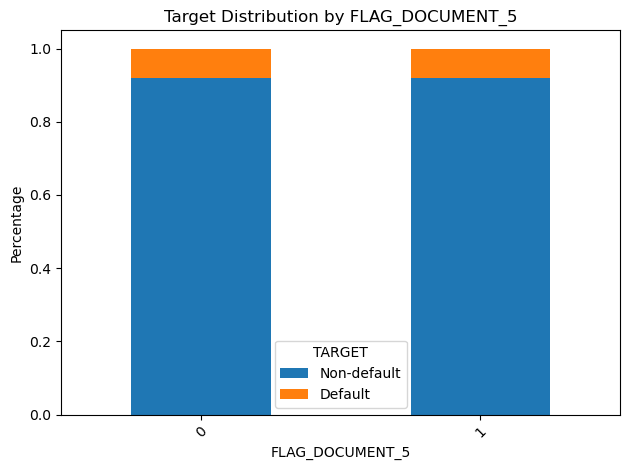

<Figure size 1000x600 with 0 Axes>

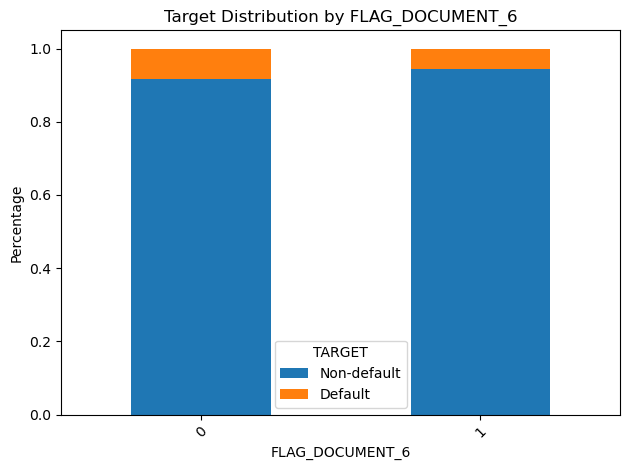

<Figure size 1000x600 with 0 Axes>

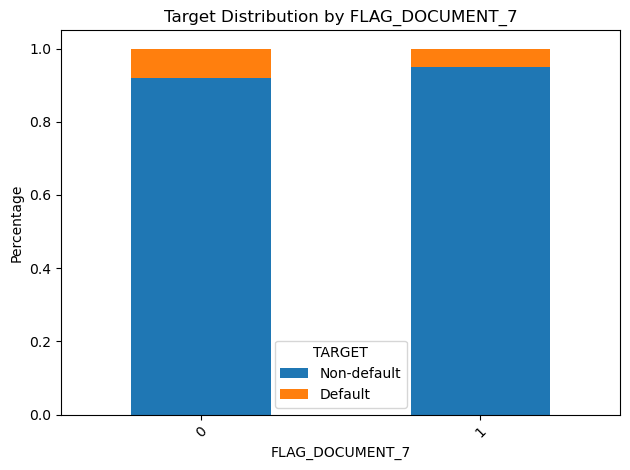

<Figure size 1000x600 with 0 Axes>

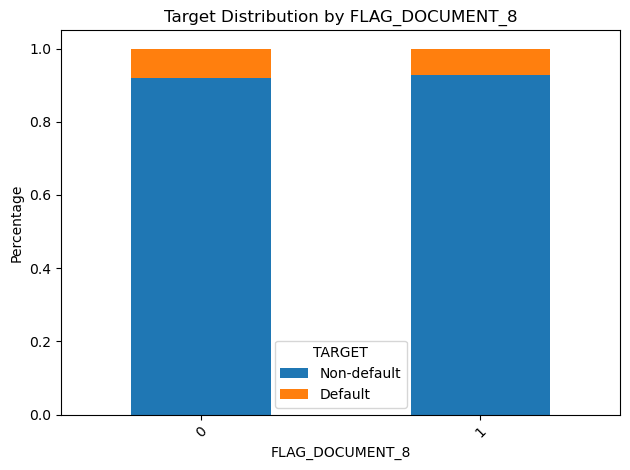

<Figure size 1000x600 with 0 Axes>

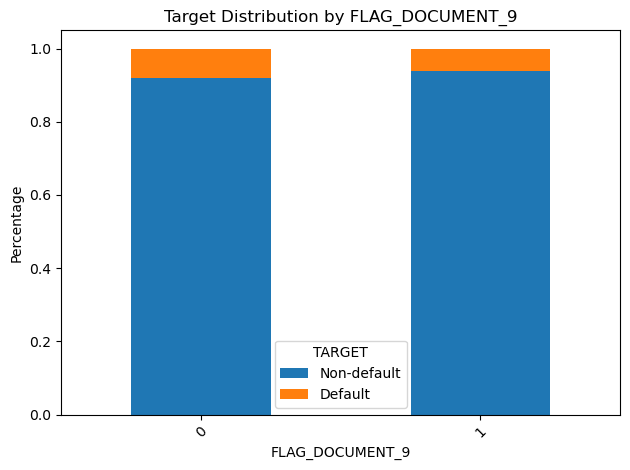

<Figure size 1000x600 with 0 Axes>

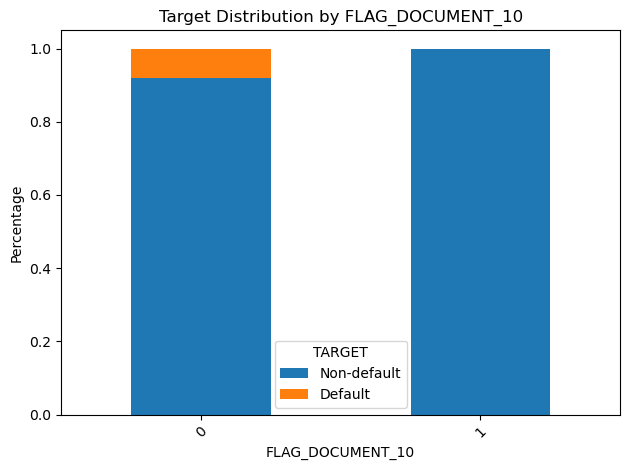

<Figure size 1000x600 with 0 Axes>

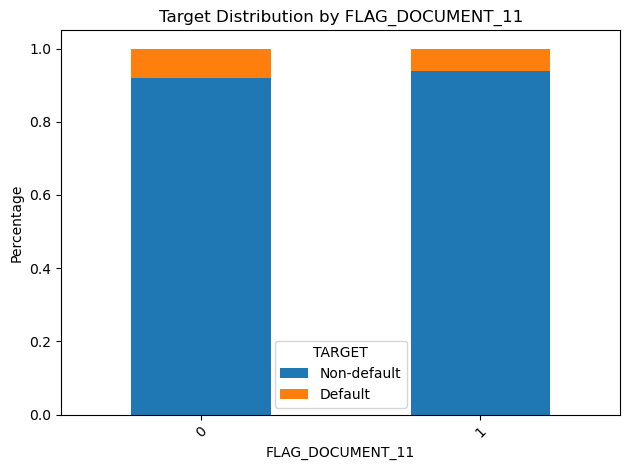

<Figure size 1000x600 with 0 Axes>

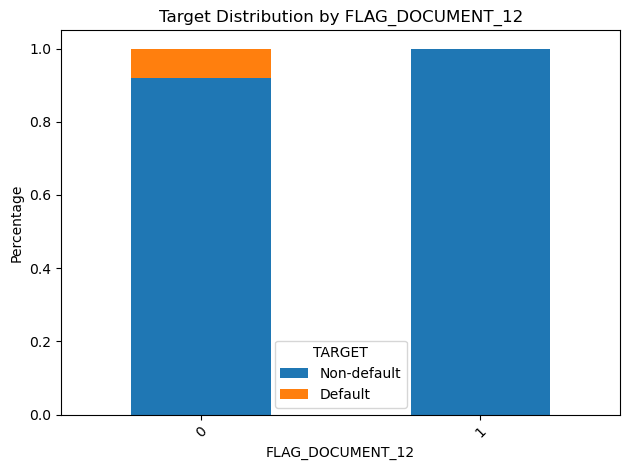

<Figure size 1000x600 with 0 Axes>

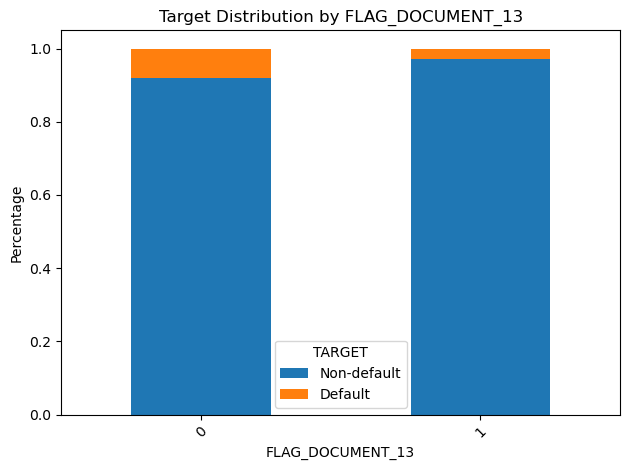

<Figure size 1000x600 with 0 Axes>

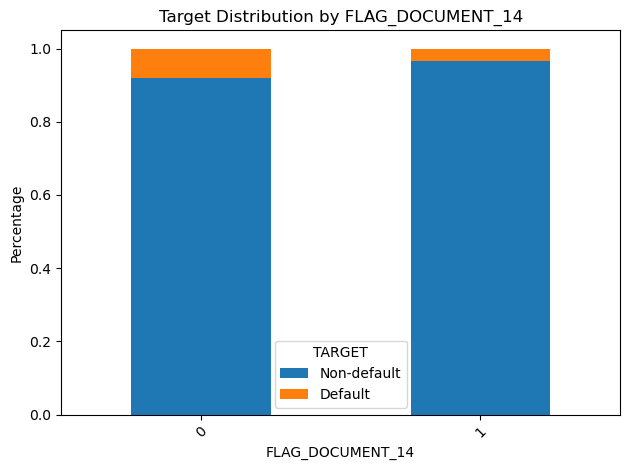

<Figure size 1000x600 with 0 Axes>

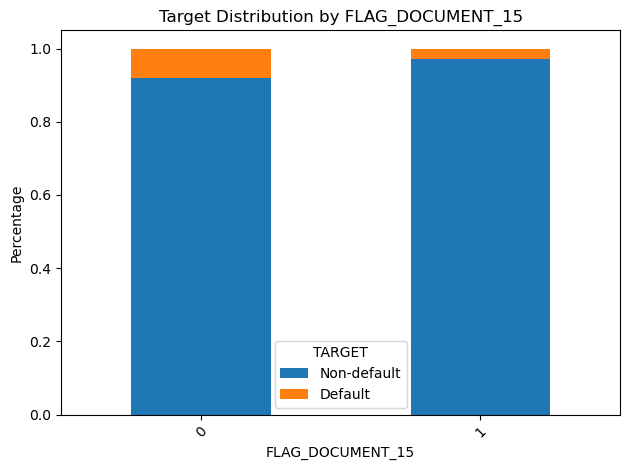

<Figure size 1000x600 with 0 Axes>

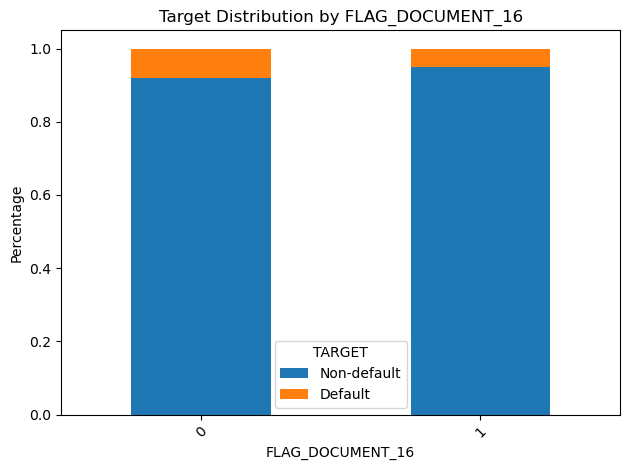

<Figure size 1000x600 with 0 Axes>

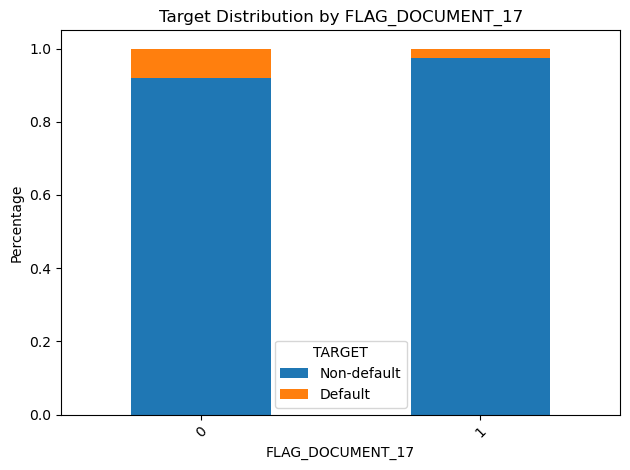

<Figure size 1000x600 with 0 Axes>

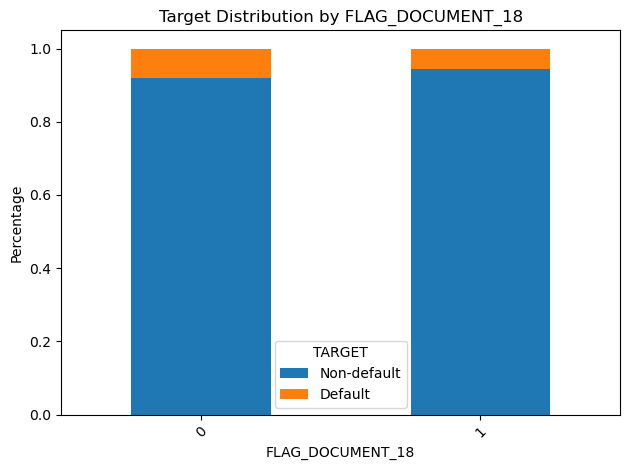

<Figure size 1000x600 with 0 Axes>

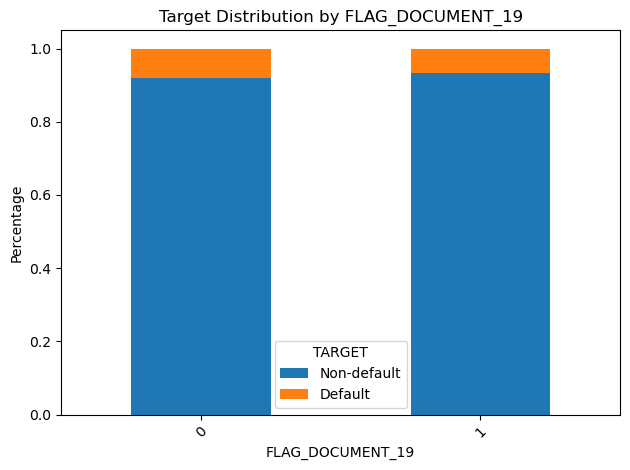

<Figure size 1000x600 with 0 Axes>

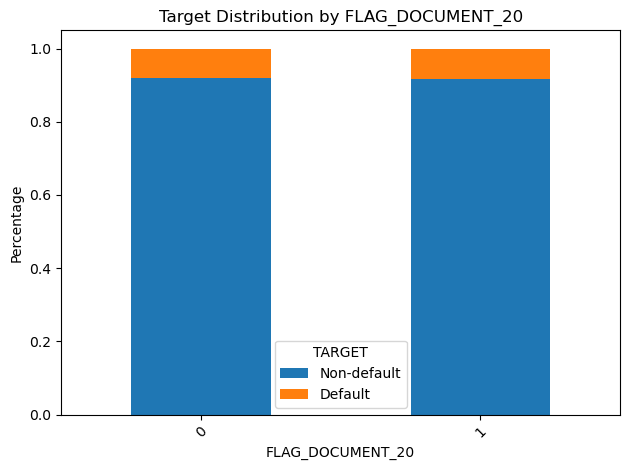

<Figure size 1000x600 with 0 Axes>

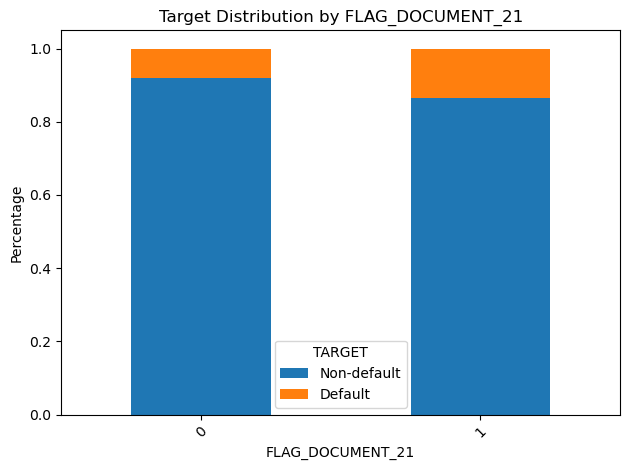

<Figure size 1000x600 with 0 Axes>

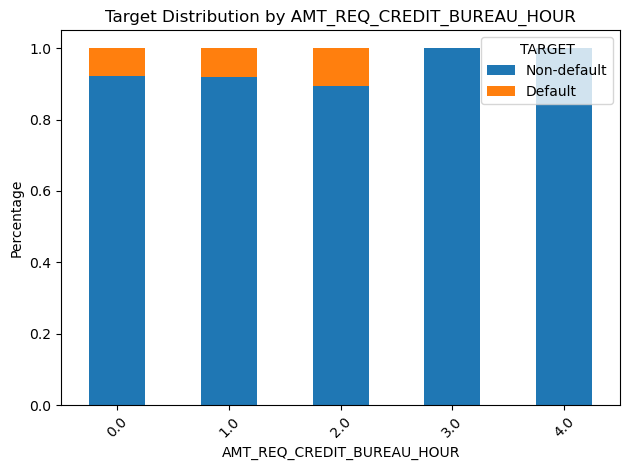

<Figure size 1000x600 with 0 Axes>

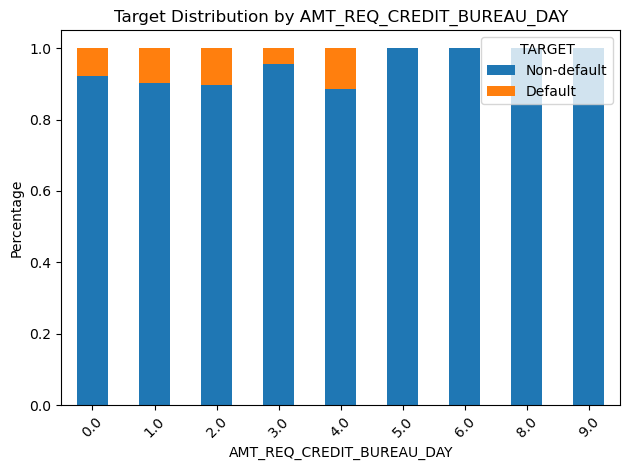

<Figure size 1000x600 with 0 Axes>

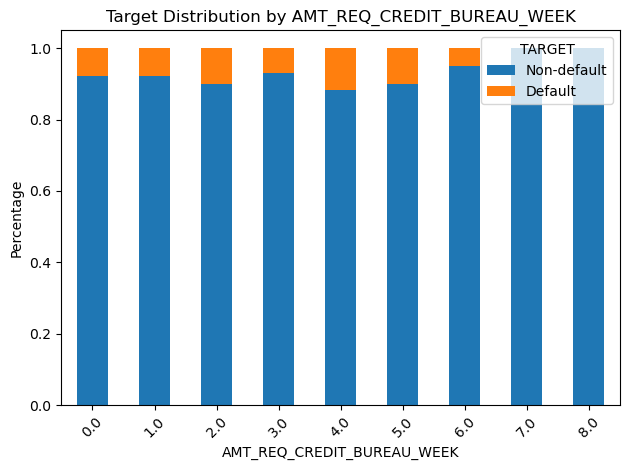

<Figure size 1000x600 with 0 Axes>

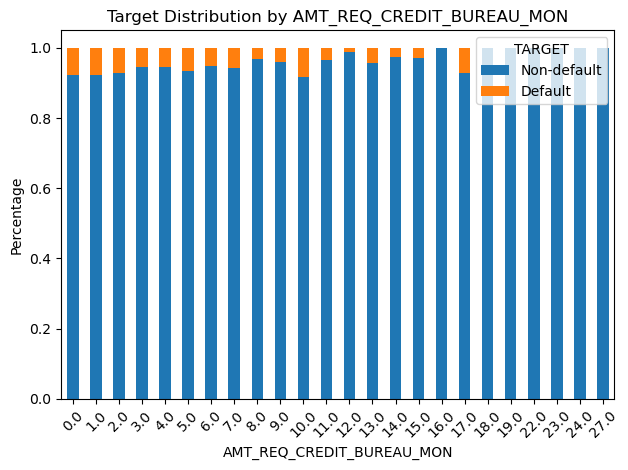

<Figure size 1000x600 with 0 Axes>

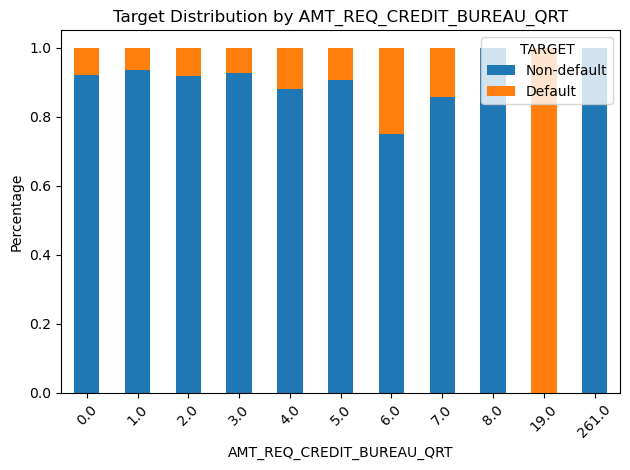

<Figure size 1000x600 with 0 Axes>

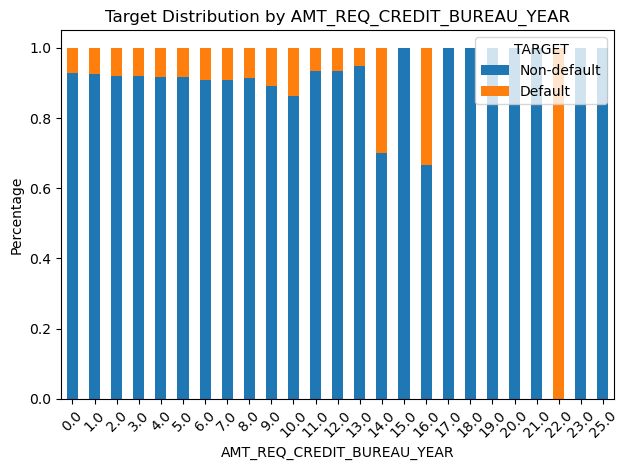


Analyzing Income vs Credit relationship...


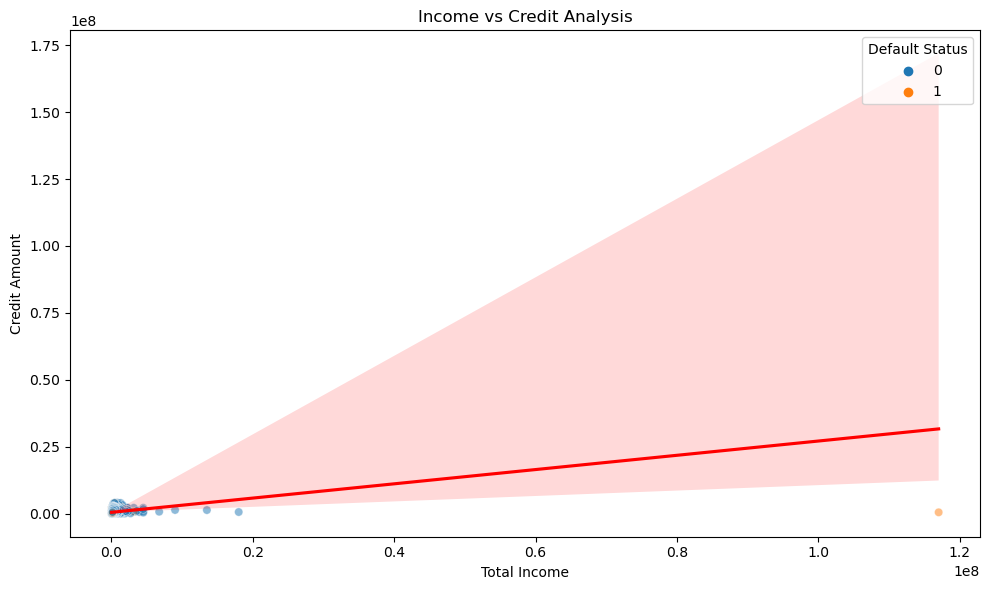


Applying preprocessing...

Plotting numerical distributions before handling outliers...


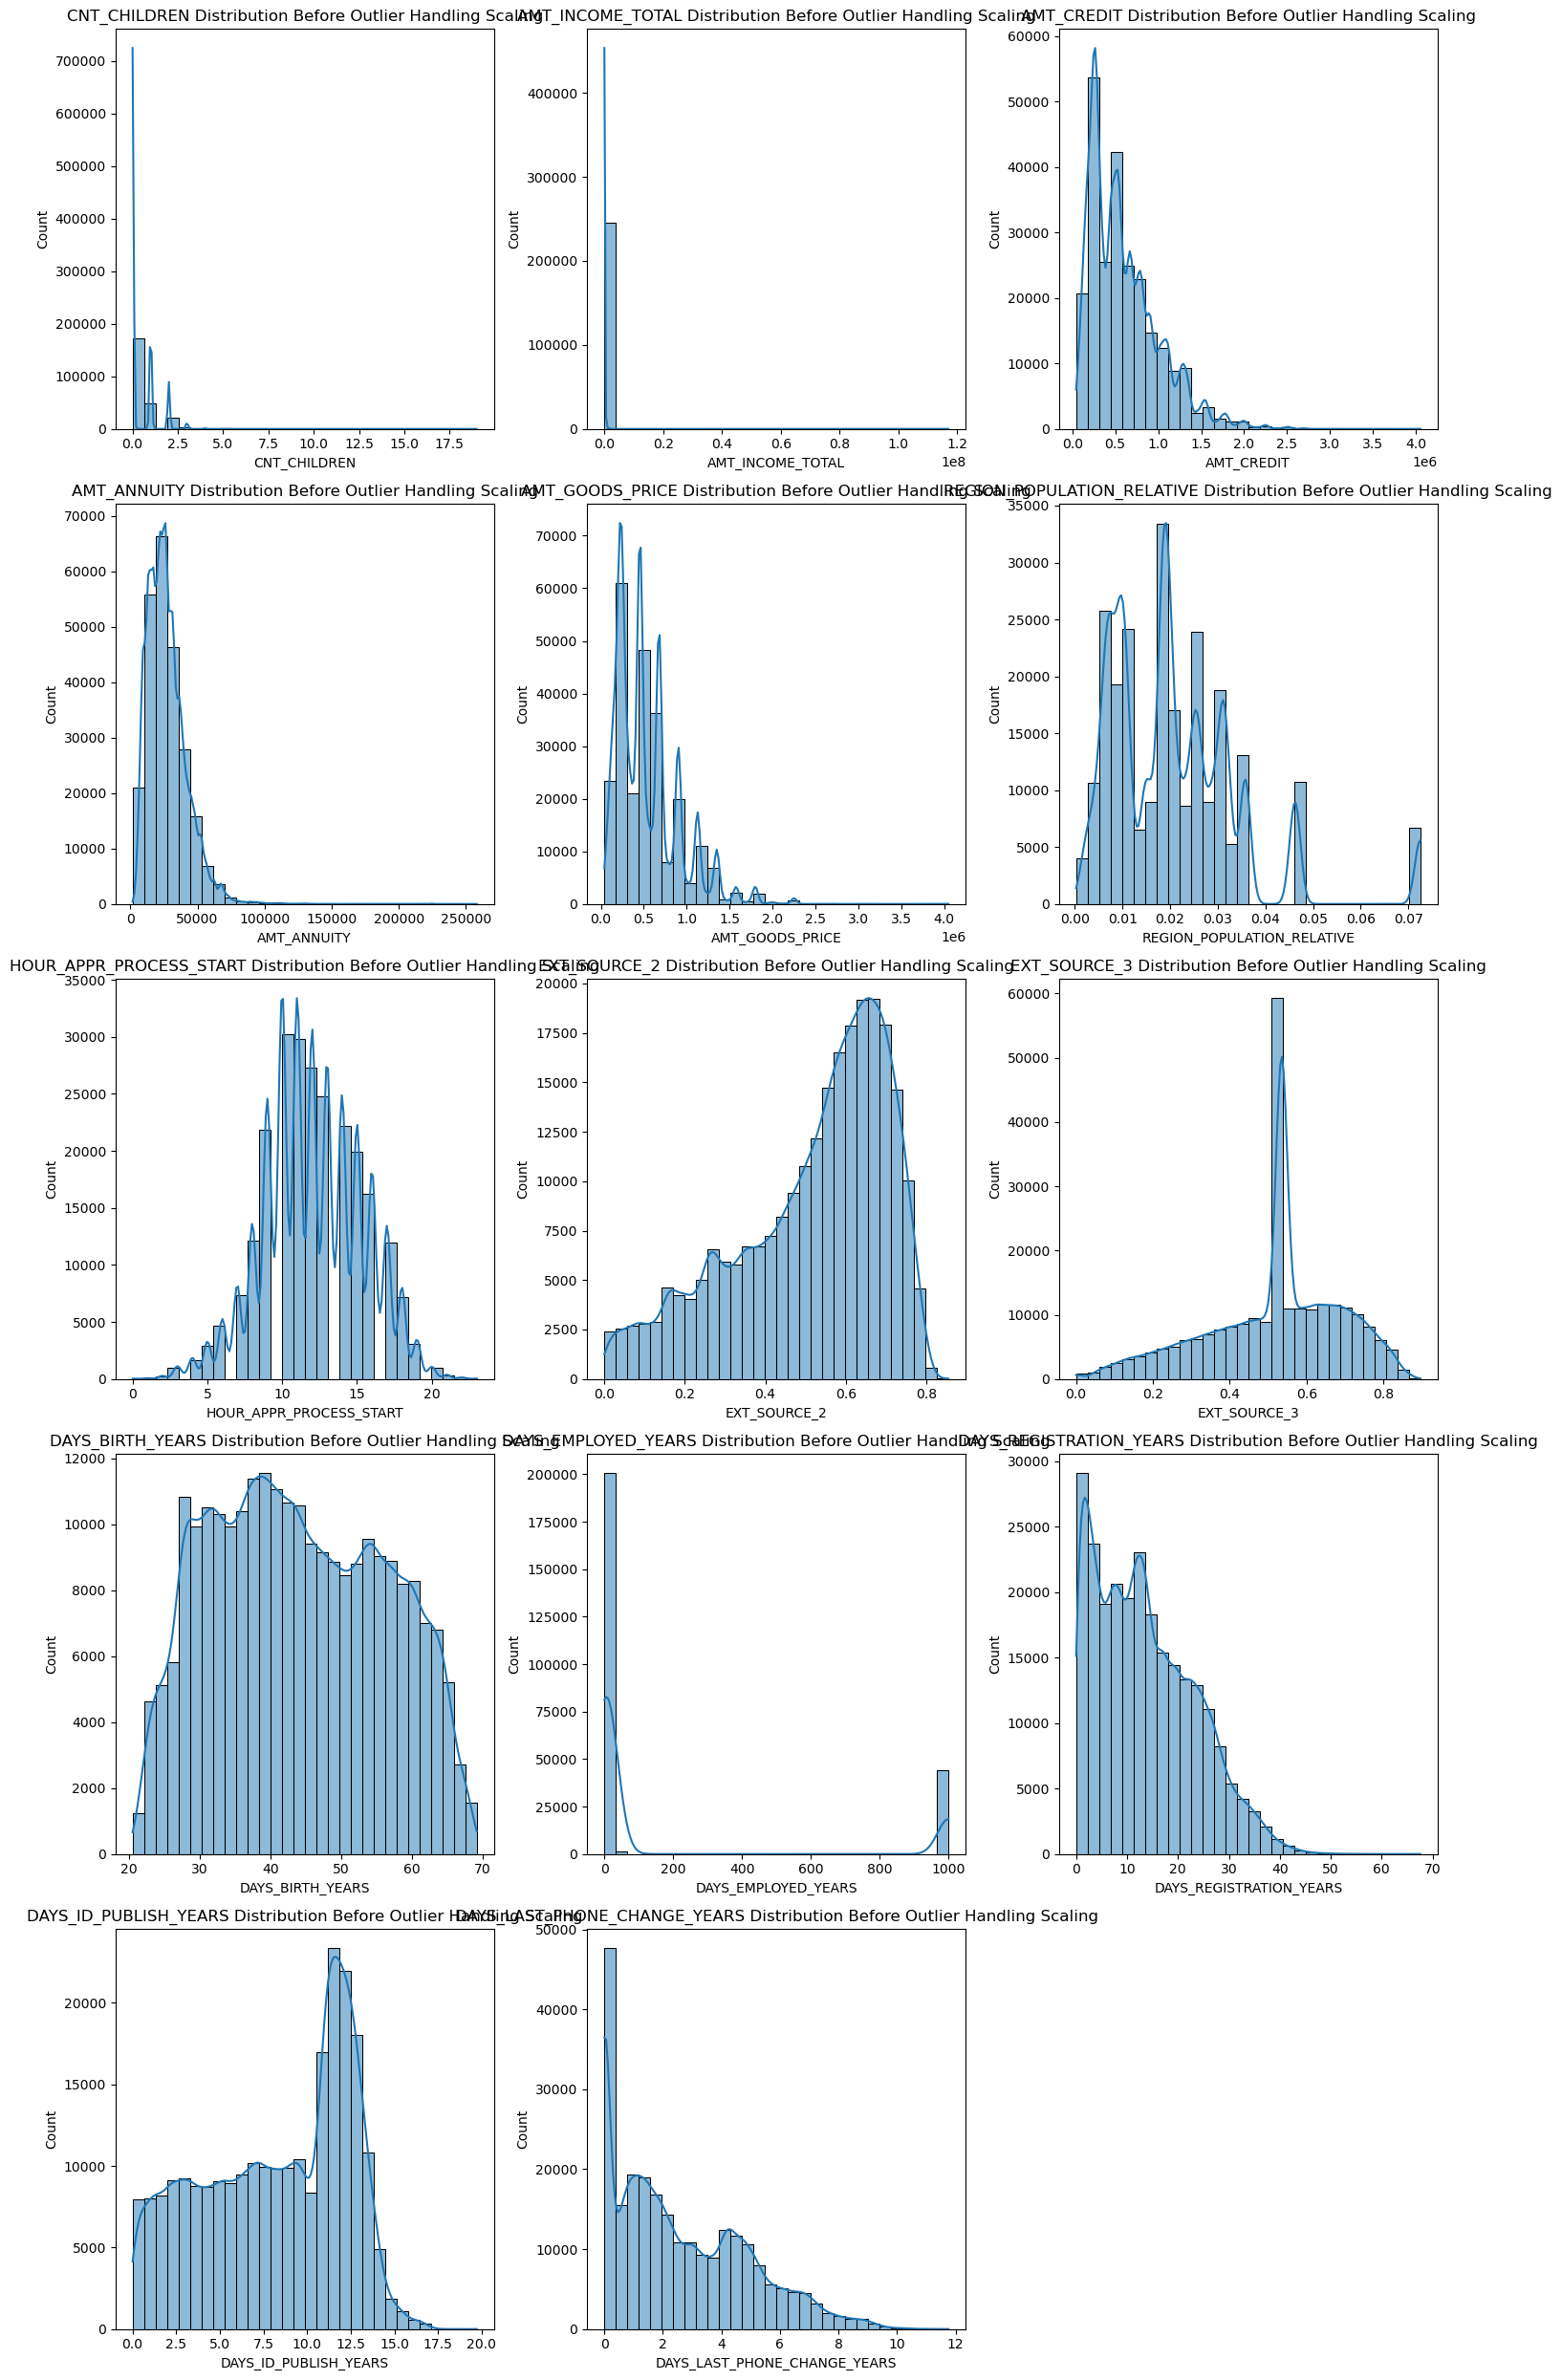


Plotting numerical distributions after handling outliers...


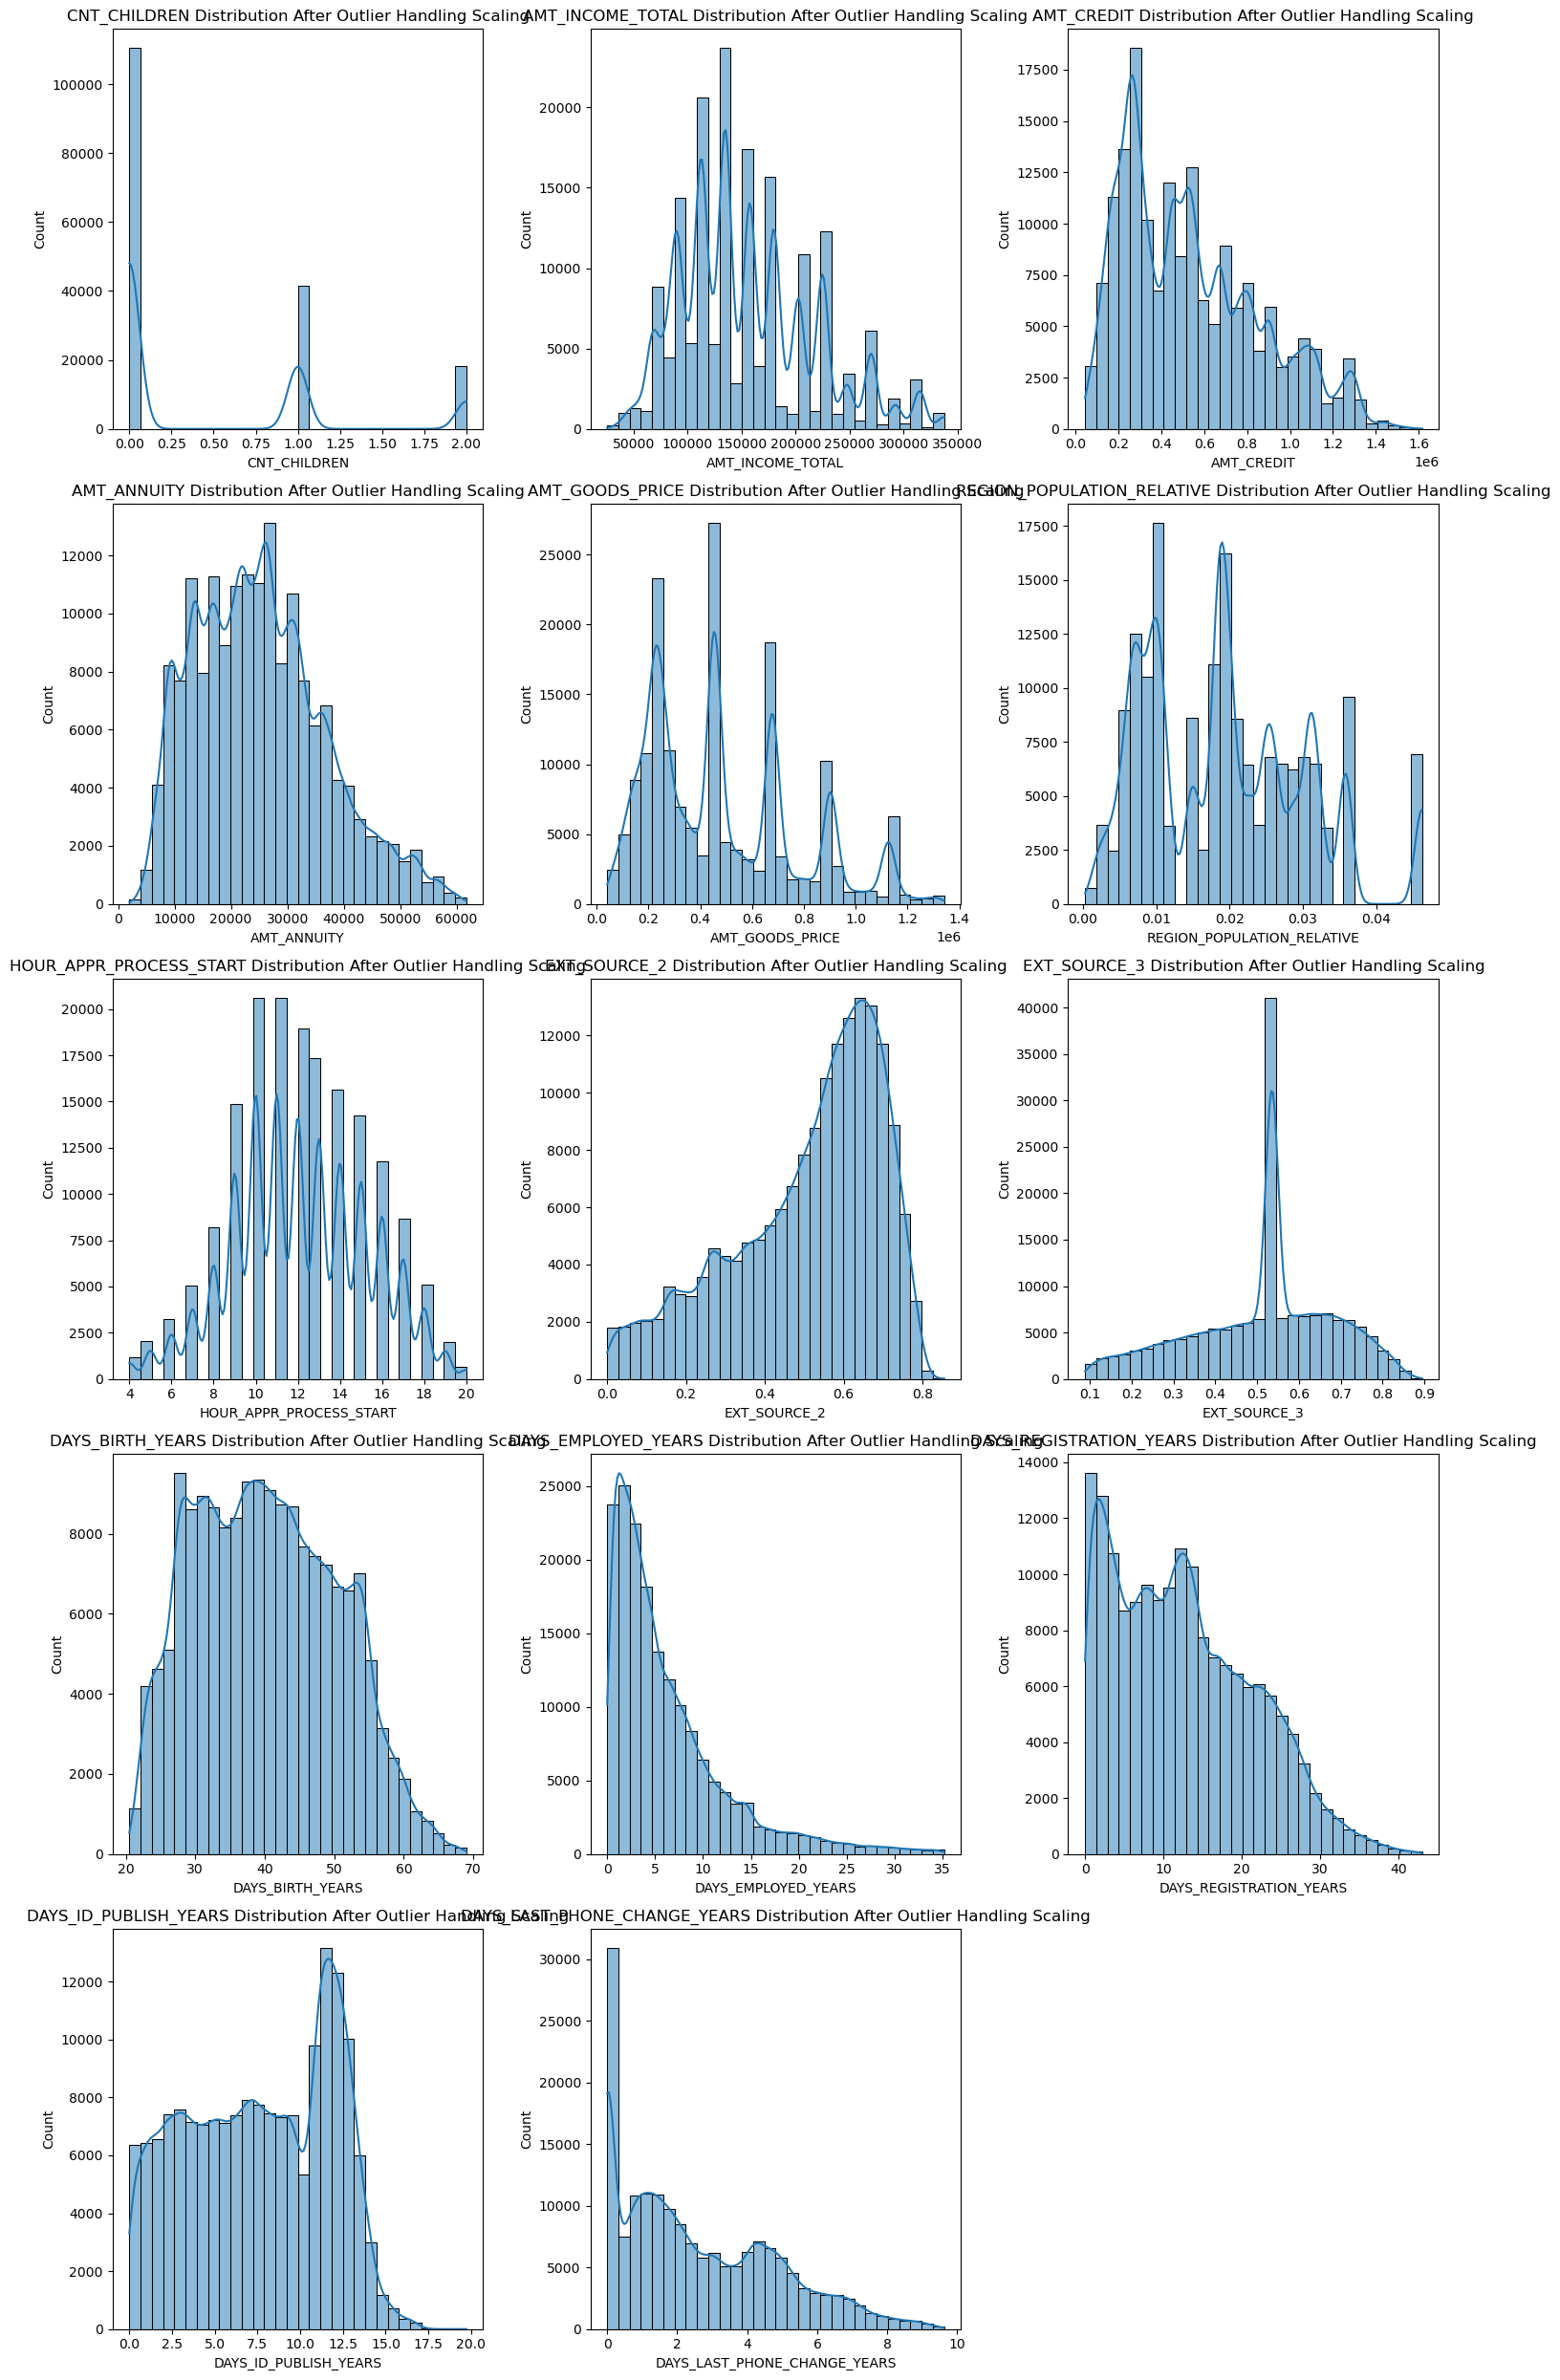


Plotting numerical distributions after scaling...


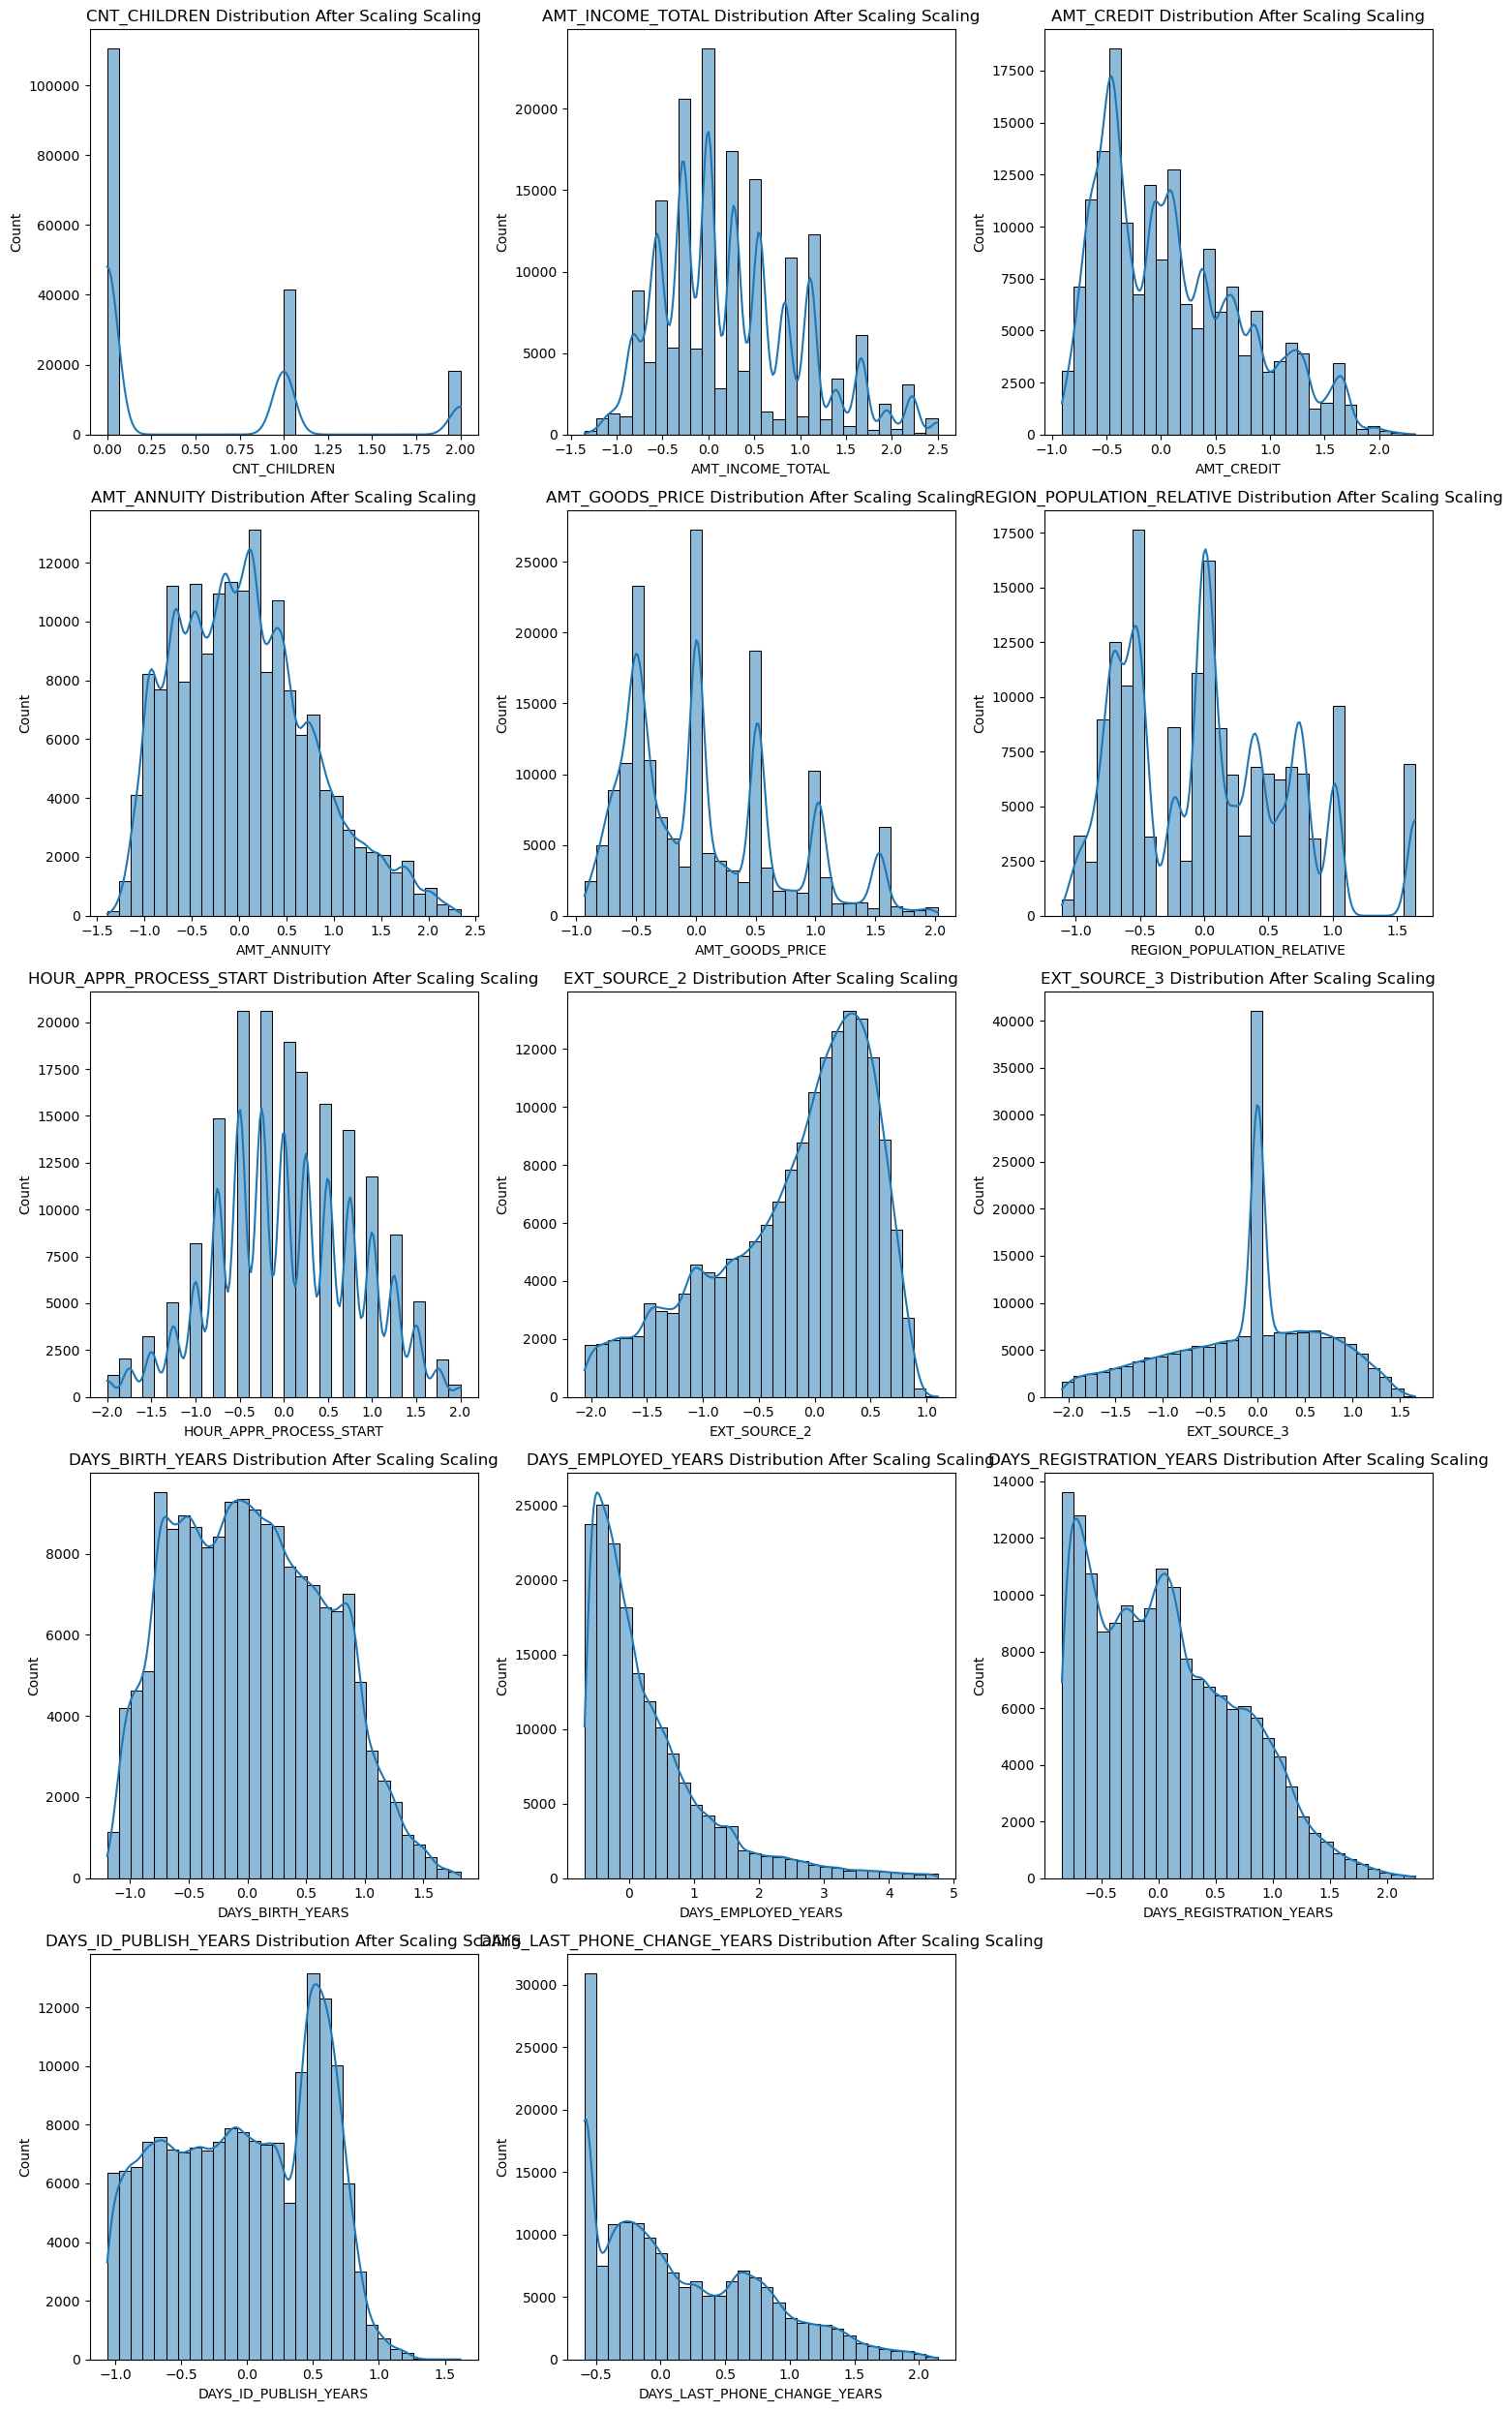


Balancing data using SMOTEENN...

Training XGBoost model...

Evaluating XGBoost model...

Evaluating with threshold: 0.1

Classification Report after Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     56538
           1       0.13      0.69      0.22      4965

    accuracy                           0.61     61503
   macro avg       0.54      0.65      0.48     61503
weighted avg       0.89      0.61      0.70     61503


Confusion Matrix after Threshold Adjustment:
                Predicted Negatives  Predicted Positives
True Negatives                34111                22427
True Positives                 1553                 3412

F1 Scores after Threshold Adjustment:
F1 Macro: 0.48
F1 Micro: 0.61
F1 Weighted: 0.70
F1 Binary: 0.22

Evaluating with threshold: 0.2

Classification Report after Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.95      0.69      0.8

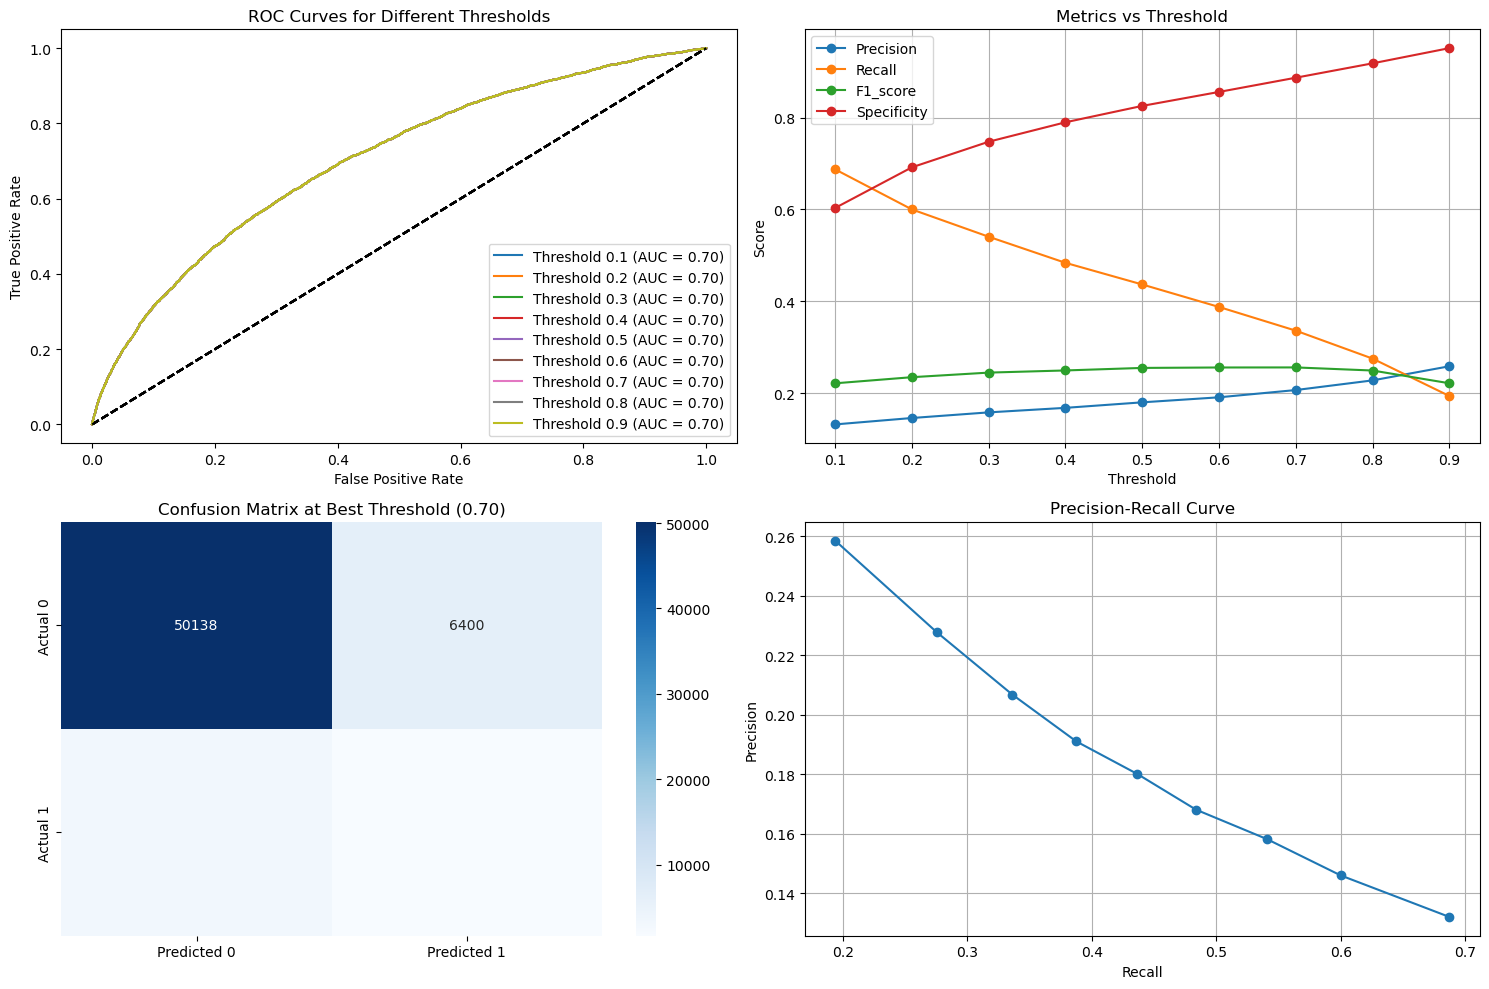


Analyzing feature importance...


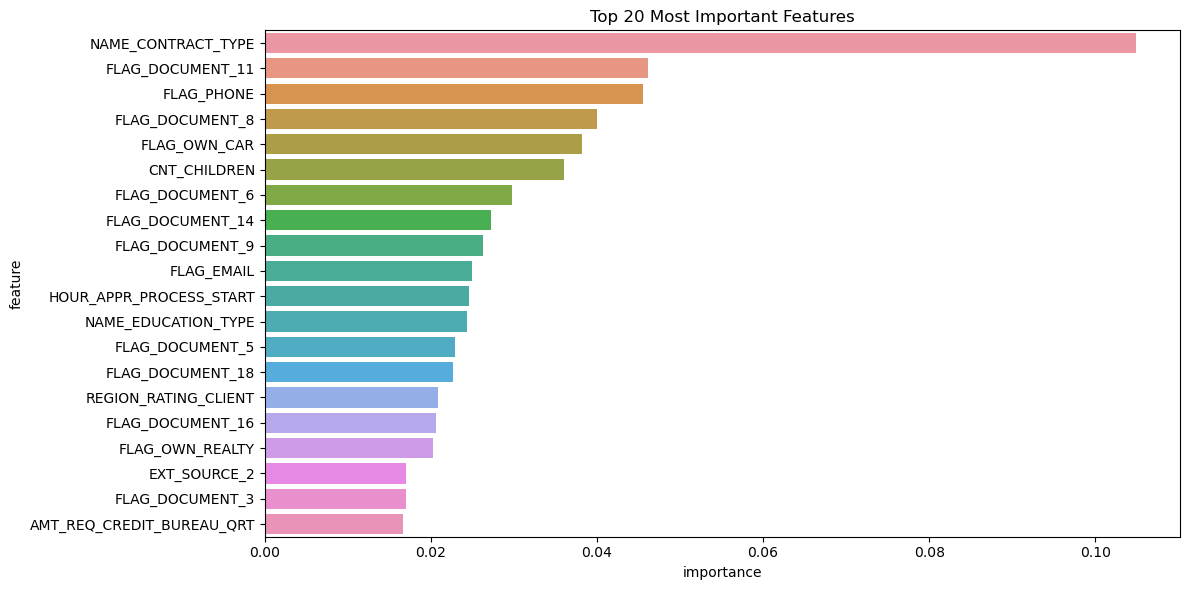


Best Threshold Analysis:
Best Threshold (highest F1): 0.70

Metrics at Best Threshold:
Precision: 0.207
Recall: 0.336
F1 Score: 0.256
Specificity: 0.887


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def plot_missing_values(df):
    """Plot columns with missing values above 30%"""
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_df = missing_percentage[missing_percentage > 30].sort_values(ascending=True)
    
    if len(missing_df) > 0:
        plt.figure(figsize=(10, 6))
        missing_df.plot(kind='barh')
        plt.title('Columns with >30% Missing Values')
        plt.xlabel('Missing Percentage')
        plt.tight_layout()
        plt.show()
    
    return missing_percentage

def plot_target_distribution(df):
    """Plot target variable distribution"""
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='TARGET')
    plt.title('Distribution of Target Variable')
    total = len(df)
    for p in plt.gca().patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                          ha='center', va='bottom')
    plt.show()

def plot_numerical_distributions(df, columns, before_after="Before"):
    """Plot distribution of numerical features before/after outlier handling"""
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.ravel()
    
    for idx, col in enumerate(columns):
        if col in df.columns:
            sns.histplot(df[col], ax=axes[idx], kde=True, bins=30)
            axes[idx].set_title(f'{col} Distribution {before_after} Scaling')
    
    for idx in range(len(columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names, top_n=20):
    """Plot feature importance from XGBoost model"""
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df.head(top_n), x='importance', y='feature')
    plt.title(f'Top {top_n} Most Important Features')
    plt.tight_layout()
    plt.show()
    
    return importance_df

def plot_categorical_analysis(df, cat_features):
    """Plot target distribution across categorical features"""
    for feature in cat_features:
        plt.figure(figsize=(10, 6))
        
        # Calculate percentages
        temp_df = df.groupby(feature)['TARGET'].value_counts(normalize=True).unstack()
        temp_df.plot(kind='bar', stacked=True)
        
        plt.title(f'Target Distribution by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.legend(title='TARGET', labels=['Non-default', 'Default'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def plot_income_credit_analysis(df):
    """Create scatter plot of Income vs Credit"""
    plt.figure(figsize=(10, 6))
    
    # Create scatter plot
    sns.scatterplot(data=df, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', 
                    hue='TARGET', alpha=0.5)
    
    # Add trend line
    sns.regplot(data=df, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', 
                scatter=False, color='red')
    
    plt.title('Income vs Credit Analysis')
    plt.xlabel('Total Income')
    plt.ylabel('Credit Amount')
    plt.legend(title='Default Status')
    plt.tight_layout()
    plt.show()

def load_and_preprocess_initial(filepath):
    """Load and perform initial preprocessing steps"""
    pd.set_option('display.max_columns', None)
    app_train = pd.read_csv(filepath)

    # Set SK_ID_CURR as index
    app_train.set_index('SK_ID_CURR', inplace=True)
    print("\nAnalyzing missing values...")
    missing_percentage = plot_missing_values(app_train)
    
    # Drop columns with more than 30% missing values
    app_train.drop(columns=missing_percentage[missing_percentage > 30].index, inplace=True)
    
    print("\nPlotting target distribution...")
    plot_target_distribution(app_train)
    
    # Convert specific columns to category type
    columns_to_convert = [
        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
        'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
    ]
    
    for col in columns_to_convert:
        if col in app_train.columns:
            app_train[col] = app_train[col].astype('category')
    
    return app_train

def preprocess_data(df, is_training=True, feature_names=None, encoders=None, imputer=None, scaler=None):
    """Enhanced preprocessing with consistent feature handling"""
    df_copy = df.copy()
    
    # Handle days columns
    days_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
    
    days_cols = [col for col in days_cols if col in df_copy.columns]
    
    for col in days_cols:
        df_copy[f'{col}_YEARS'] = abs(df_copy[col]) / 365
        if col == 'DAYS_EMPLOYED':
            df_copy[col] = df_copy[col].replace(365243, np.nan)
        df_copy.drop(col, axis=1, inplace=True)
    
    # Separate categorical and numerical columns
    categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
    if 'TARGET' in numerical_cols:
        numerical_cols = numerical_cols.drop('TARGET')
    
    if is_training:
        encoders = {}
        imputer = SimpleImputer(strategy='median')
        scaler = RobustScaler()
        
        # Process categorical columns
        for col in categorical_cols:
            df_copy[col] = df_copy[col].astype(str)
            le = LabelEncoder()
            le.fit(np.append(df_copy[col].unique(), 'Unknown'))
            df_copy[col] = le.transform(df_copy[col])
            encoders[col] = le
        
        # Process numerical columns
        df_copy[numerical_cols] = imputer.fit_transform(df_copy[numerical_cols])
        
        # Visualize distributions before handling outliers
        print("\nPlotting numerical distributions before handling outliers...")
        plot_numerical_distributions(df_copy, numerical_cols, "Before Outlier Handling")
        
        # Handle outliers
        outlier_flags = rule_based_outlier_detection(df_copy, numerical_cols)
        for col in numerical_cols:
            df_copy = df_copy[~outlier_flags[col]]  # Remove outliers
        
        # Visualize distributions after handling outliers
        print("\nPlotting numerical distributions after handling outliers...")
        plot_numerical_distributions(df_copy, numerical_cols, "After Outlier Handling")
        
        # Scaling after outlier removal
        df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])
        
        # Visualize distributions after scaling
        print("\nPlotting numerical distributions after scaling...")
        plot_numerical_distributions(df_copy, numerical_cols, "After Scaling")  # First 9 for visibility
        
        # Store feature names
        feature_names = df_copy.columns.tolist()
        if 'TARGET' in feature_names:
            feature_names.remove('TARGET')
            
    else:
        # Ensure all columns from training exist in test
        for col in feature_names:
            if col not in df_copy.columns and col != 'TARGET':
                df_copy[col] = 0
        
        # Keep only columns that were in training
        df_copy = df_copy[feature_names]
        
        # Process categorical columns
        for col in categorical_cols:
            if col in df_copy.columns:
                df_copy[col] = df_copy[col].astype(str)
                df_copy[col] = df_copy[col].map(lambda x: x if x in encoders[col].classes_ else 'Unknown')
                df_copy[col] = encoders[col].transform(df_copy[col])
        
        # Process numerical columns
        numerical_cols = [col for col in numerical_cols if col in df_copy.columns]
        if numerical_cols:
            df_copy[numerical_cols] = imputer.transform(df_copy[numerical_cols])
            df_copy[numerical_cols] = scaler.transform(df_copy[numerical_cols])
    
    return df_copy, feature_names, encoders, imputer, scaler

def rule_based_outlier_detection(df, numerical_cols, threshold=1.5):
    """Rule-Based Outlier Detection using IQR"""
    outlier_flags = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Flagging outliers
        outlier_flags[col] = ((df[col] < lower_bound) | (df[col] > upper_bound))
        
    return outlier_flags

def create_balanced_data_with_smoteenn(X, y):
    """Create balanced dataset using SMOTEENN"""
    smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)
    return smoteenn.fit_resample(X, y)

# Main execution
print("\nLoading and performing initial preprocessing...")
filepath = r"D:\Perkuliahan\Rakamin PBI (Home Credit Indonesia)\Dataset Proyek\home-credit-default-risk\application_train.csv"
app_train = load_and_preprocess_initial(filepath)

# Analyze important categorical features
print("\nAnalyzing categorical features...")
categorical_cols = app_train.select_dtypes(include=['object', 'category']).columns
plot_categorical_analysis(app_train, categorical_cols)

# Analyze Income vs Credit
print("\nAnalyzing Income vs Credit relationship...")
plot_income_credit_analysis(app_train)

# Split features and target
X = app_train.drop(columns = 'TARGET')
y = app_train['TARGET']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print("\nApplying preprocessing...")
X_train_processed, feature_names, encoders, imputer, scaler = preprocess_data(X_train, is_training=True)
X_test_processed, _, _, _, _ = preprocess_data(X_test, is_training=False,
                                             feature_names=feature_names,
                                             encoders=encoders,
                                             imputer=imputer,
                                             scaler=scaler)

# Ensure y_train matches the number of samples in X_train_processed
y_train_processed = y_train[X_train.index.isin(X_train_processed.index)]

print("\nBalancing data using SMOTEENN...")
X_train_balanced, y_train_balanced = create_balanced_data_with_smoteenn(X_train_processed, y_train_processed)

# Training XGB model
print("\nTraining XGBoost model...")
xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    min_child_weight=5,
    subsample=0.85,
    scale_pos_weight=20,
    random_state=42,
    eval_metric="logloss",
    tree_method='auto'
)

xgb_model.fit(X_train_balanced, y_train_balanced)

# Evaluating model with different thresholds
print("\nEvaluating XGBoost model...")
y_pred = xgb_model.predict(X_test_processed)
y_pred_proba = xgb_model.predict_proba(X_test_processed)[:, 1]

# Adjusting the Decision Threshold and performing iterations
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

plt.figure(figsize=(15, 10))
for threshold in thresholds:
    print(f"\nEvaluating with threshold: {threshold}")
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    print("\nClassification Report after Threshold Adjustment:")
    print(classification_report(y_test, y_pred_adjusted, zero_division=0))

    # Confusion Matrix for Adjusted Threshold
    conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    conf_matrix_df = pd.DataFrame(
        conf_matrix_adjusted,
        index=['True Negatives', 'True Positives'],
        columns=['Predicted Negatives', 'Predicted Positives']
    )
    print("\nConfusion Matrix after Threshold Adjustment:")
    print(conf_matrix_df)

    # Calculate various metrics
    tn, fp, fn, tp = conf_matrix_adjusted.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'specificity': specificity
    })

    # Calculate F1 Scores for different averages
    f1_macro = f1_score(y_test, y_pred_adjusted, average='macro')
    f1_micro = f1_score(y_test, y_pred_adjusted, average='micro')
    f1_weighted = f1_score(y_test, y_pred_adjusted, average='weighted')
    f1_binary = f1_score(y_test, y_pred_adjusted, average='binary')

    print(f"\nF1 Scores after Threshold Adjustment:")
    print(f"F1 Macro: {f1_macro:.2f}")
    print(f"F1 Micro: {f1_micro:.2f}")
    print(f"F1 Weighted: {f1_weighted:.2f}")
    print(f"F1 Binary: {f1_binary:.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, label=f'Threshold {threshold} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Thresholds')
    plt.legend(loc='lower right')

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot metrics vs threshold
plt.subplot(2, 2, 2)
for metric in ['precision', 'recall', 'f1_score', 'specificity']:
    plt.plot(results_df['threshold'], results_df[metric], marker='o', label=metric.capitalize())
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Threshold')
plt.legend()
plt.grid(True)

# Plot confusion matrix heatmap for best F1 threshold
best_threshold_idx = results_df['f1_score'].idxmax()
best_threshold = results_df.loc[best_threshold_idx, 'threshold']
y_pred_best = (y_pred_proba >= best_threshold).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix at Best Threshold ({best_threshold:.2f})')

# Plot precision-recall curve
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
plt.subplot(2, 2, 4)
plt.plot(recalls, precisions, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyzing feature importance after model evaluation
print("\nAnalyzing feature importance...")
importance_df = plot_feature_importance(xgb_model, feature_names)

# Print final summary
print("\nBest Threshold Analysis:")
print(f"Best Threshold (highest F1): {best_threshold:.2f}")
print("\nMetrics at Best Threshold:")
print(f"Precision: {results_df.loc[best_threshold_idx, 'precision']:.3f}")
print(f"Recall: {results_df.loc[best_threshold_idx, 'recall']:.3f}")
print(f"F1 Score: {results_df.loc[best_threshold_idx, 'f1_score']:.3f}")
print(f"Specificity: {results_df.loc[best_threshold_idx, 'specificity']:.3f}")


Loading and preprocessing app_test...

Analyzing missing values...


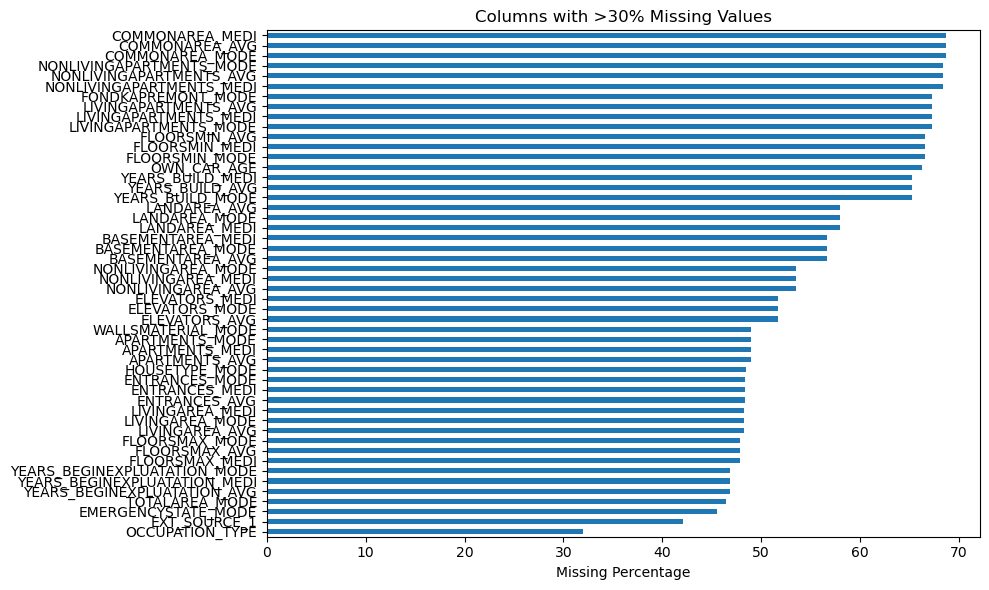


Handling missing values...

Handling outliers...

Scaling numerical features...

Ensuring feature consistency...

Making predictions...

Creating submission file...

First few predictions:
   SK_ID_CURR  TARGET
0      100001       0
1      100005       1
2      100038       1
3      100042       0
4      100057       0


In [3]:
# Load and preprocess app_test
def load_and_preprocess_test(filepath, encoders, imputer, scaler):
    """Load and preprocess the test dataset"""
    pd.set_option('display.max_columns', None)
    app_test = pd.read_csv(filepath)

    # Set SK_ID_CURR as index
    app_test.set_index('SK_ID_CURR', inplace=True)
    print("\nAnalyzing missing values...")
    missing_percentage = plot_missing_values(app_test)
    
    # Drop columns with more than 30% missing values
    app_test.drop(columns=missing_percentage[missing_percentage > 30].index, inplace=True)
    
    # Convert specific columns to category type (same as training)
    columns_to_convert = [
        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
        'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
    ]
    
    for col in columns_to_convert:
        if col in app_test.columns:
            app_test[col] = app_test[col].astype('category')

    # Handle days columns
    days_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
    
    for col in days_cols:
        if col in app_test.columns:
            app_test[f'{col}_YEARS'] = abs(app_test[col]) / 365
            if col == 'DAYS_EMPLOYED':
                app_test[col] = app_test[col].replace(365243, np.nan)
            app_test.drop(col, axis=1, inplace=True)

    # Separate categorical and numerical columns
    categorical_cols = app_test.select_dtypes(include=['object', 'category']).columns
    numerical_cols = app_test.select_dtypes(include=['int64', 'float64']).columns

    # Process categorical columns using saved encoders
    for col in categorical_cols:
        if col in app_test.columns:
            app_test[col] = app_test[col].astype(str)
            app_test[col] = app_test[col].map(lambda x: x if x in encoders[col].classes_ else 'Unknown')
            app_test[col] = encoders[col].transform(app_test[col])

    # Process numerical columns using saved imputer
    print("\nHandling missing values...")
    app_test[numerical_cols] = imputer.transform(app_test[numerical_cols])

    # Handle outliers using the same IQR method as in app_train
    print("\nHandling outliers...")
    outlier_flags = rule_based_outlier_detection(app_test, numerical_cols)
    
    # Remove outliers from app_test
    for col in numerical_cols:
        if col in app_test.columns:
            app_test = app_test[~outlier_flags[col]]  # Remove outliers

    # Scale numerical features using saved scaler
    print("\nScaling numerical features...")
    app_test[numerical_cols] = scaler.transform(app_test[numerical_cols])

    # Ensure all columns match training data
    print("\nEnsuring feature consistency...")
    for col in feature_names:
        if col not in app_test.columns:
            app_test[col] = 0
    app_test = app_test[feature_names]

    return app_test

# Main execution for app_test
print("\nLoading and preprocessing app_test...")
test_filepath = r"D:\Perkuliahan\Rakamin PBI (Home Credit Indonesia)\Dataset Proyek\home-credit-default-risk\application_test.csv"
app_test = load_and_preprocess_test(test_filepath, encoders, imputer, scaler)

# Make predictions using the best threshold
print("\nMaking predictions...")
test_pred_proba = xgb_model.predict_proba(app_test)[:, 1]  # Get probabilities for the positive class
test_predictions = (test_pred_proba >= best_threshold).astype(int)  # Apply the best threshold

# Create submission DataFrame
print("\nCreating submission file...")
submission = pd.DataFrame({
    'SK_ID_CURR': app_test.index,
    'TARGET': test_predictions
})


# Display first few predictions
print("\nFirst few predictions:")
print(submission.head())

# Logistic Regression


Loading and performing initial preprocessing...

Analyzing missing values...


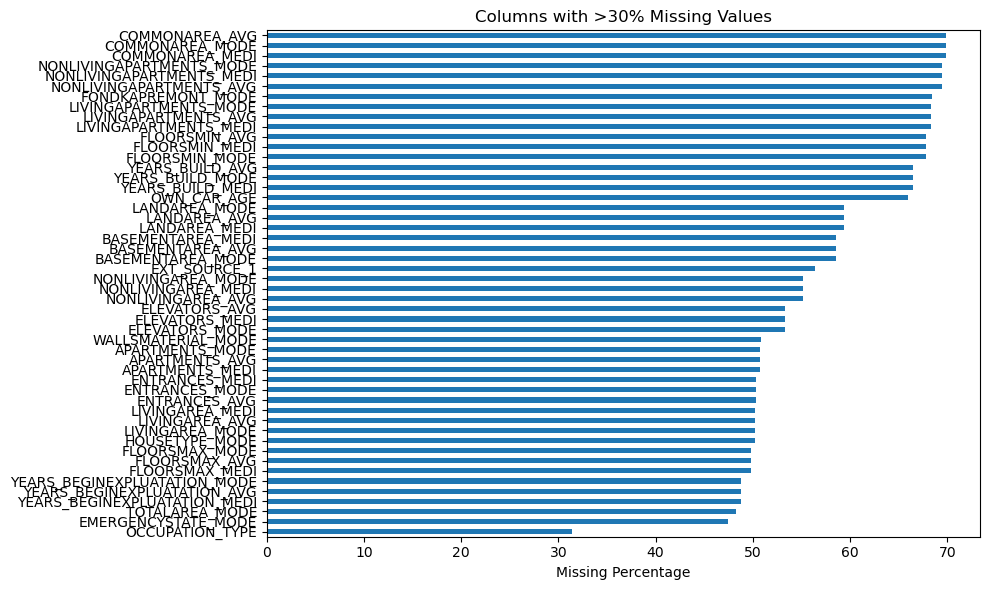


Plotting target distribution...


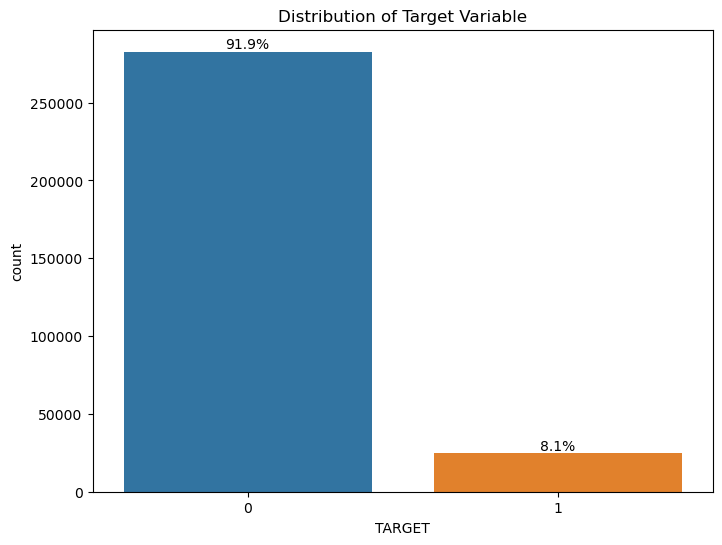


Analyzing categorical features...


<Figure size 1000x600 with 0 Axes>

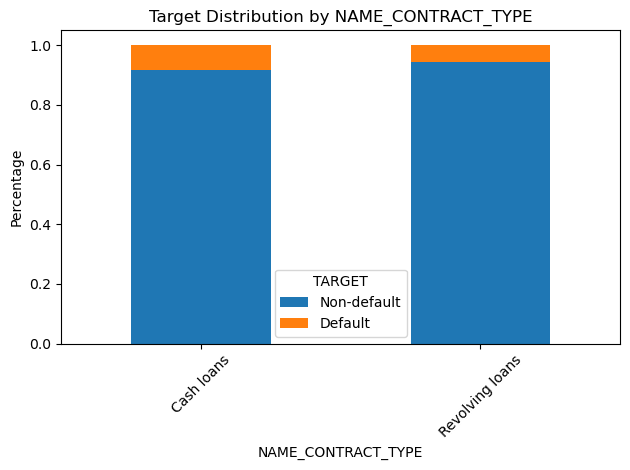

<Figure size 1000x600 with 0 Axes>

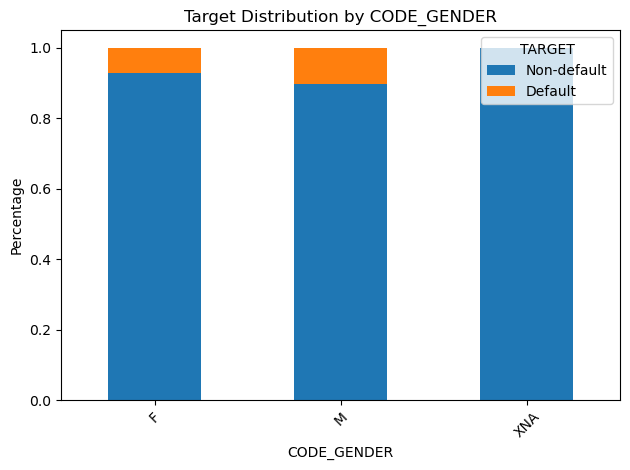

<Figure size 1000x600 with 0 Axes>

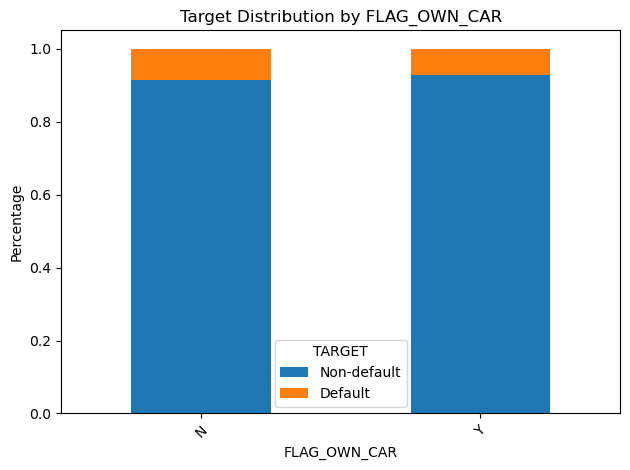

<Figure size 1000x600 with 0 Axes>

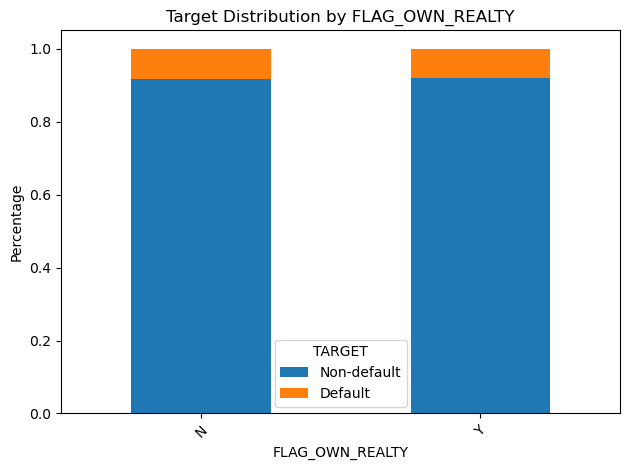

<Figure size 1000x600 with 0 Axes>

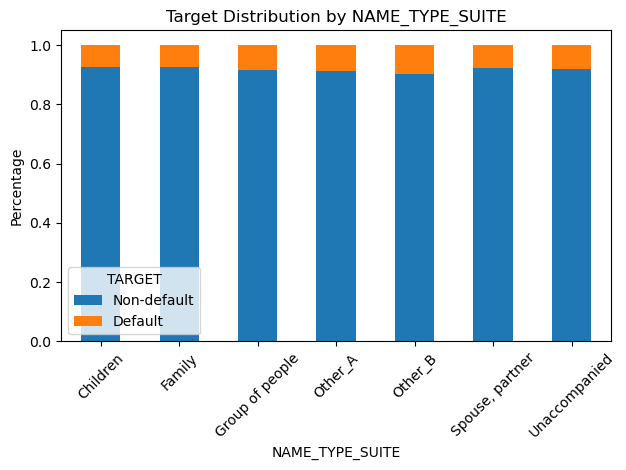

<Figure size 1000x600 with 0 Axes>

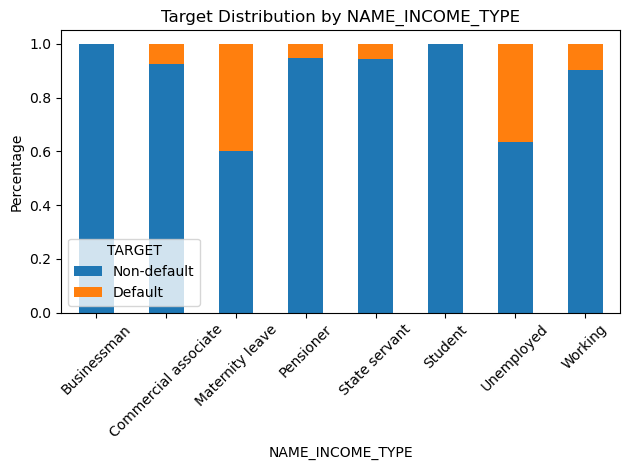

<Figure size 1000x600 with 0 Axes>

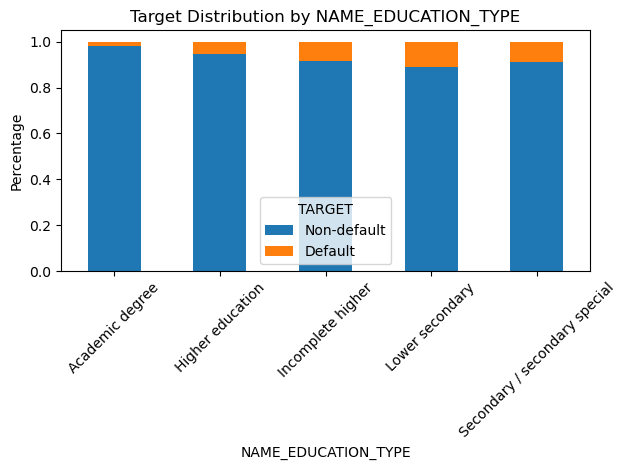

<Figure size 1000x600 with 0 Axes>

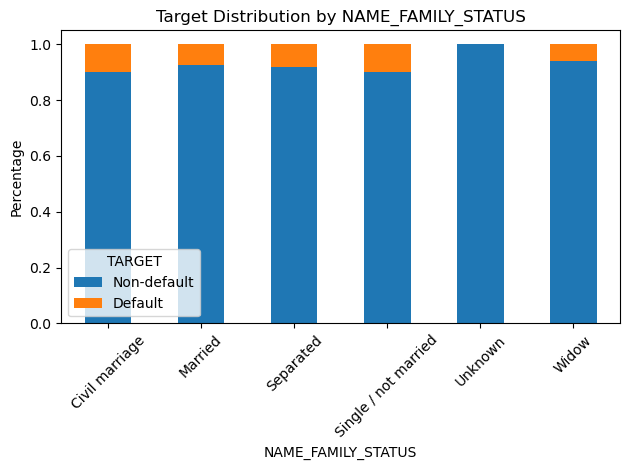

<Figure size 1000x600 with 0 Axes>

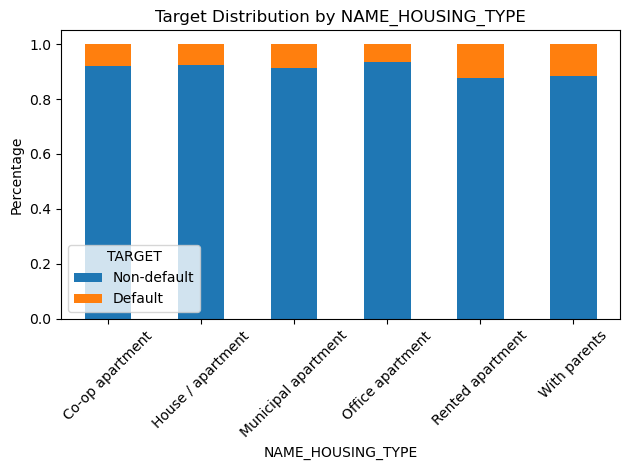

<Figure size 1000x600 with 0 Axes>

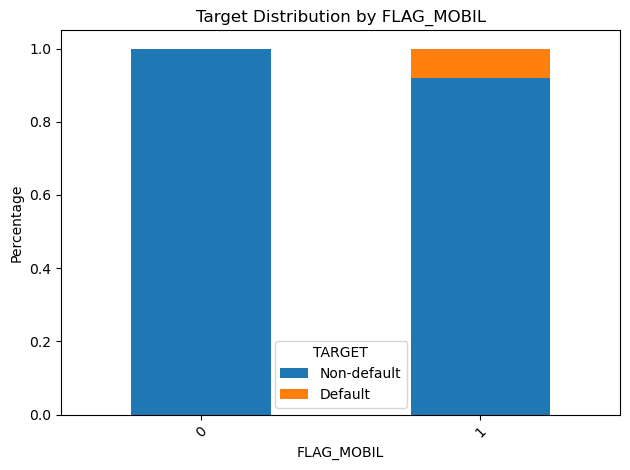

<Figure size 1000x600 with 0 Axes>

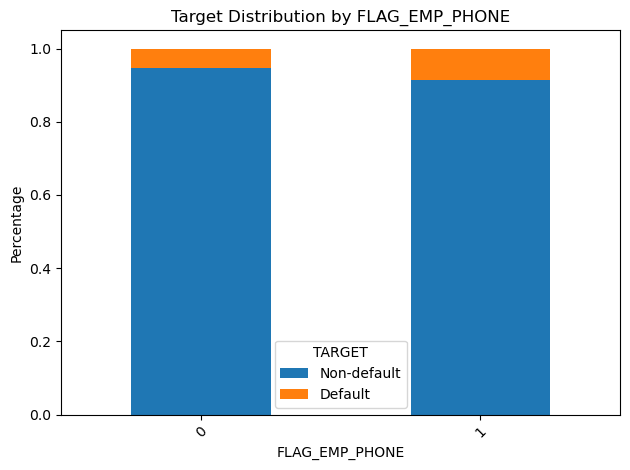

<Figure size 1000x600 with 0 Axes>

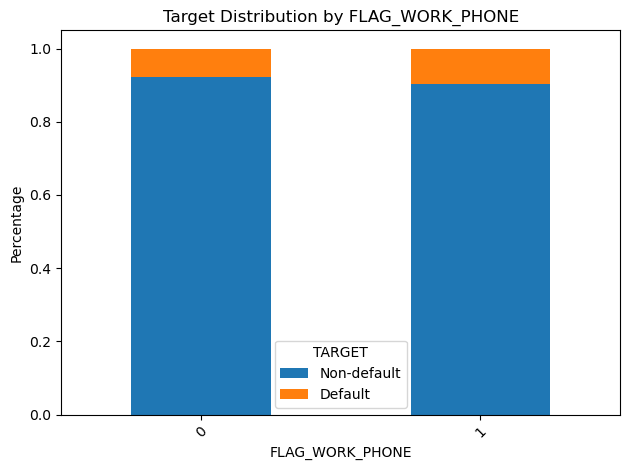

<Figure size 1000x600 with 0 Axes>

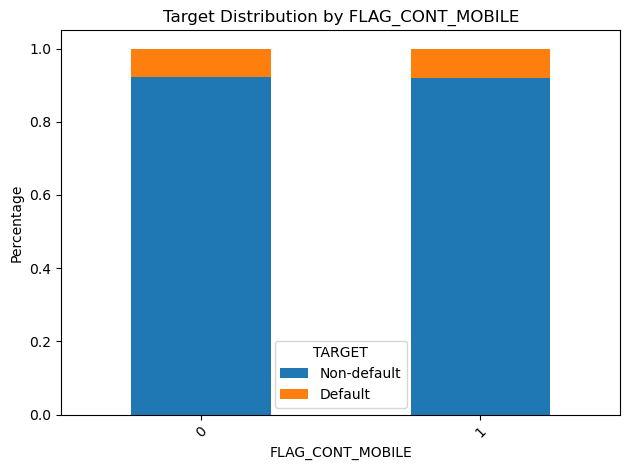

<Figure size 1000x600 with 0 Axes>

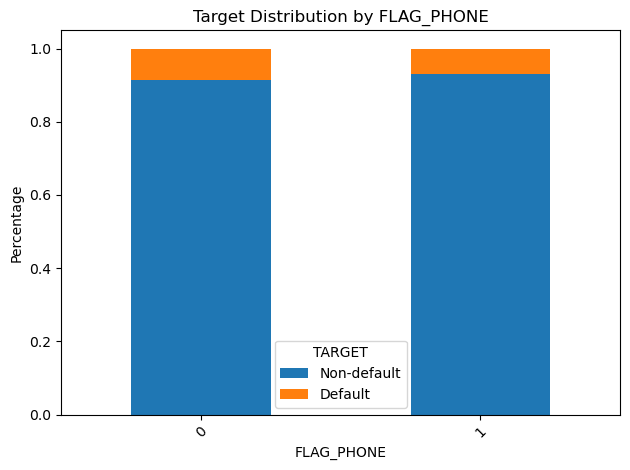

<Figure size 1000x600 with 0 Axes>

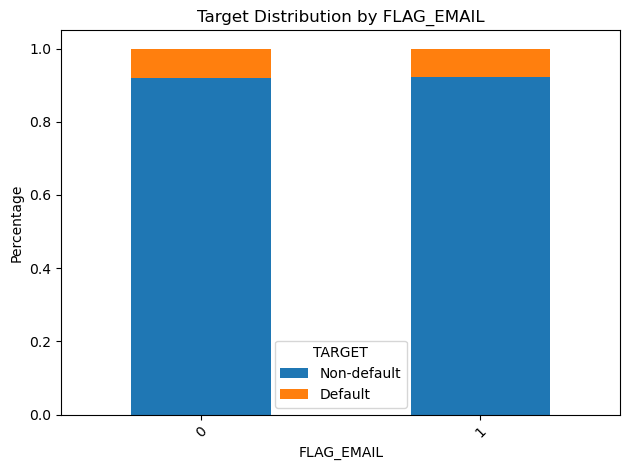

<Figure size 1000x600 with 0 Axes>

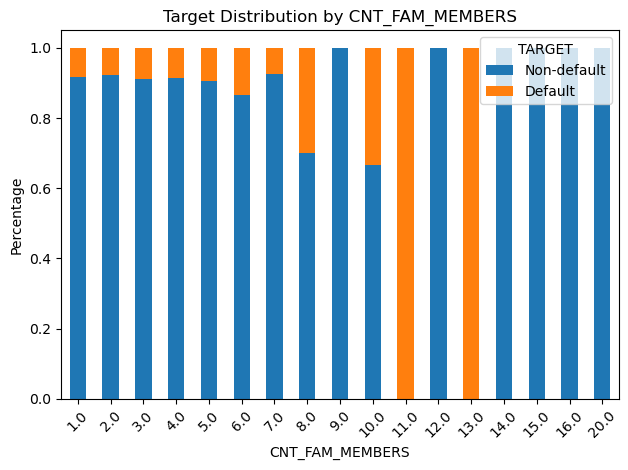

<Figure size 1000x600 with 0 Axes>

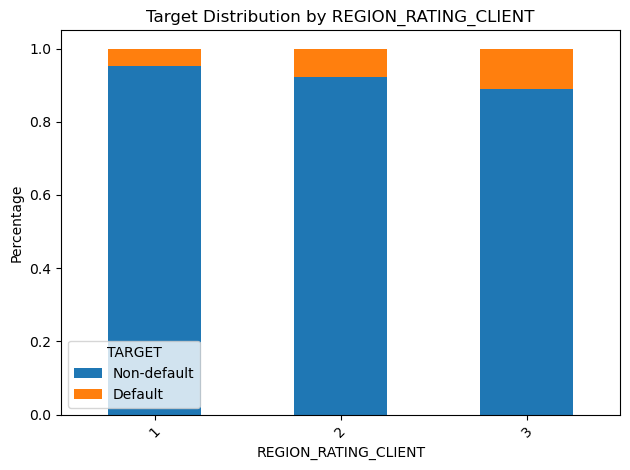

<Figure size 1000x600 with 0 Axes>

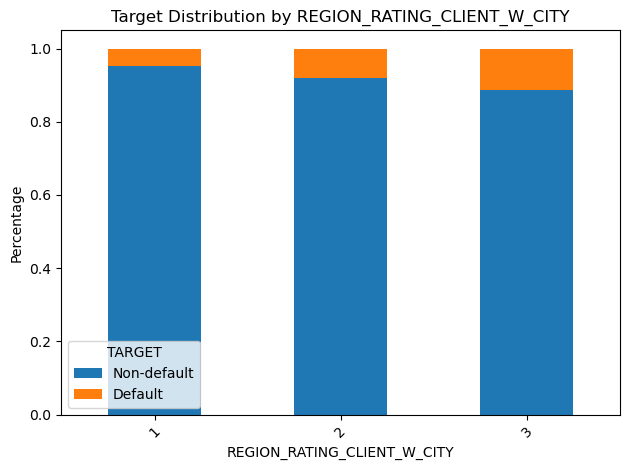

<Figure size 1000x600 with 0 Axes>

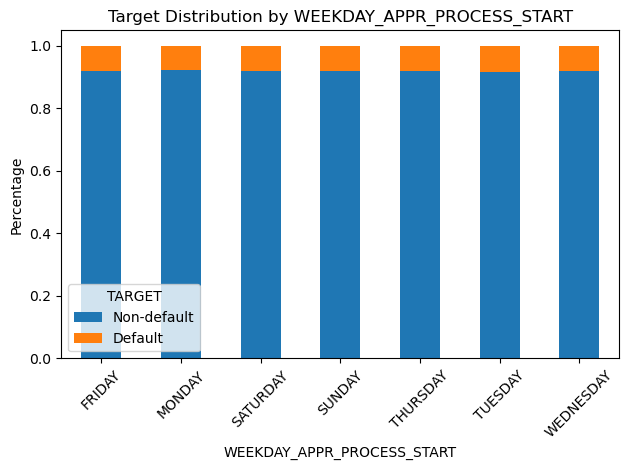

<Figure size 1000x600 with 0 Axes>

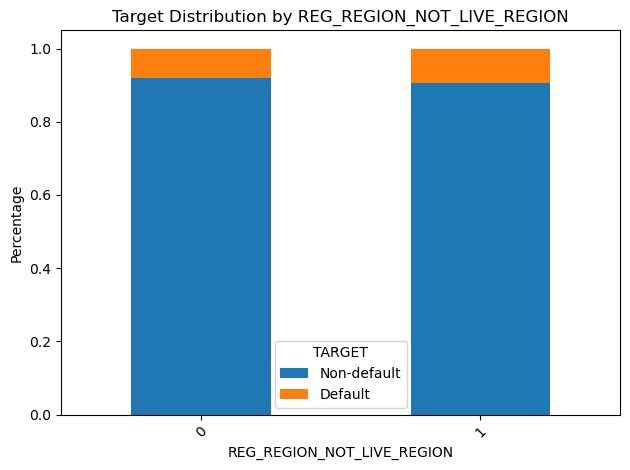

<Figure size 1000x600 with 0 Axes>

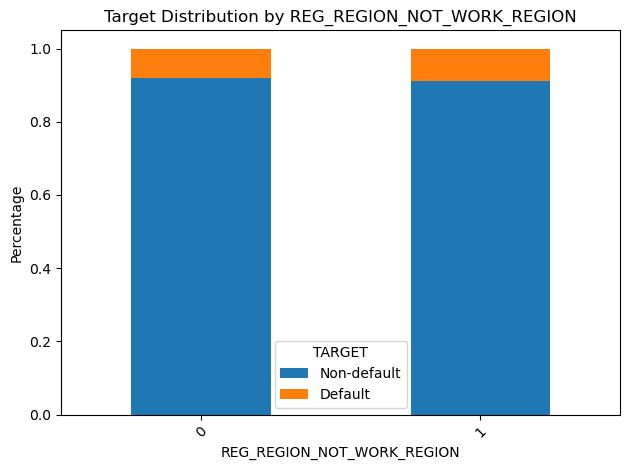

<Figure size 1000x600 with 0 Axes>

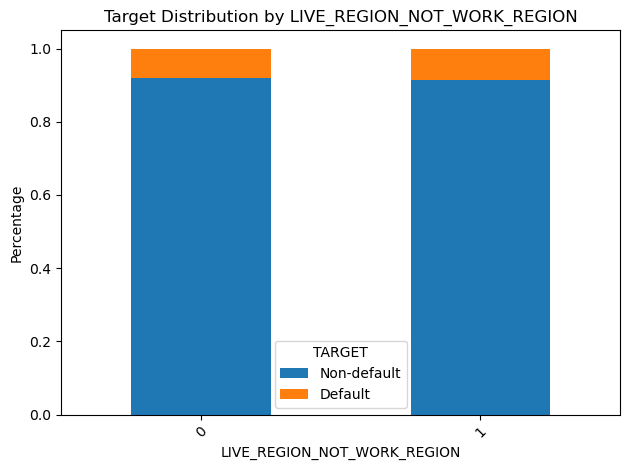

<Figure size 1000x600 with 0 Axes>

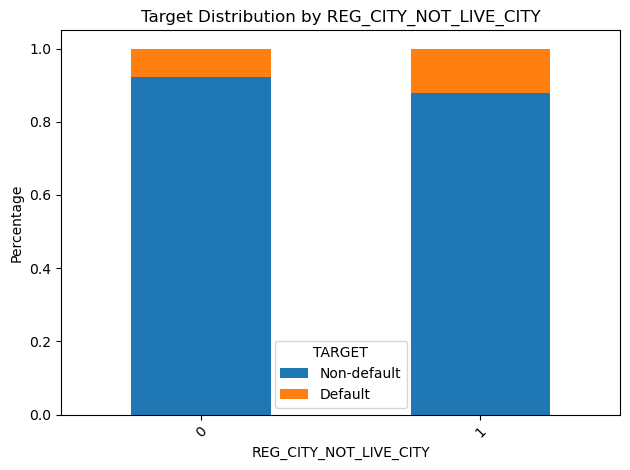

<Figure size 1000x600 with 0 Axes>

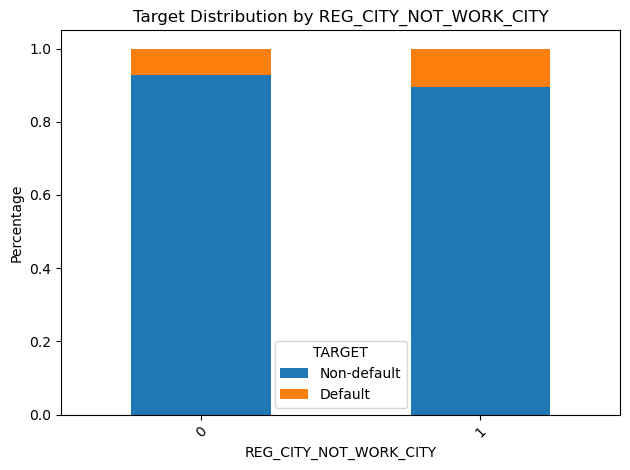

<Figure size 1000x600 with 0 Axes>

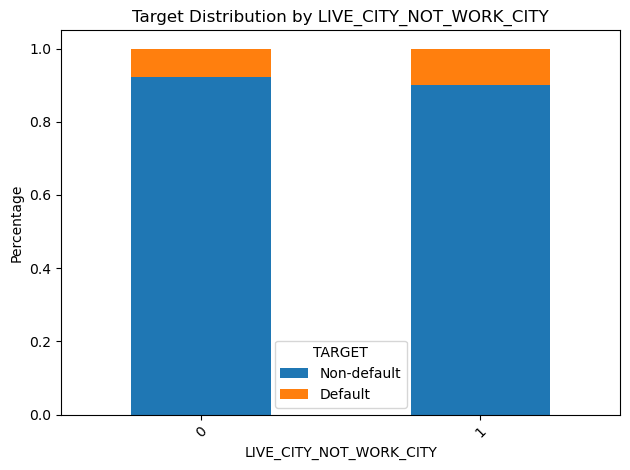

<Figure size 1000x600 with 0 Axes>

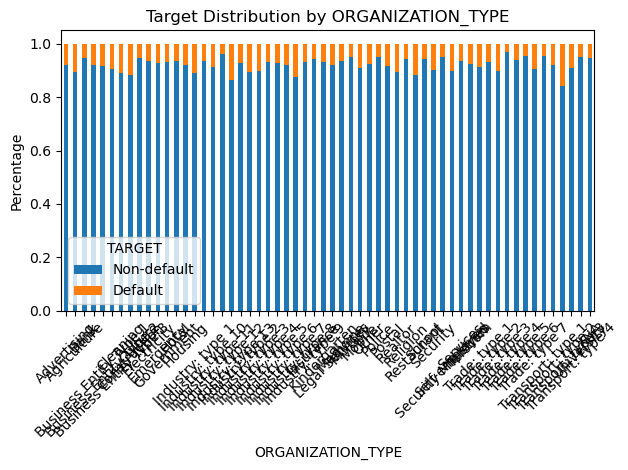

<Figure size 1000x600 with 0 Axes>

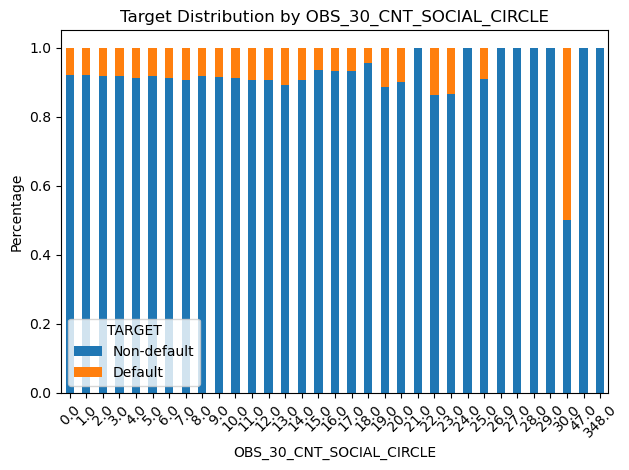

<Figure size 1000x600 with 0 Axes>

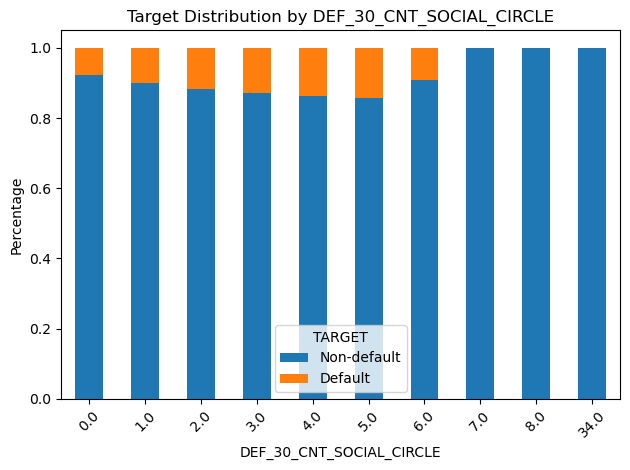

<Figure size 1000x600 with 0 Axes>

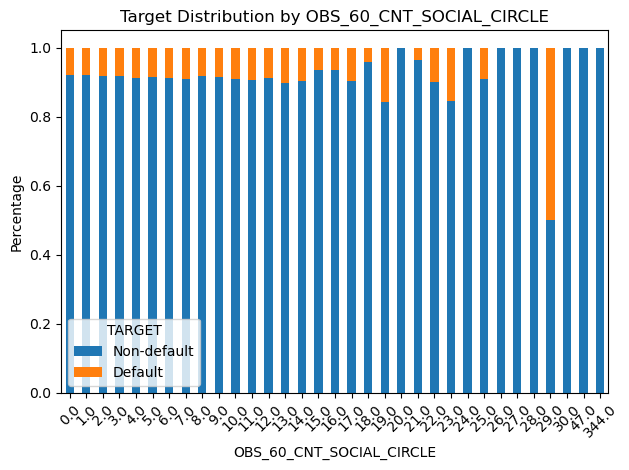

<Figure size 1000x600 with 0 Axes>

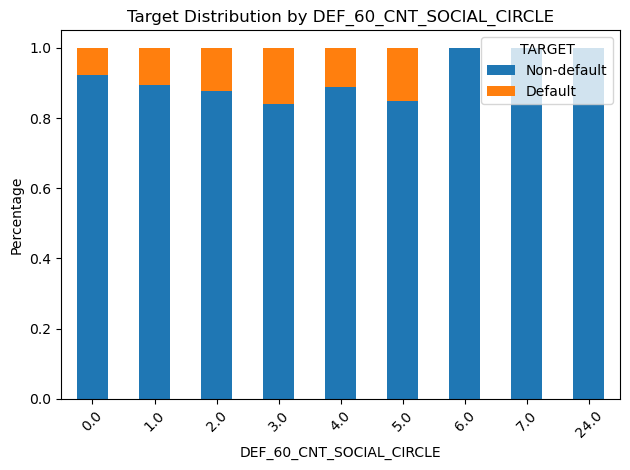

<Figure size 1000x600 with 0 Axes>

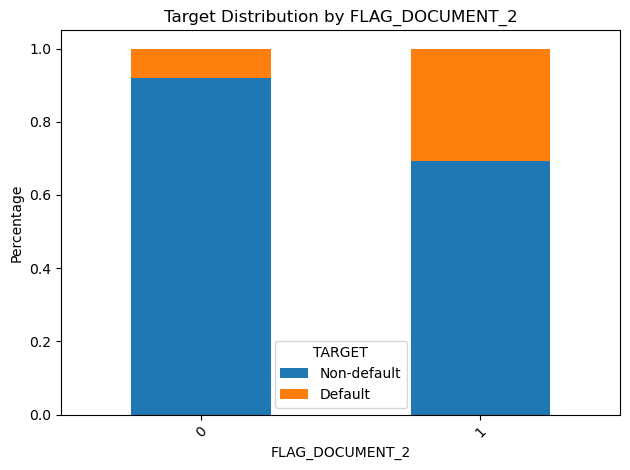

<Figure size 1000x600 with 0 Axes>

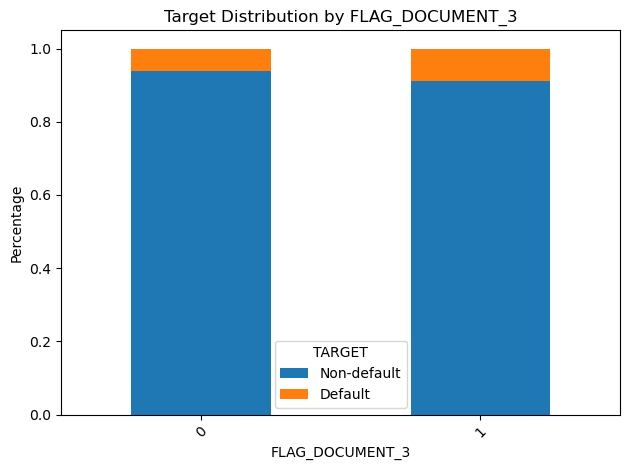

<Figure size 1000x600 with 0 Axes>

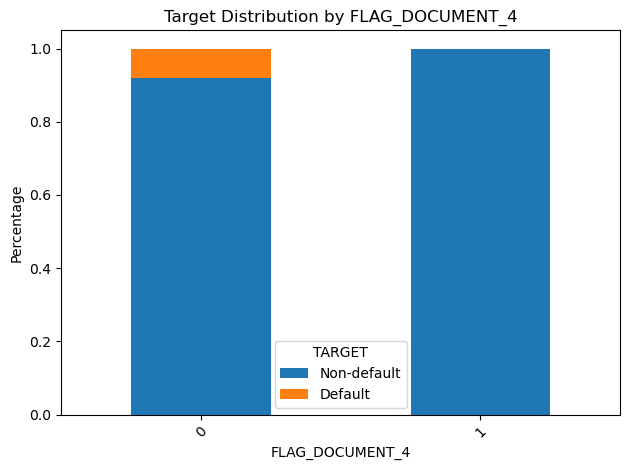

<Figure size 1000x600 with 0 Axes>

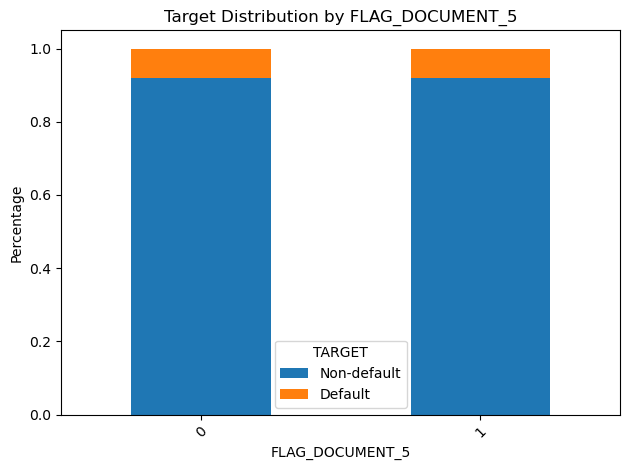

<Figure size 1000x600 with 0 Axes>

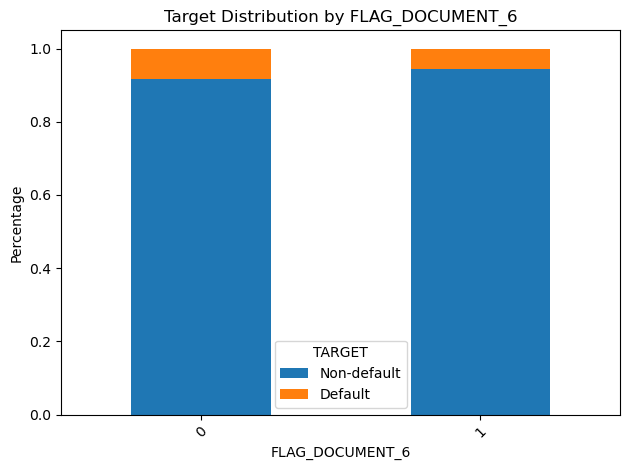

<Figure size 1000x600 with 0 Axes>

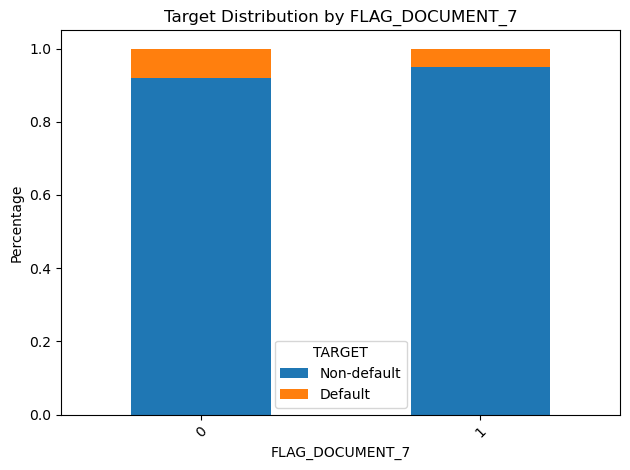

<Figure size 1000x600 with 0 Axes>

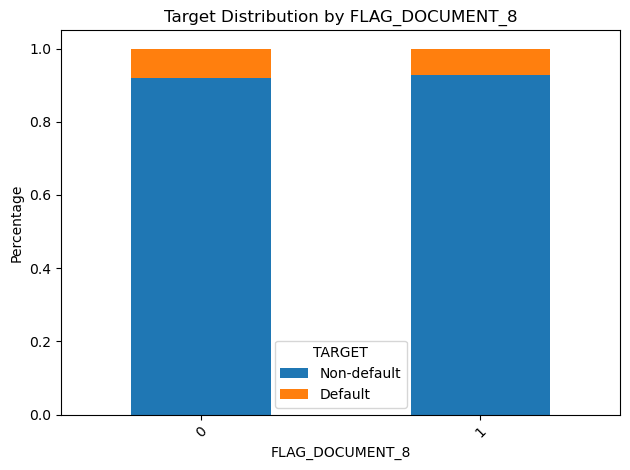

<Figure size 1000x600 with 0 Axes>

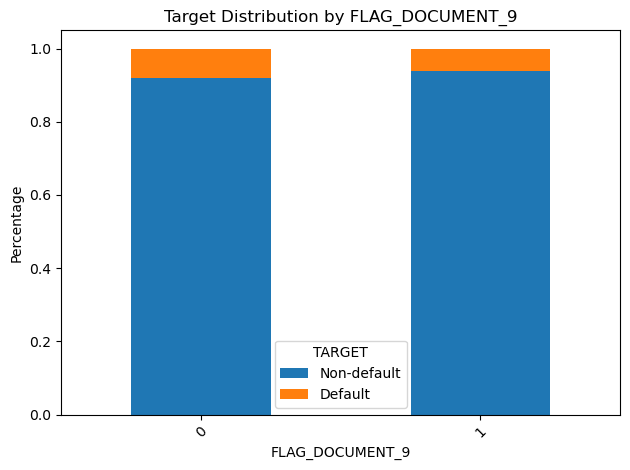

<Figure size 1000x600 with 0 Axes>

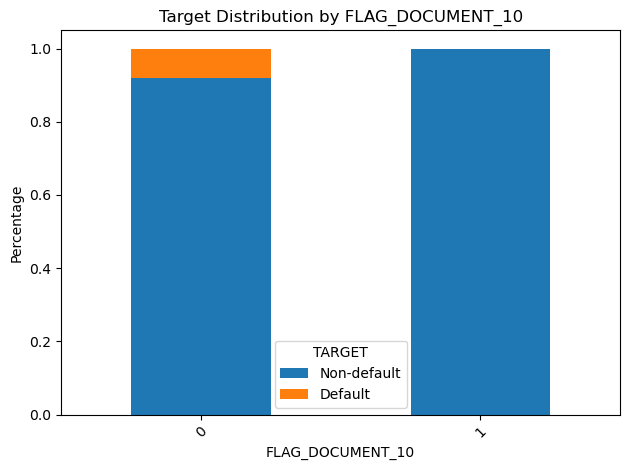

<Figure size 1000x600 with 0 Axes>

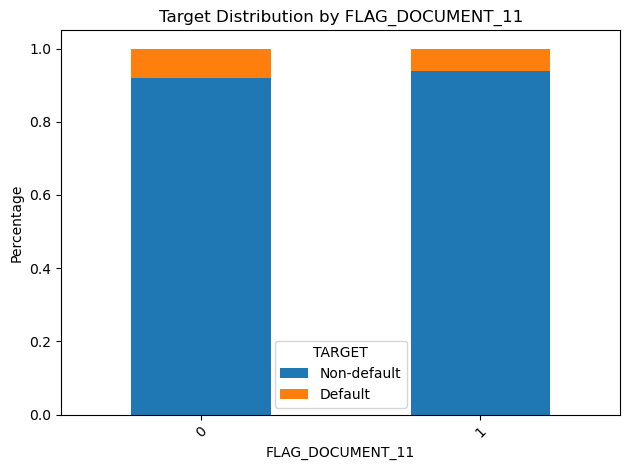

<Figure size 1000x600 with 0 Axes>

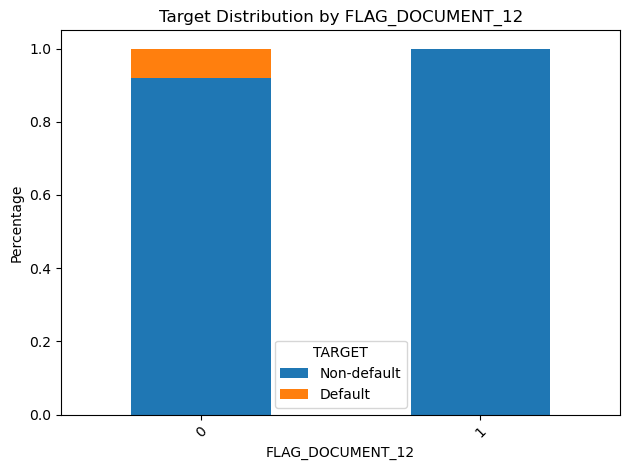

<Figure size 1000x600 with 0 Axes>

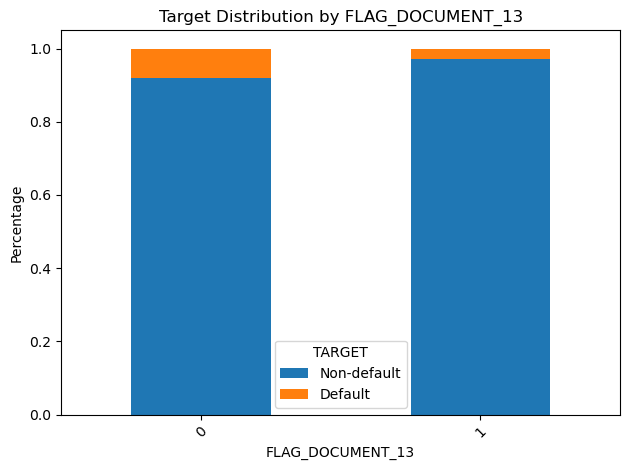

<Figure size 1000x600 with 0 Axes>

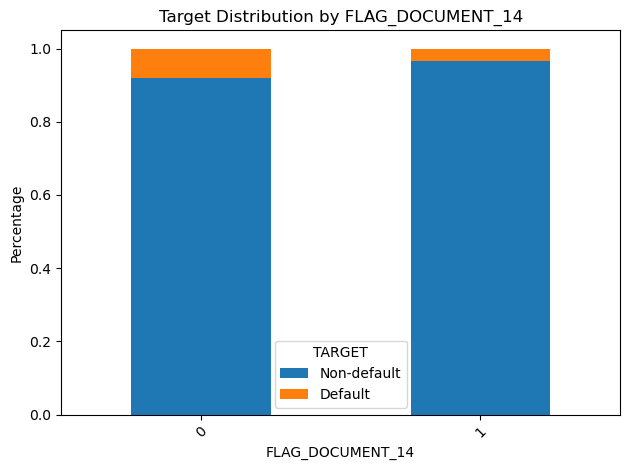

<Figure size 1000x600 with 0 Axes>

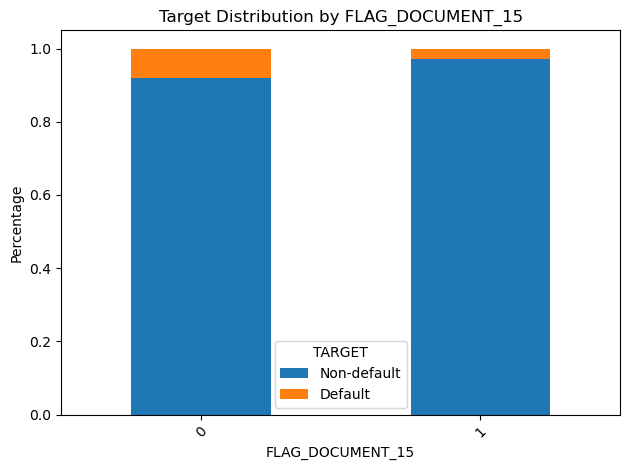

<Figure size 1000x600 with 0 Axes>

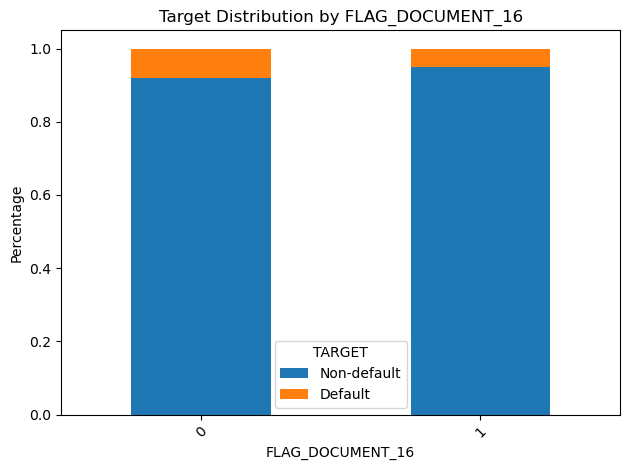

<Figure size 1000x600 with 0 Axes>

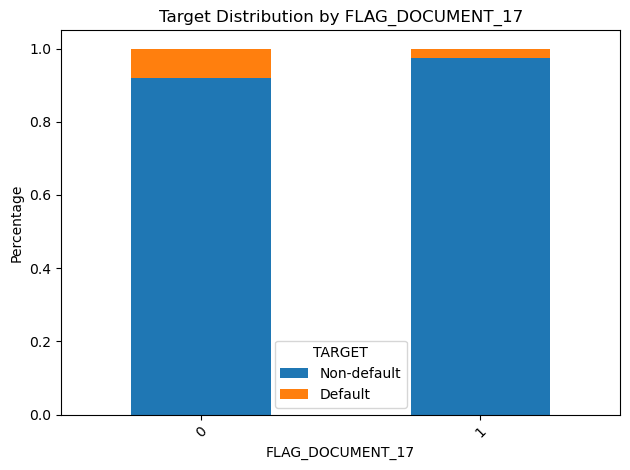

<Figure size 1000x600 with 0 Axes>

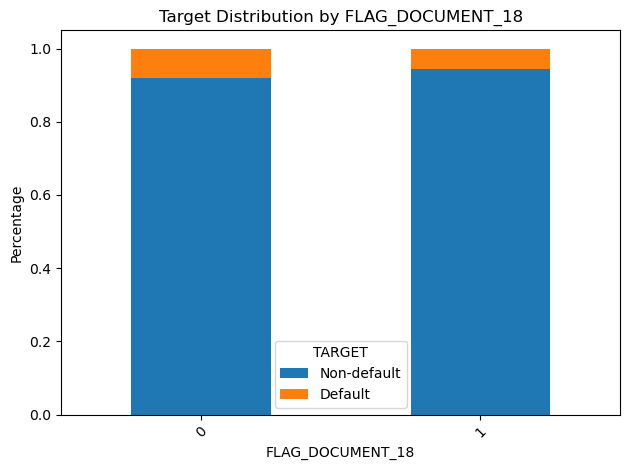

<Figure size 1000x600 with 0 Axes>

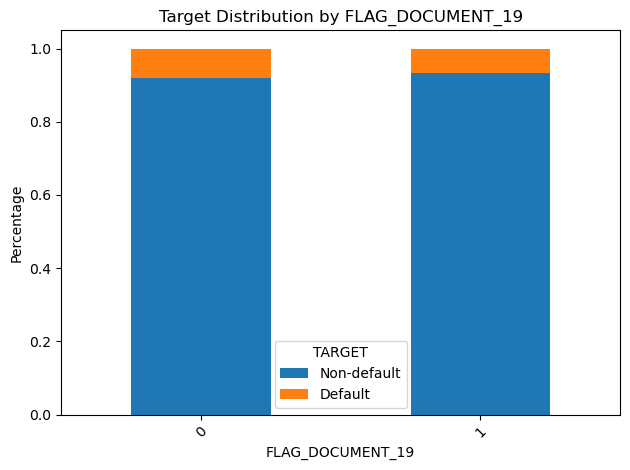

<Figure size 1000x600 with 0 Axes>

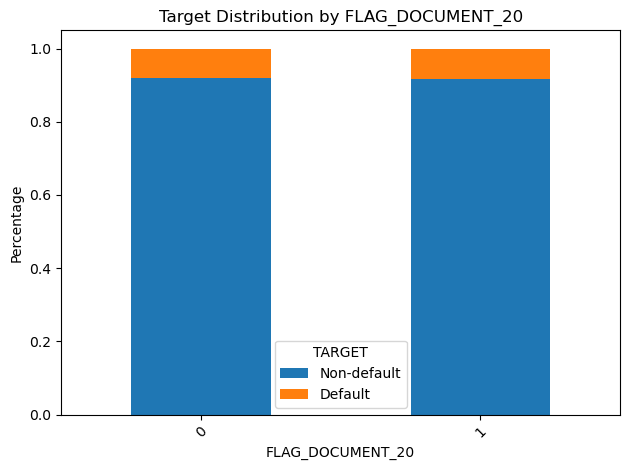

<Figure size 1000x600 with 0 Axes>

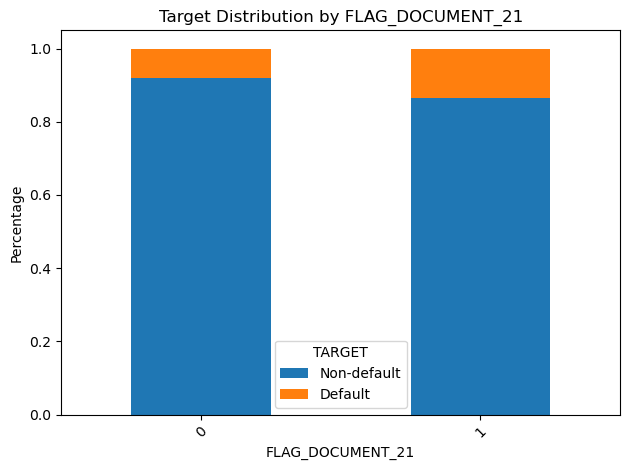

<Figure size 1000x600 with 0 Axes>

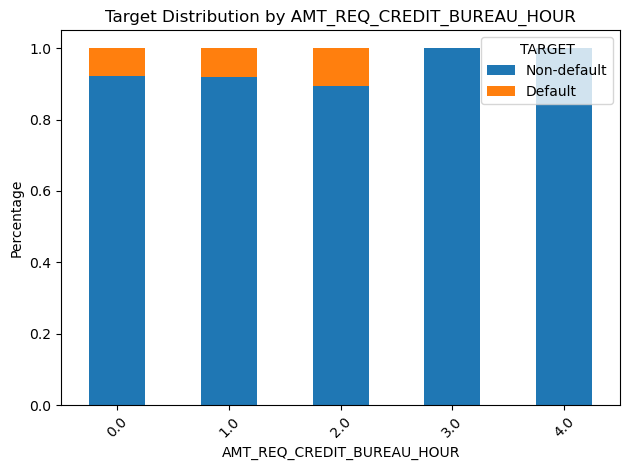

<Figure size 1000x600 with 0 Axes>

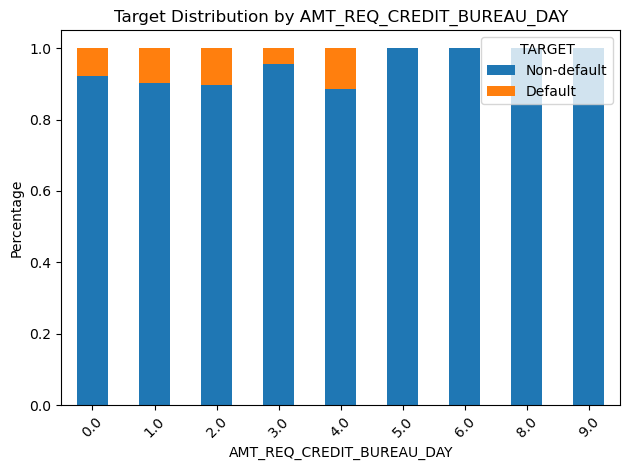

<Figure size 1000x600 with 0 Axes>

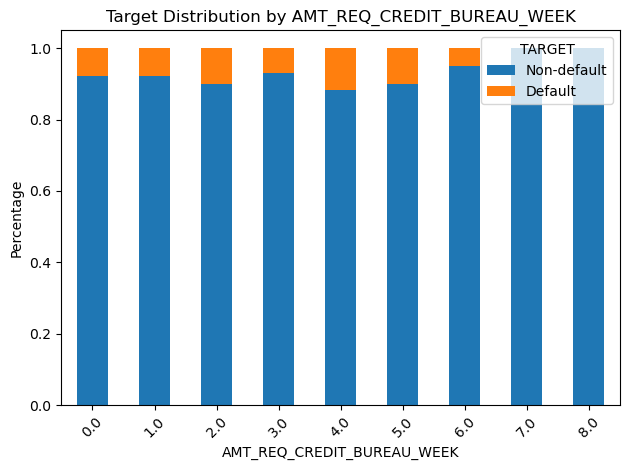

<Figure size 1000x600 with 0 Axes>

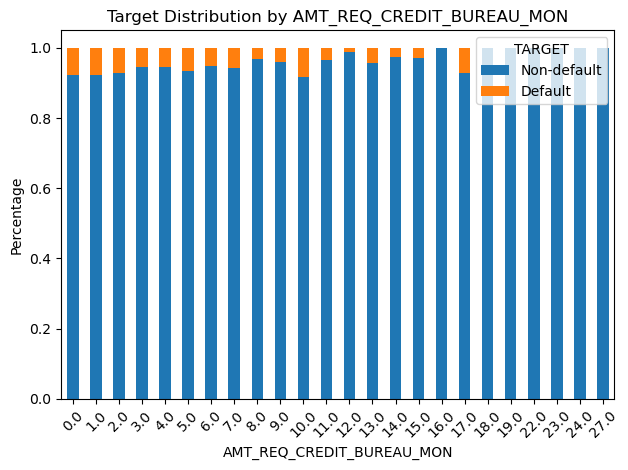

<Figure size 1000x600 with 0 Axes>

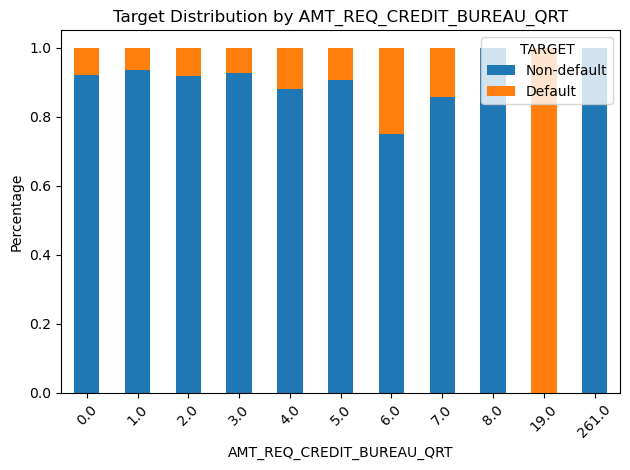

<Figure size 1000x600 with 0 Axes>

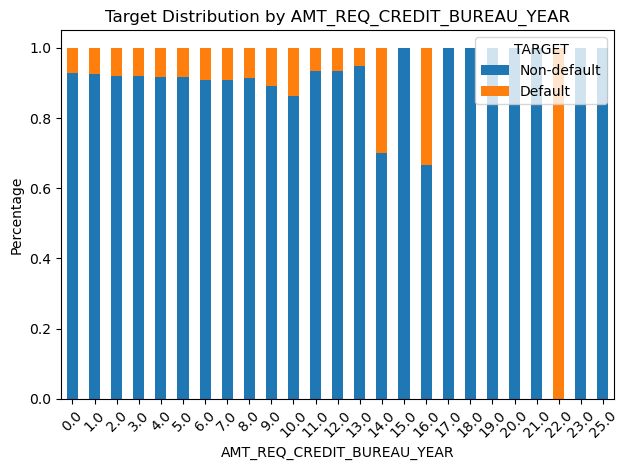


Analyzing Income vs Credit relationship...


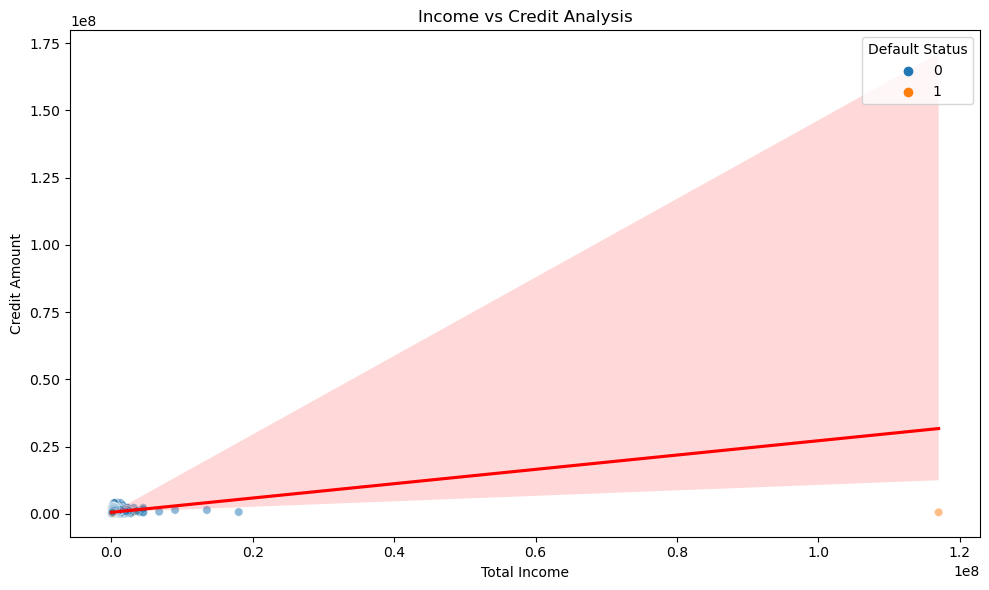


Applying preprocessing...

Plotting numerical distributions before handling outliers...


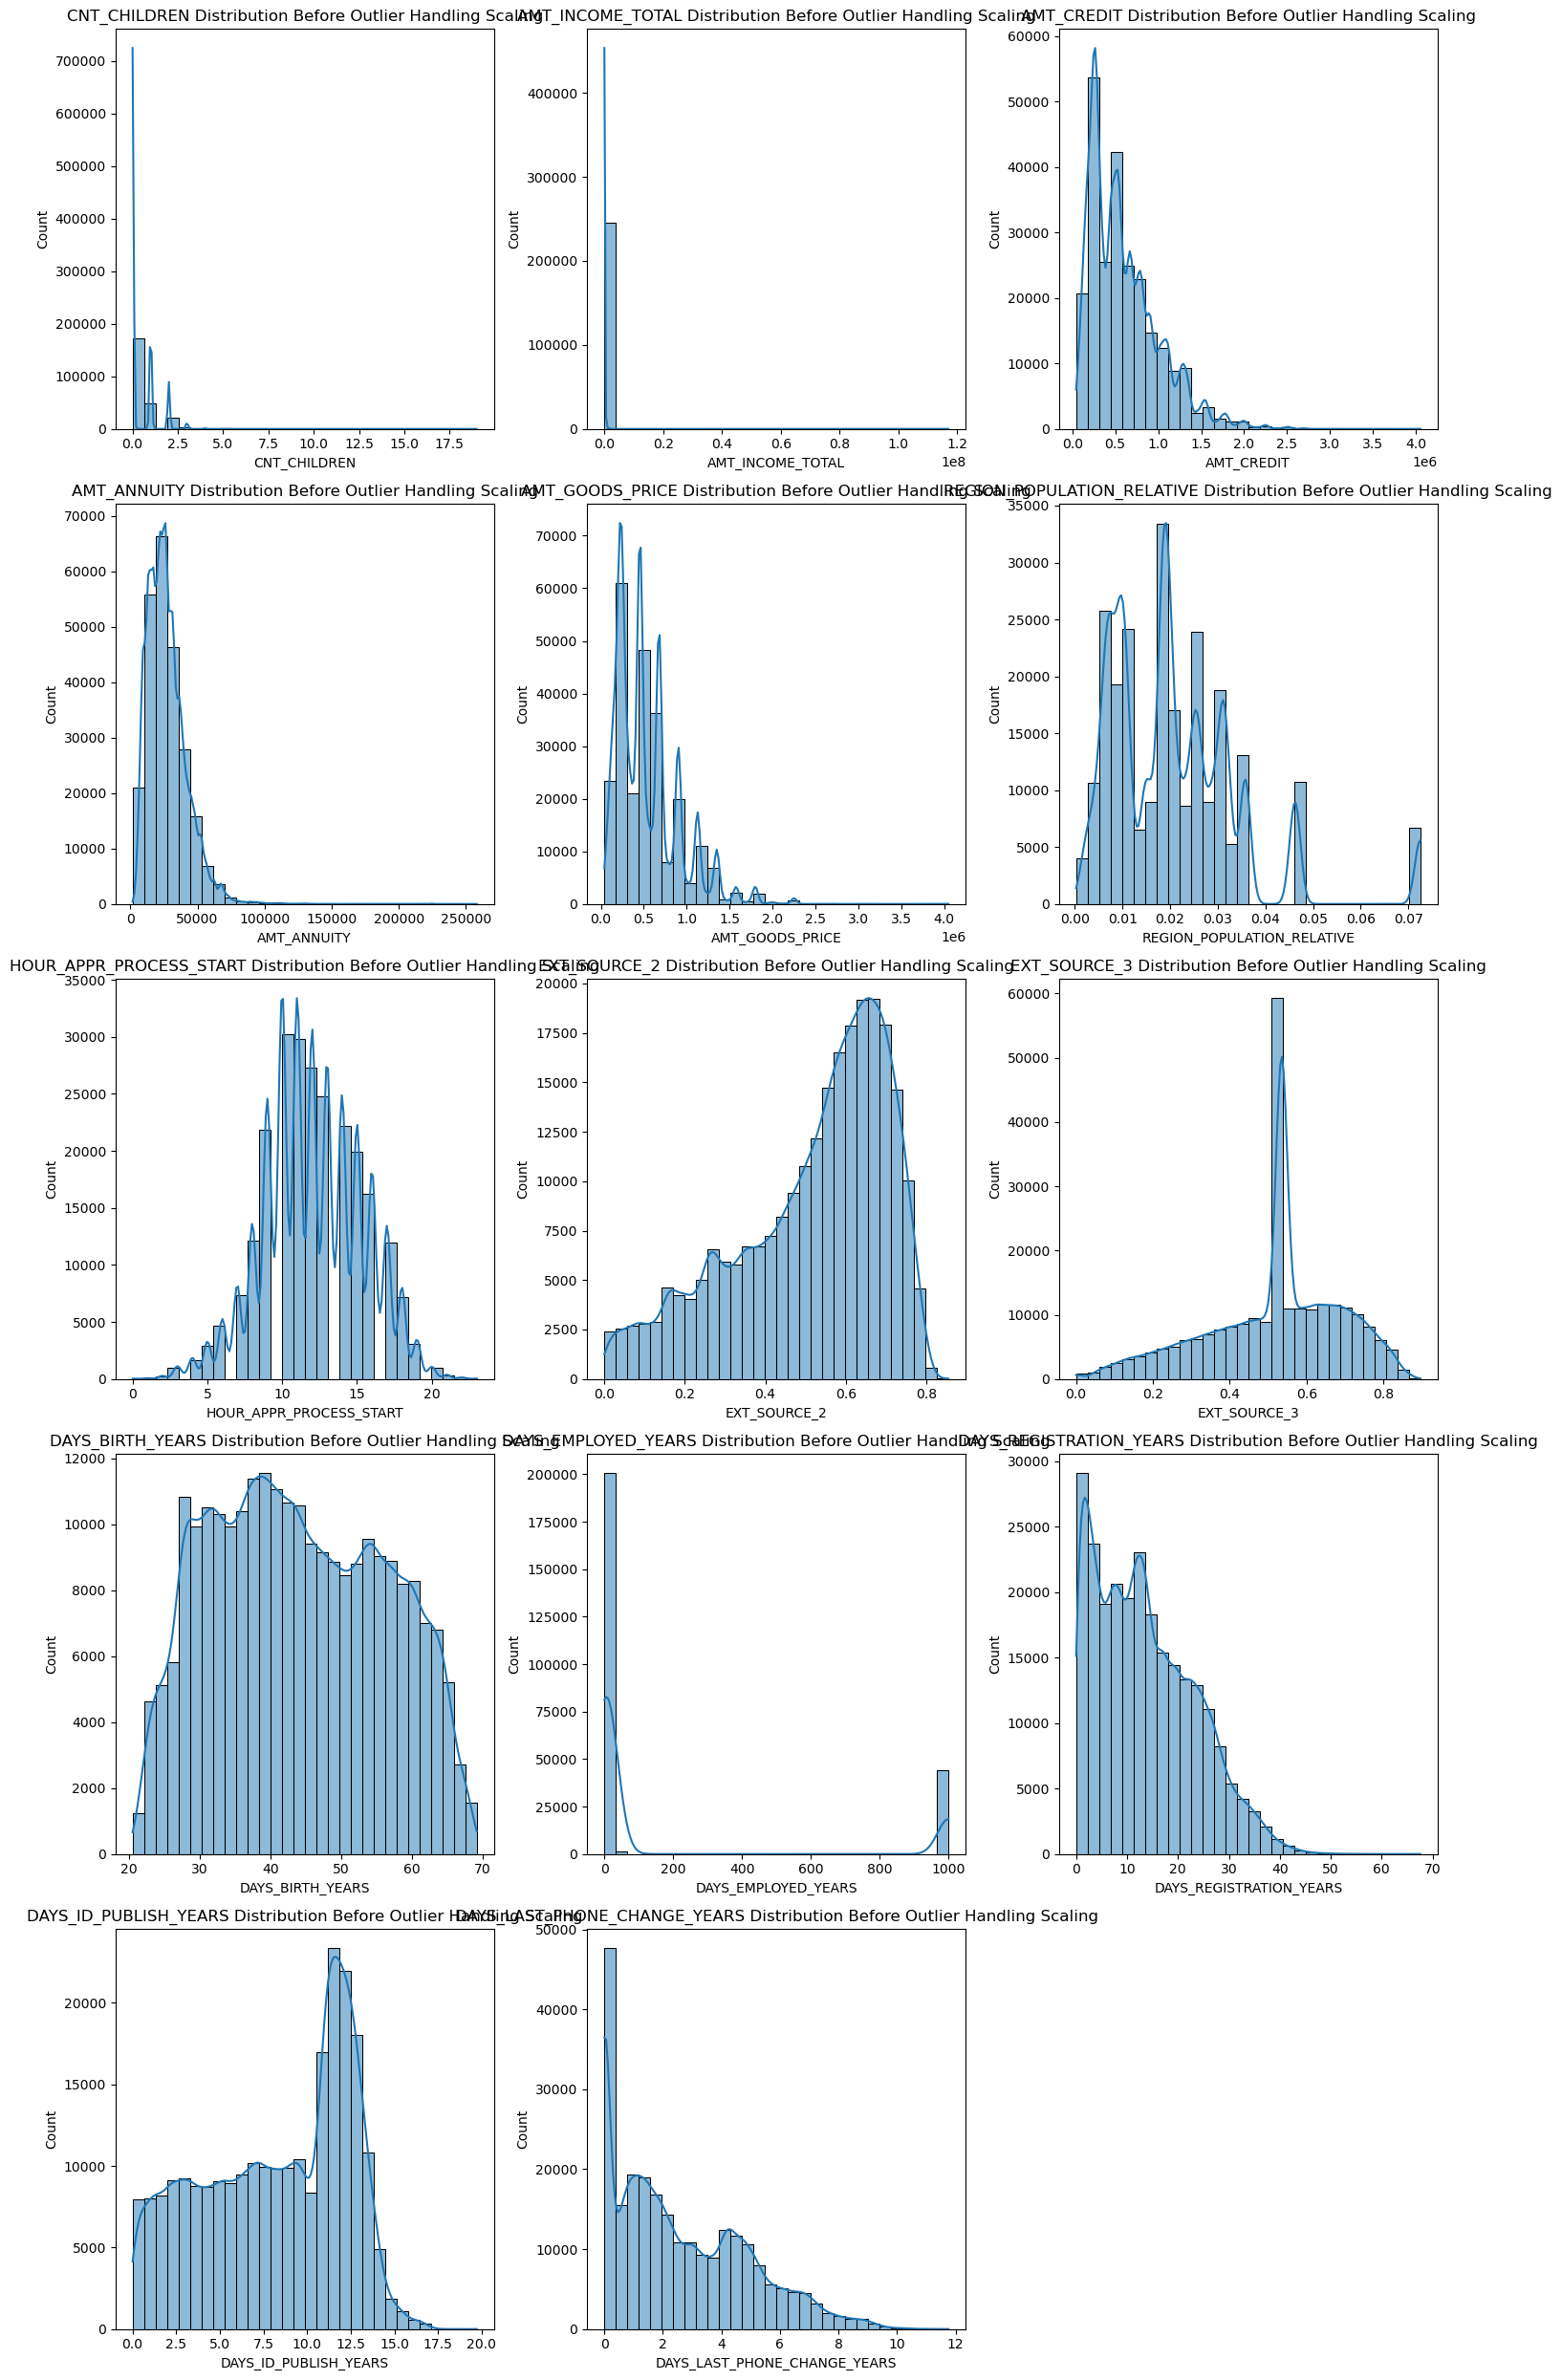


Plotting numerical distributions after handling outliers...


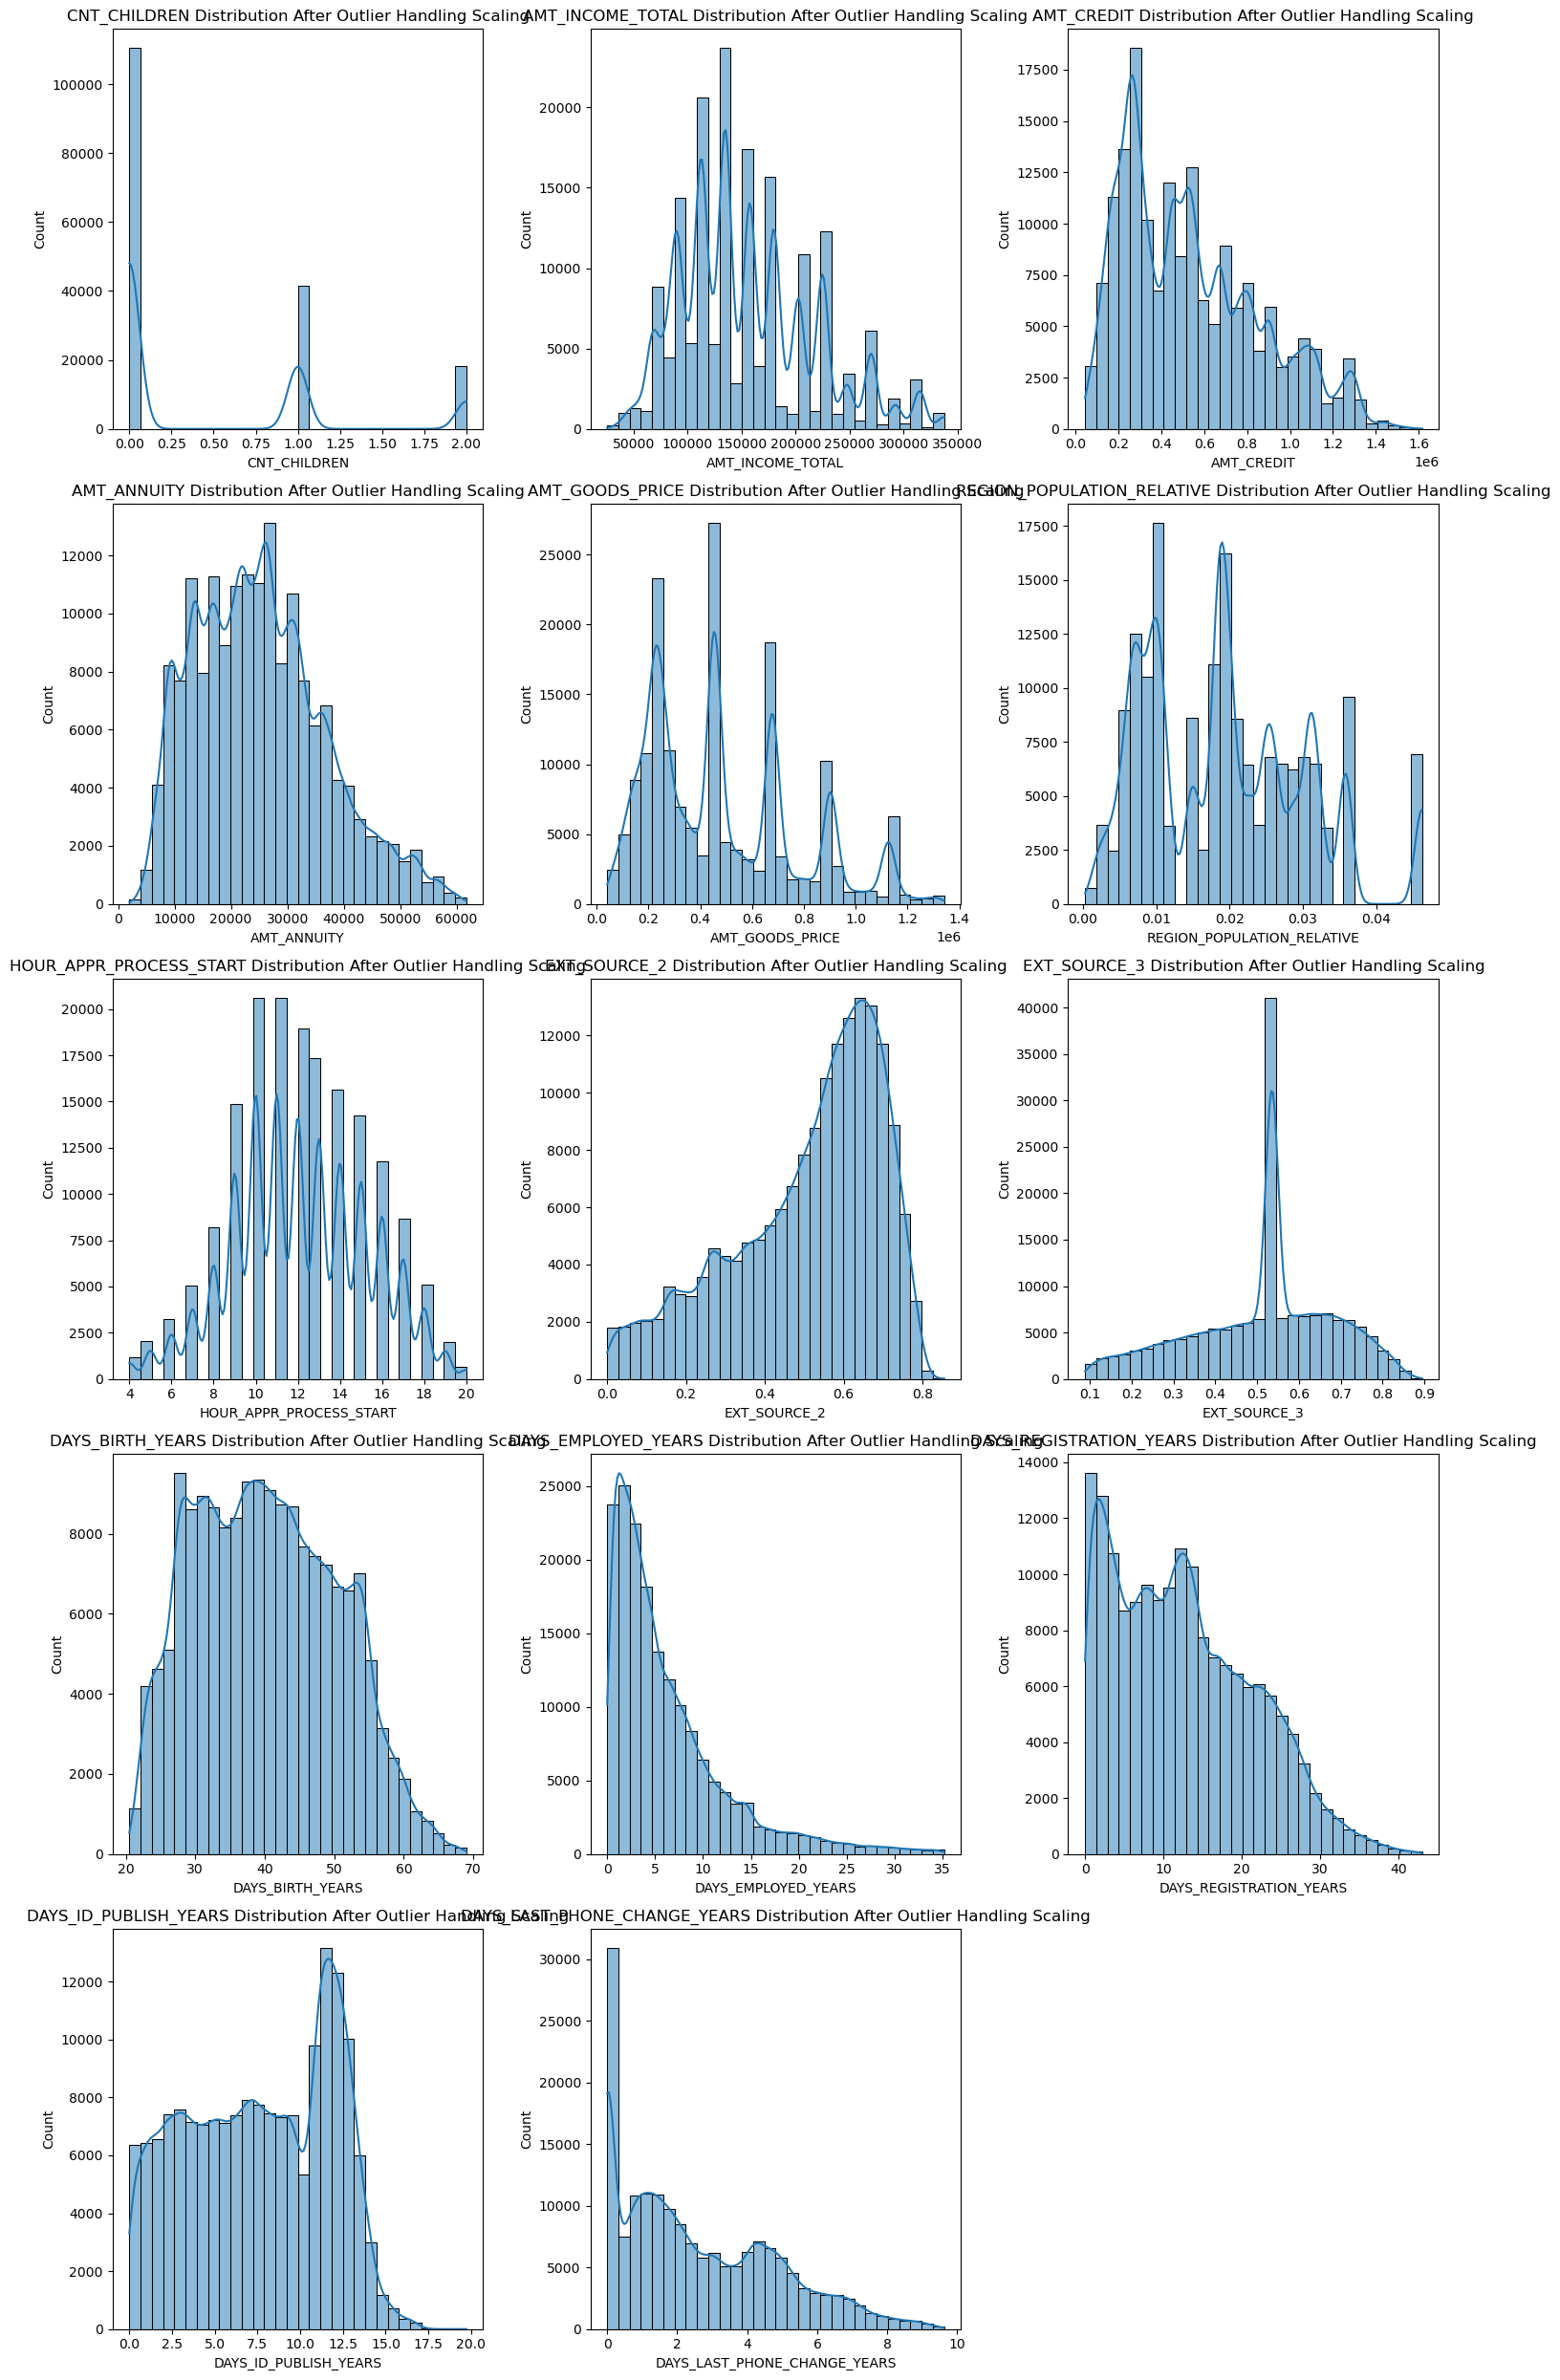


Plotting numerical distributions after scaling...


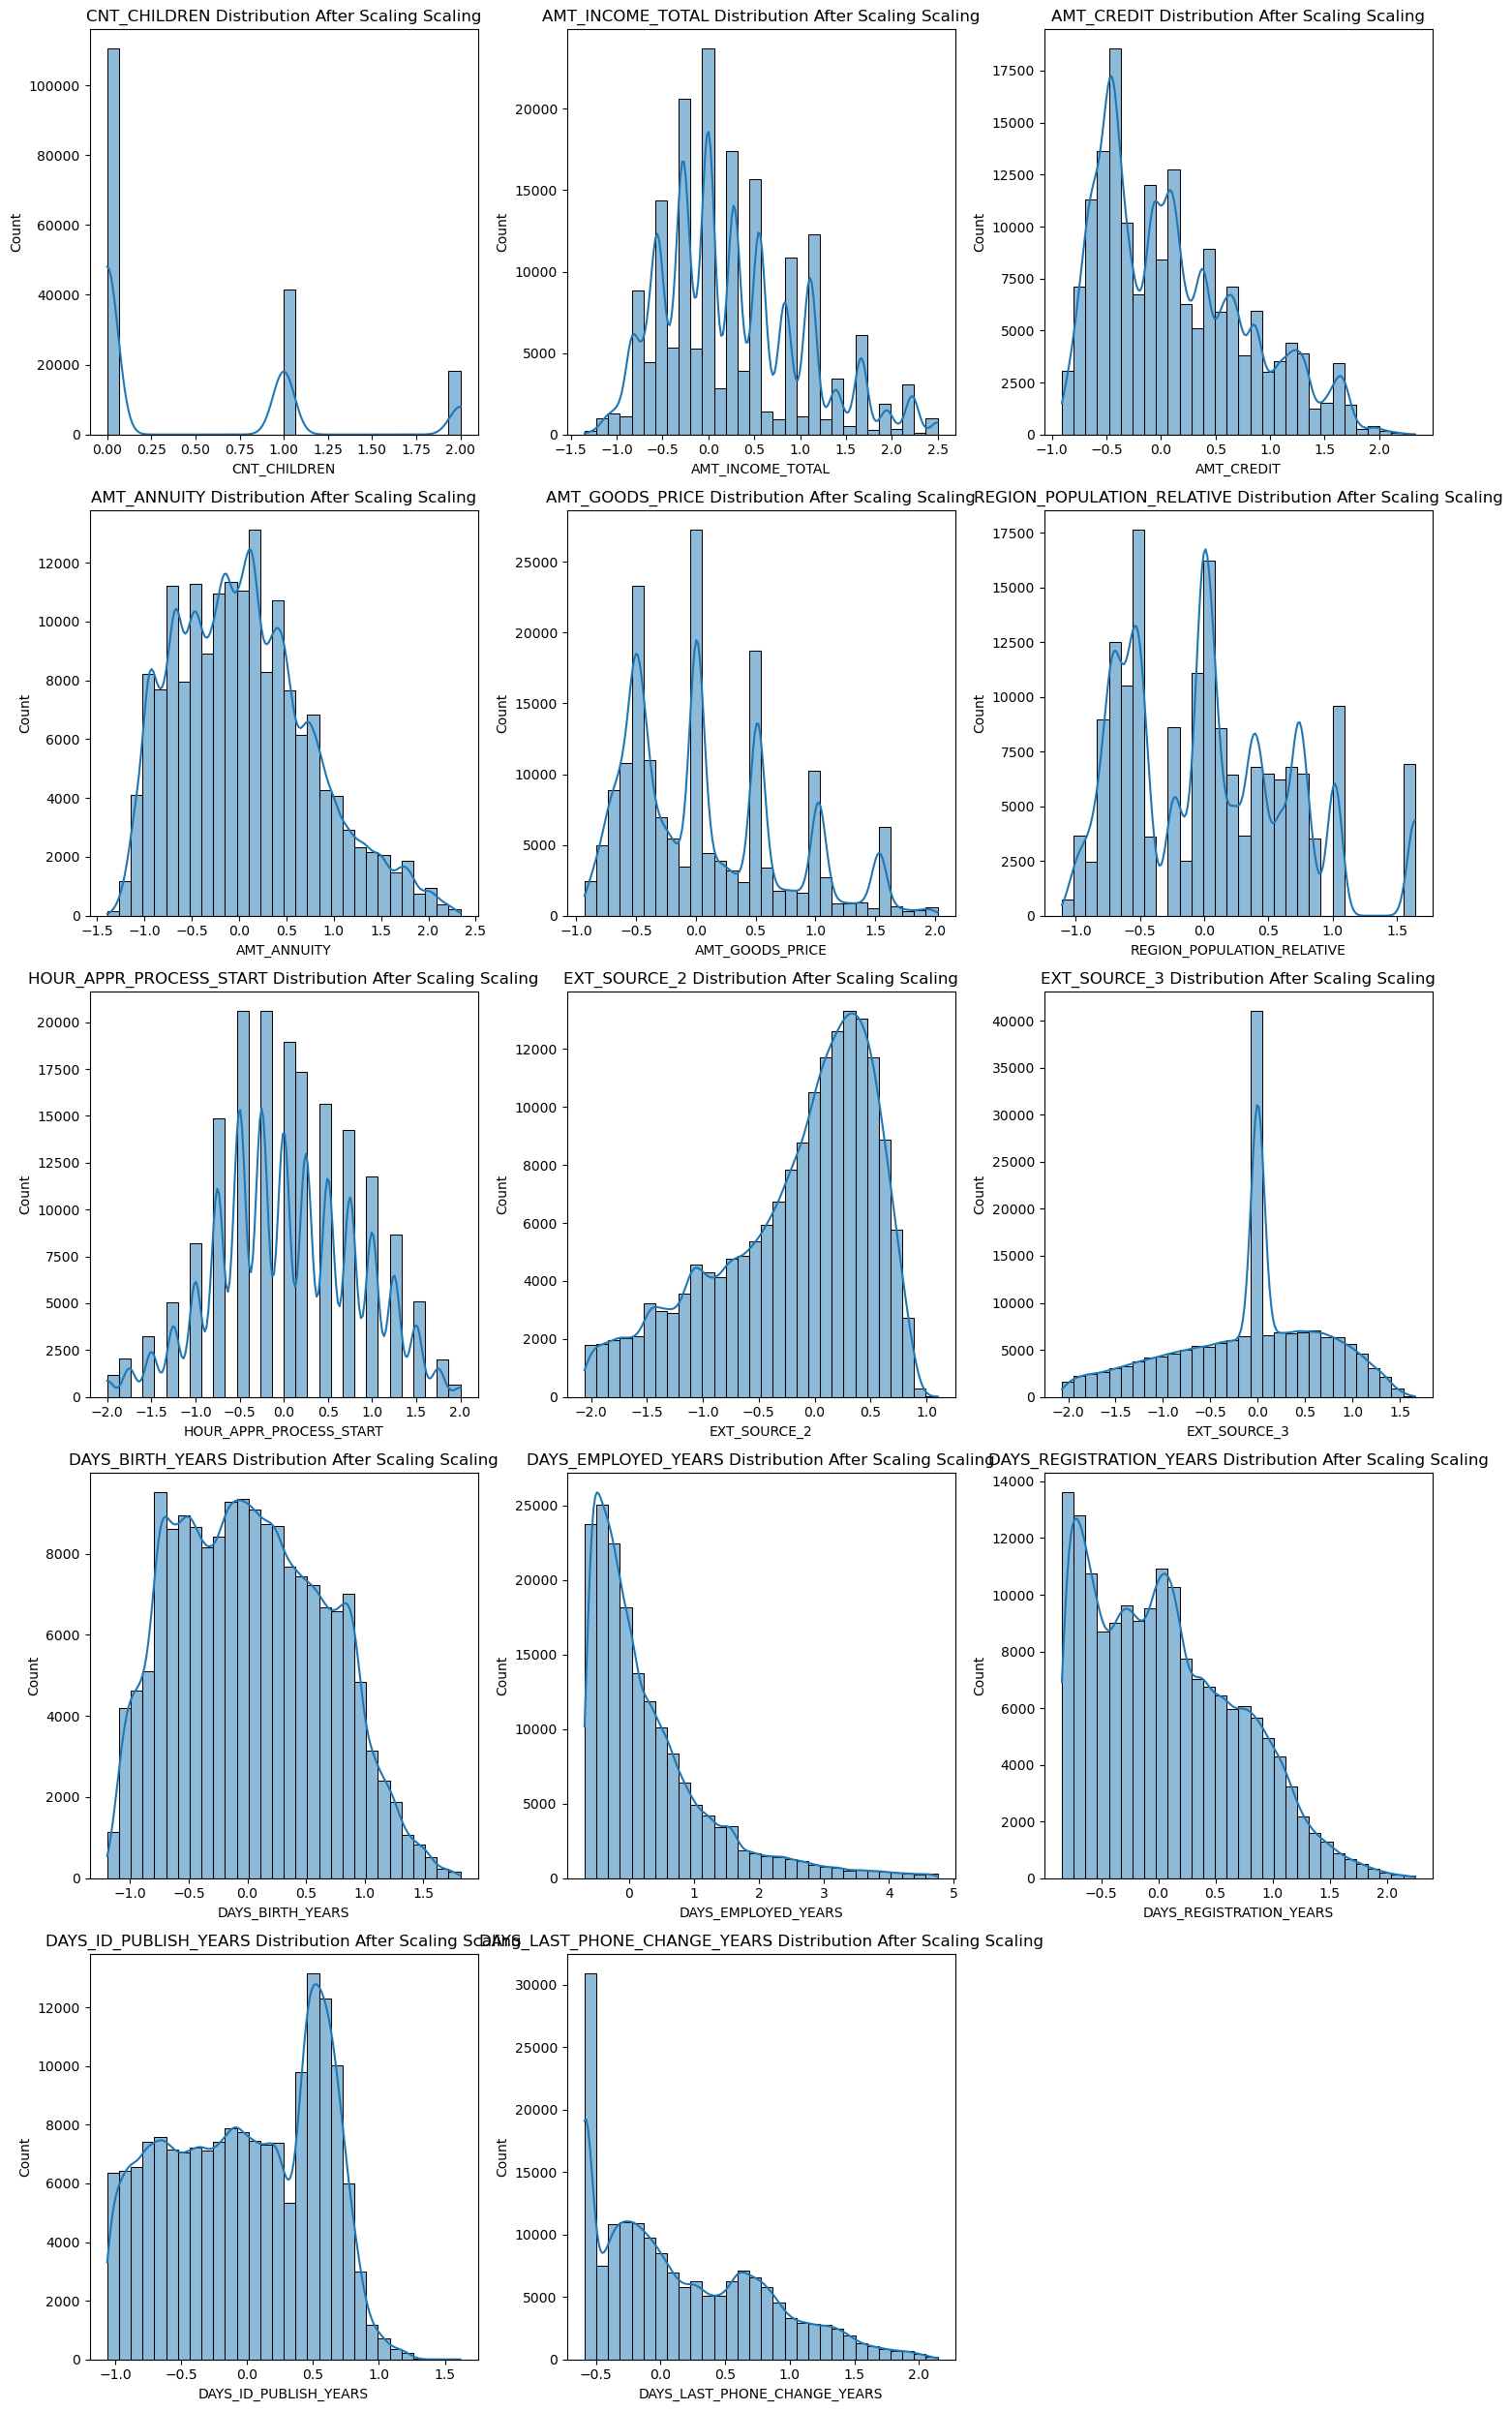


Balancing data using SMOTEENN...

Training Logisctic Regression model...

Evaluating XGBoost model...

Evaluating with threshold: 0.1

Classification Report after Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.96      0.42      0.58     56538
           1       0.11      0.78      0.19      4965

    accuracy                           0.45     61503
   macro avg       0.53      0.60      0.38     61503
weighted avg       0.89      0.45      0.55     61503


Confusion Matrix after Threshold Adjustment:
                Predicted Negatives  Predicted Positives
True Negatives                23609                32929
True Positives                 1070                 3895

F1 Scores after Threshold Adjustment:
F1 Macro: 0.38
F1 Micro: 0.45
F1 Weighted: 0.55
F1 Binary: 0.19

Evaluating with threshold: 0.2

Classification Report after Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.95      

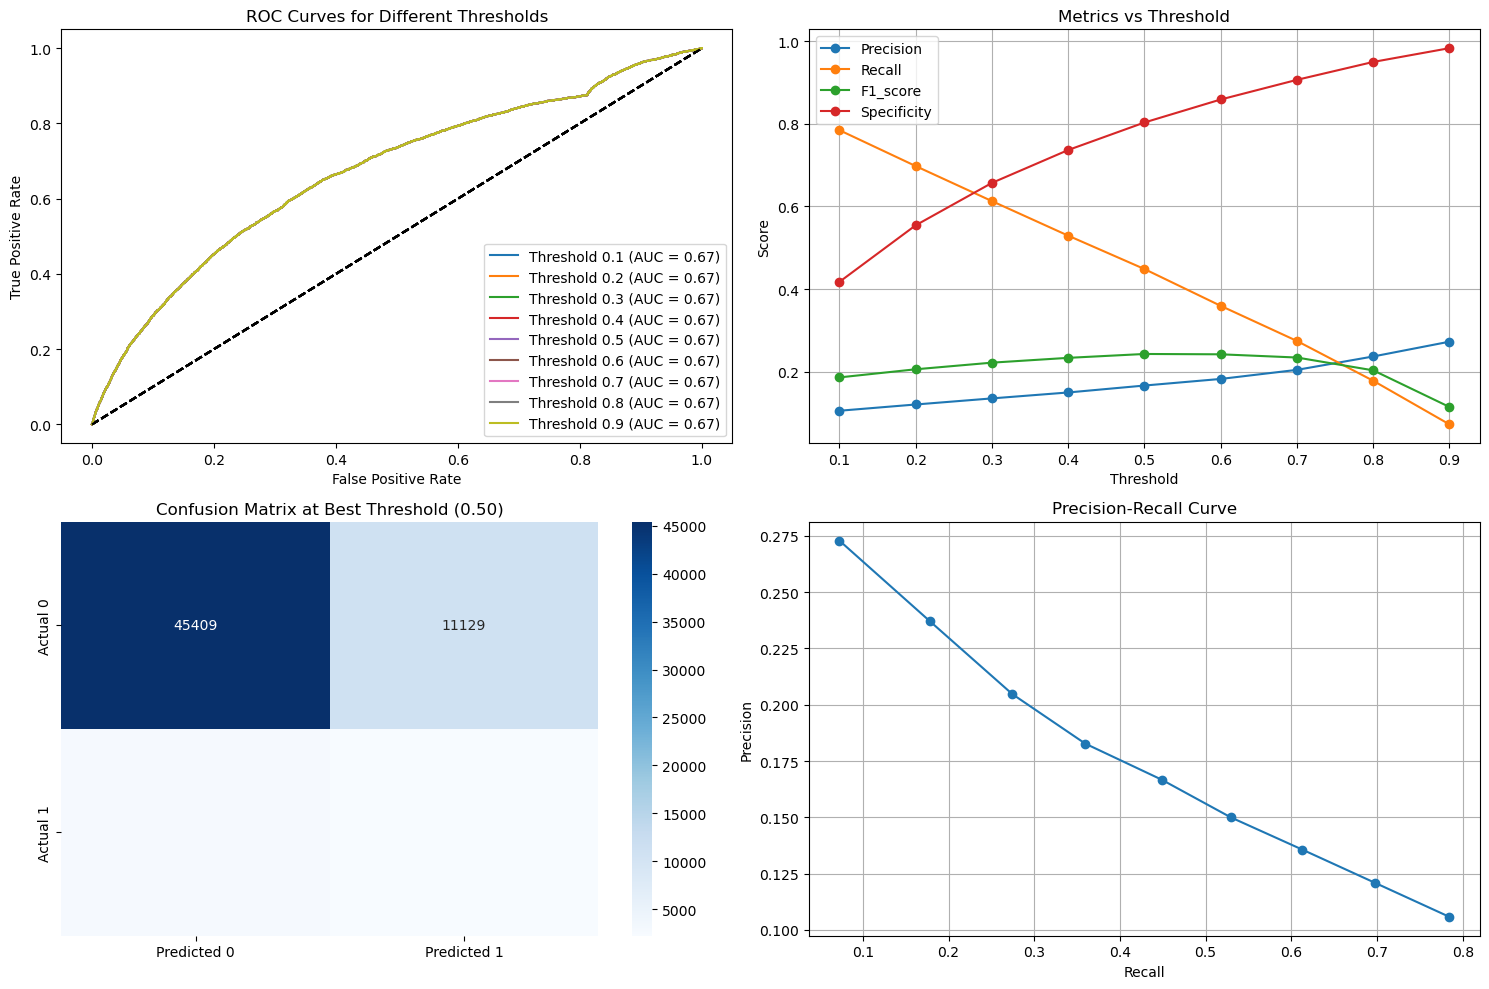


Analyzing feature importance...


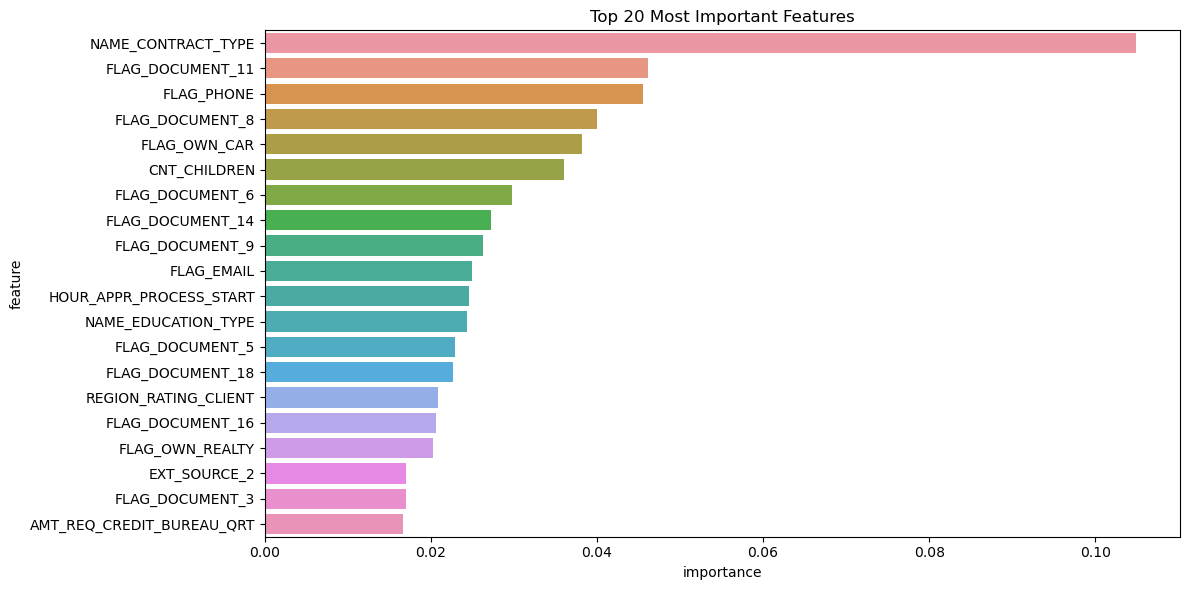


Best Threshold Analysis:
Best Threshold (highest F1): 0.50

Metrics at Best Threshold:
Precision: 0.167
Recall: 0.449
F1 Score: 0.243
Specificity: 0.803


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def plot_missing_values(df):
    """Plot columns with missing values above 30%"""
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_df = missing_percentage[missing_percentage > 30].sort_values(ascending=True)
    
    if len(missing_df) > 0:
        plt.figure(figsize=(10, 6))
        missing_df.plot(kind='barh')
        plt.title('Columns with >30% Missing Values')
        plt.xlabel('Missing Percentage')
        plt.tight_layout()
        plt.show()
    
    return missing_percentage

def plot_target_distribution(df):
    """Plot target variable distribution"""
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='TARGET')
    plt.title('Distribution of Target Variable')
    total = len(df)
    for p in plt.gca().patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                          ha='center', va='bottom')
    plt.show()

def plot_numerical_distributions(df, columns, before_after="Before"):
    """Plot distribution of numerical features before/after outlier handling"""
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.ravel()
    
    for idx, col in enumerate(columns):
        if col in df.columns:
            sns.histplot(df[col], ax=axes[idx], kde=True, bins=30)
            axes[idx].set_title(f'{col} Distribution {before_after} Scaling')
    
    for idx in range(len(columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names, top_n=20):
    """Plot feature importance from XGBoost model"""
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df.head(top_n), x='importance', y='feature')
    plt.title(f'Top {top_n} Most Important Features')
    plt.tight_layout()
    plt.show()
    
    return importance_df

def plot_categorical_analysis(df, cat_features):
    """Plot target distribution across categorical features"""
    for feature in cat_features:
        plt.figure(figsize=(10, 6))
        
        # Calculate percentages
        temp_df = df.groupby(feature)['TARGET'].value_counts(normalize=True).unstack()
        temp_df.plot(kind='bar', stacked=True)
        
        plt.title(f'Target Distribution by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.legend(title='TARGET', labels=['Non-default', 'Default'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def plot_income_credit_analysis(df):
    """Create scatter plot of Income vs Credit"""
    plt.figure(figsize=(10, 6))
    
    # Create scatter plot
    sns.scatterplot(data=df, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', 
                    hue='TARGET', alpha=0.5)
    
    # Add trend line
    sns.regplot(data=df, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', 
                scatter=False, color='red')
    
    plt.title('Income vs Credit Analysis')
    plt.xlabel('Total Income')
    plt.ylabel('Credit Amount')
    plt.legend(title='Default Status')
    plt.tight_layout()
    plt.show()

def load_and_preprocess_initial(filepath):
    """Load and perform initial preprocessing steps"""
    pd.set_option('display.max_columns', None)
    app_train = pd.read_csv(filepath)

    # Set SK_ID_CURR as index
    app_train.set_index('SK_ID_CURR', inplace=True)
    print("\nAnalyzing missing values...")
    missing_percentage = plot_missing_values(app_train)
    
    # Drop columns with more than 30% missing values
    app_train.drop(columns=missing_percentage[missing_percentage > 30].index, inplace=True)
    
    print("\nPlotting target distribution...")
    plot_target_distribution(app_train)
    
    # Convert specific columns to category type
    columns_to_convert = [
        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
        'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
    ]
    
    for col in columns_to_convert:
        if col in app_train.columns:
            app_train[col] = app_train[col].astype('category')
    
    return app_train

def preprocess_data(df, is_training=True, feature_names=None, encoders=None, imputer=None, scaler=None):
    """Enhanced preprocessing with consistent feature handling"""
    df_copy = df.copy()
    
    # Handle days columns
    days_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
    
    days_cols = [col for col in days_cols if col in df_copy.columns]
    
    for col in days_cols:
        df_copy[f'{col}_YEARS'] = abs(df_copy[col]) / 365
        if col == 'DAYS_EMPLOYED':
            df_copy[col] = df_copy[col].replace(365243, np.nan)
        df_copy.drop(col, axis=1, inplace=True)
    
    # Separate categorical and numerical columns
    categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
    if 'TARGET' in numerical_cols:
        numerical_cols = numerical_cols.drop('TARGET')
    
    if is_training:
        encoders = {}
        imputer = SimpleImputer(strategy='median')
        scaler = RobustScaler()
        
        # Process categorical columns
        for col in categorical_cols:
            df_copy[col] = df_copy[col].astype(str)
            le = LabelEncoder()
            le.fit(np.append(df_copy[col].unique(), 'Unknown'))
            df_copy[col] = le.transform(df_copy[col])
            encoders[col] = le
        
        # Process numerical columns
        df_copy[numerical_cols] = imputer.fit_transform(df_copy[numerical_cols])
        
        # Visualize distributions before handling outliers
        print("\nPlotting numerical distributions before handling outliers...")
        plot_numerical_distributions(df_copy, numerical_cols, "Before Outlier Handling")
        
        # Handle outliers
        outlier_flags = rule_based_outlier_detection(df_copy, numerical_cols)
        for col in numerical_cols:
            df_copy = df_copy[~outlier_flags[col]]  # Remove outliers
        
        # Visualize distributions after handling outliers
        print("\nPlotting numerical distributions after handling outliers...")
        plot_numerical_distributions(df_copy, numerical_cols, "After Outlier Handling")
        
        # Scaling after outlier removal
        df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])
        
        # Visualize distributions after scaling
        print("\nPlotting numerical distributions after scaling...")
        plot_numerical_distributions(df_copy, numerical_cols, "After Scaling")  # First 9 for visibility
        
        # Store feature names
        feature_names = df_copy.columns.tolist()
        if 'TARGET' in feature_names:
            feature_names.remove('TARGET')
            
    else:
        # Ensure all columns from training exist in test
        for col in feature_names:
            if col not in df_copy.columns and col != 'TARGET':
                df_copy[col] = 0
        
        # Keep only columns that were in training
        df_copy = df_copy[feature_names]
        
        # Process categorical columns
        for col in categorical_cols:
            if col in df_copy.columns:
                df_copy[col] = df_copy[col].astype(str)
                df_copy[col] = df_copy[col].map(lambda x: x if x in encoders[col].classes_ else 'Unknown')
                df_copy[col] = encoders[col].transform(df_copy[col])
        
        # Process numerical columns
        numerical_cols = [col for col in numerical_cols if col in df_copy.columns]
        if numerical_cols:
            df_copy[numerical_cols] = imputer.transform(df_copy[numerical_cols])
            df_copy[numerical_cols] = scaler.transform(df_copy[numerical_cols])
    
    return df_copy, feature_names, encoders, imputer, scaler

def rule_based_outlier_detection(df, numerical_cols, threshold=1.5):
    """Rule-Based Outlier Detection using IQR"""
    outlier_flags = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Flagging outliers
        outlier_flags[col] = ((df[col] < lower_bound) | (df[col] > upper_bound))
        
    return outlier_flags

def create_balanced_data_with_smoteenn(X, y):
    """Create balanced dataset using SMOTEENN"""
    smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)
    return smoteenn.fit_resample(X, y)

# Main execution
print("\nLoading and performing initial preprocessing...")
filepath = r"D:\Perkuliahan\Rakamin PBI (Home Credit Indonesia)\Dataset Proyek\home-credit-default-risk\application_train.csv"
app_train = load_and_preprocess_initial(filepath)

# Analyze important categorical features
print("\nAnalyzing categorical features...")
categorical_cols = app_train.select_dtypes(include=['object', 'category']).columns
plot_categorical_analysis(app_train, categorical_cols)

# Analyze Income vs Credit
print("\nAnalyzing Income vs Credit relationship...")
plot_income_credit_analysis(app_train)

# Split features and target
X = app_train.drop(columns = 'TARGET')
y = app_train['TARGET']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print("\nApplying preprocessing...")
X_train_processed, feature_names, encoders, imputer, scaler = preprocess_data(X_train, is_training=True)
X_test_processed, _, _, _, _ = preprocess_data(X_test, is_training=False,
                                             feature_names=feature_names,
                                             encoders=encoders,
                                             imputer=imputer,
                                             scaler=scaler)

# Ensure y_train matches the number of samples in X_train_processed
y_train_processed = y_train[X_train.index.isin(X_train_processed.index)]

print("\nBalancing data using SMOTEENN...")
X_train_balanced, y_train_balanced = create_balanced_data_with_smoteenn(X_train_processed, y_train_processed)

# Training XGB model
print("\nTraining Logisctic Regression model...")
logreg_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    penalty='l2',   # Regularisasi L2 (bisa dicoba juga dengan 'l1')
    C=1.0,          # Koefisien regularisasi
    solver='liblinear'  # Solver yang cocok untuk penalti L1
)

logreg_model.fit(X_train_balanced, y_train_balanced)

# Evaluating model with different thresholds
print("\nEvaluating Logistic Regression model...")
y_pred = logreg_model.predict(X_test_processed)
y_pred_proba = logreg_model.predict_proba(X_test_processed)[:, 1]

# Adjusting the Decision Threshold and performing iterations
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

plt.figure(figsize=(15, 10))
for threshold in thresholds:
    print(f"\nEvaluating with threshold: {threshold}")
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    print("\nClassification Report after Threshold Adjustment:")
    print(classification_report(y_test, y_pred_adjusted, zero_division=0))

    # Confusion Matrix for Adjusted Threshold
    conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    conf_matrix_df = pd.DataFrame(
        conf_matrix_adjusted,
        index=['True Negatives', 'True Positives'],
        columns=['Predicted Negatives', 'Predicted Positives']
    )
    print("\nConfusion Matrix after Threshold Adjustment:")
    print(conf_matrix_df)

    # Calculate various metrics
    tn, fp, fn, tp = conf_matrix_adjusted.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'specificity': specificity
    })

    # Calculate F1 Scores for different averages
    f1_macro = f1_score(y_test, y_pred_adjusted, average='macro')
    f1_micro = f1_score(y_test, y_pred_adjusted, average='micro')
    f1_weighted = f1_score(y_test, y_pred_adjusted, average='weighted')
    f1_binary = f1_score(y_test, y_pred_adjusted, average='binary')

    print(f"\nF1 Scores after Threshold Adjustment:")
    print(f"F1 Macro: {f1_macro:.2f}")
    print(f"F1 Micro: {f1_micro:.2f}")
    print(f"F1 Weighted: {f1_weighted:.2f}")
    print(f"F1 Binary: {f1_binary:.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, label=f'Threshold {threshold} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Thresholds')
    plt.legend(loc='lower right')

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot metrics vs threshold
plt.subplot(2, 2, 2)
for metric in ['precision', 'recall', 'f1_score', 'specificity']:
    plt.plot(results_df['threshold'], results_df[metric], marker='o', label=metric.capitalize())
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Threshold')
plt.legend()
plt.grid(True)

# Plot confusion matrix heatmap for best F1 threshold
best_threshold_idx = results_df['f1_score'].idxmax()
best_threshold = results_df.loc[best_threshold_idx, 'threshold']
y_pred_best = (y_pred_proba >= best_threshold).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix at Best Threshold ({best_threshold:.2f})')

# Plot precision-recall curve
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
plt.subplot(2, 2, 4)
plt.plot(recalls, precisions, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyzing feature importance after model evaluation
print("\nAnalyzing feature importance...")
importance_df = plot_feature_importance(xgb_model, feature_names)

# Print final summary
print("\nBest Threshold Analysis:")
print(f"Best Threshold (highest F1): {best_threshold:.2f}")
print("\nMetrics at Best Threshold:")
print(f"Precision: {results_df.loc[best_threshold_idx, 'precision']:.3f}")
print(f"Recall: {results_df.loc[best_threshold_idx, 'recall']:.3f}")
print(f"F1 Score: {results_df.loc[best_threshold_idx, 'f1_score']:.3f}")
print(f"Specificity: {results_df.loc[best_threshold_idx, 'specificity']:.3f}")


Loading and preprocessing app_test...

Analyzing missing values...


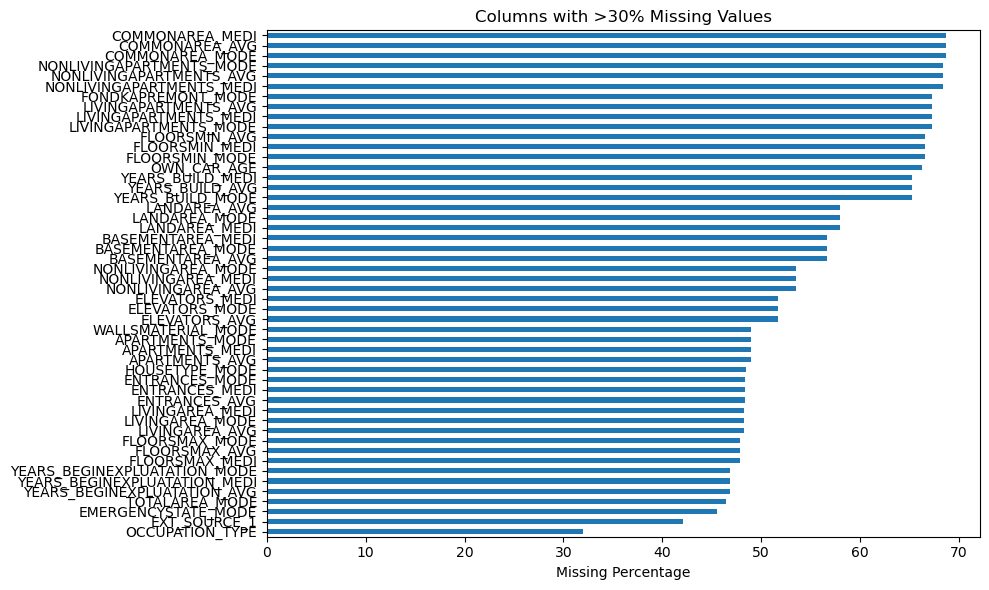


Handling missing values...

Handling outliers...

Scaling numerical features...

Ensuring feature consistency...

Making predictions...

Creating submission file...

First few predictions:
   SK_ID_CURR  TARGET
0      100001       0
1      100005       1
2      100038       1
3      100042       0
4      100057       0


In [7]:
# Load and preprocess app_test
def load_and_preprocess_test(filepath, encoders, imputer, scaler):
    """Load and preprocess the test dataset"""
    pd.set_option('display.max_columns', None)
    app_test = pd.read_csv(filepath)

    # Set SK_ID_CURR as index
    app_test.set_index('SK_ID_CURR', inplace=True)
    print("\nAnalyzing missing values...")
    missing_percentage = plot_missing_values(app_test)
    
    # Drop columns with more than 30% missing values
    app_test.drop(columns=missing_percentage[missing_percentage > 30].index, inplace=True)
    
    # Convert specific columns to category type (same as training)
    columns_to_convert = [
        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
        'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
    ]
    
    for col in columns_to_convert:
        if col in app_test.columns:
            app_test[col] = app_test[col].astype('category')

    # Handle days columns
    days_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
    
    for col in days_cols:
        if col in app_test.columns:
            app_test[f'{col}_YEARS'] = abs(app_test[col]) / 365
            if col == 'DAYS_EMPLOYED':
                app_test[col] = app_test[col].replace(365243, np.nan)
            app_test.drop(col, axis=1, inplace=True)

    # Separate categorical and numerical columns
    categorical_cols = app_test.select_dtypes(include=['object', 'category']).columns
    numerical_cols = app_test.select_dtypes(include=['int64', 'float64']).columns

    # Process categorical columns using saved encoders
    for col in categorical_cols:
        if col in app_test.columns:
            app_test[col] = app_test[col].astype(str)
            app_test[col] = app_test[col].map(lambda x: x if x in encoders[col].classes_ else 'Unknown')
            app_test[col] = encoders[col].transform(app_test[col])

    # Process numerical columns using saved imputer
    print("\nHandling missing values...")
    app_test[numerical_cols] = imputer.transform(app_test[numerical_cols])

    # Handle outliers using the same IQR method as in app_train
    print("\nHandling outliers...")
    outlier_flags = rule_based_outlier_detection(app_test, numerical_cols)
    
    # Remove outliers from app_test
    for col in numerical_cols:
        if col in app_test.columns:
            app_test = app_test[~outlier_flags[col]]  # Remove outliers

    # Scale numerical features using saved scaler
    print("\nScaling numerical features...")
    app_test[numerical_cols] = scaler.transform(app_test[numerical_cols])

    # Ensure all columns match training data
    print("\nEnsuring feature consistency...")
    for col in feature_names:
        if col not in app_test.columns:
            app_test[col] = 0
    app_test = app_test[feature_names]

    return app_test

# Main execution for app_test
print("\nLoading and preprocessing app_test...")
test_filepath = r"D:\Perkuliahan\Rakamin PBI (Home Credit Indonesia)\Dataset Proyek\home-credit-default-risk\application_test.csv"
app_test = load_and_preprocess_test(test_filepath, encoders, imputer, scaler)

# Make predictions using the best threshold
print("\nMaking predictions...")
test_pred_proba = logreg_model.predict_proba(app_test)[:, 1]  # Get probabilities for the positive class
test_predictions = (test_pred_proba >= best_threshold).astype(int)  # Apply the best threshold

# Create submission DataFrame
print("\nCreating submission file...")
submission = pd.DataFrame({
    'SK_ID_CURR': app_test.index,
    'TARGET': test_predictions
})


# Display first few predictions
print("\nFirst few predictions:")
print(submission.head())